In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd

In [3]:
import missingno as msno

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

# A. An overview of the dataset

I am starting by loading the dataset into a DataFrame object, `df`, using the `read_pickle()` Pandas function.

In [6]:
df = pd.read_pickle("data_385k.pkl", compression="zip")

Using `info()` I can already access some preliminary information about the dataset, in particular I can notice that there are 385'384 samples stored as rows, along with 99 columns. Additionally, as a first look, data types seem to be mostly *float* or *string* (the object dtype), and there are multiple columns with a significant amount of null values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385384 entries, 0 to 385383
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   alcohol_by_volume                                385384 non-null  float64
 1   barcode                                          385384 non-null  object 
 2   calcium_per_hundred                              264979 non-null  float64
 3   calcium_unit                                     265086 non-null  object 
 4   carbohydrates_per_hundred                        351551 non-null  float64
 5   carbohydrates_per_portion                        11480 non-null   float64
 6   carbohydrates_unit                               351828 non-null  object 
 7   cholesterol_per_hundred                          270282 non-null  float64
 8   cholesterol_unit                                 270329 non-null  object 
 9   copper_cu_per_h

I can gather a few additional information by also looking at the first 10 entries of the dataset, using `head(10)`. The initial observations can be restated, but I notice as well that the column order is not properly streamlined for user readability: for instance, I would have expected the *id* column to be the first one, as it identifies the product along with the barcode.

In [8]:
df.head(10)

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
0                0.0  8001772000030                  NaN          NaN   
1                0.0  7610809001066                  NaN          NaN   
2                0.0  8002530159021                  NaN          NaN   
3                0.0  3033715065788                  NaN          NaN   
4                0.0  7610848492740                  NaN          NaN   
5                0.0  7610100033247                  NaN          NaN   
6                0.0       76145513                  NaN          NaN   
7                0.0  7610800826040                  NaN          NaN   
8                0.0  7611654576754                  NaN          NaN   
9                0.0  5000159023061                  NaN          NaN   

   carbohydrates_per_hundred  carbohydrates_per_portion carbohydrates_unit  \
0                      75.00                      37.50                  g   
1                       1.50                       1.13                  g   
2                      52.68                        NaN                  g   
3                      70.40                      11.97                  g   
4                      37.00                       7.40                  g   
5                      11.10                       1.90                  g   
6                      60.50                      15.00                  g   
7                      70.00                        NaN                  g   
8                      80.00                       8.00                  g   
9                      61.60                        NaN                  g   

   cholesterol_per_hundred cholesterol_unit  copper_cu_per_hundred  ...  \
0                      NaN              NaN                    NaN  ...   
1                      NaN              NaN                    NaN  ...   
2                      NaN              NaN                    NaN  ...   
3                      NaN              NaN                    NaN  ...   
4                      NaN              NaN                    NaN  ...   
5                      NaN              NaN                    NaN  ...   
6                      NaN              NaN                    NaN  ...   
7                      NaN              NaN                    NaN  ...   
8                      NaN              NaN                    NaN  ...   
9                      NaN              NaN                    NaN  ...   

  vitamin_b5_panthothenic_acid_per_hundred vitamin_b5_panthothenic_acid_unit  \
0                                      NaN                               NaN   
1                                      NaN                               NaN   
2                                      NaN                               NaN   
3                                      NaN                               NaN   
4                                      NaN                               NaN   
5                                      NaN                               NaN   
6                                      NaN                               NaN   
7                                      NaN                               NaN   
8                                      NaN                               NaN   
9                                      NaN                               NaN   

  vitamin_b6_pyridoxin_per_hundred  vitamin_b6_pyridoxin_unit  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   
5                              NaN                        NaN   
6                              NaN                        NaN   
7                              NaN                        NaN   
8                              NaN              

When it comes to the data type of each column, they are all conveniently stored in the `df.dtypes` Series object. Nonetheless, with this large amount of columns, it is not immediately possible to assess all the data types found in `df`. In order to achieve this objective, I opted for collecting all the *unique* data types inside a dedicated list, `dtypes_list`.

In [9]:
df.dtypes

alcohol_by_volume                                  float64
barcode                                             object
calcium_per_hundred                                float64
calcium_unit                                        object
carbohydrates_per_hundred                          float64
                                                    ...   
vitamin_c_ascorbic_acid_unit                        object
vitamin_d_d2_d3_international_units_per_hundred    float64
vitamin_d_d2_d3_international_units_unit            object
zinc_per_hundred                                   float64
zinc_unit                                           object
Length: 99, dtype: object

In [10]:
dtypes_list = df.dtypes.unique()

dtypes_list

array([dtype('float64'), dtype('O'), dtype('int64')], dtype=object)

Assessing the unique *dtypes* has been proved being the right choice, as I can spot also the *int* data type, which was not immediately visible in the first preliminary observations. Now that I am aware of all the unique data types that are found in `df`, I can classify the columns leveraging a *for* loop which for every column checks to which *dtype* of `dtypes_list` its data type matches, and then proceeds to assign that column to a dedicated list for the specific data type.

It is worth noting that *dtypes* are the values themselves of the `df.dtypes` Series object, so they can be accessed with `df.dtypes[i]`, while the columns are *indexes* of the same Series object, so they must be accessed with `df.dtypes.index[i]`.

In [11]:
float_columns = []
object_columns = []
int_columns = []

for i in range(len(df.dtypes)):
    if df.dtypes[i] == dtypes_list[0]:  # if dtype is float
        float_columns.append(df.dtypes.index[i])
    elif df.dtypes[i] == dtypes_list[2]:  # if dtype is int
        int_columns.append(df.dtypes.index[i])
    else:  # if dtype is object
        object_columns.append(df.dtypes.index[i])


print(f"There are {len(float_columns)} float type columns")
print(f"There are {len(int_columns)} int type columns")
print(f"There are {len(object_columns)} object type columns")

There are 50 float type columns
There are 1 int type columns
There are 48 object type columns


As a further check, I printed the numerosity of each list expecting them to add up to 99 as the total number of columns of `df`, and I am happy to see that being confirmed.

A similar exercise for column classification can be done to split columns in different lists on the basis of their endings, specifically the ones indicating the type of quantity they refer to (*per hundred, per portion, units*).

As I do not have to deal with *dtypes* this time, I am leveraging the more straightforward `df.columns` Series object for running the *for* loop, as well as the `in` operator to check if a particular string is found inside each column's name.

Ultimately, I am also checking the numerosity of the resulting lists, always expecting them to add up to 99.

In [12]:
cols_per_hundred = []
cols_per_portion = []
cols_unit = []
other_cols = []

for col in df.columns:
    if "_per_hundred" in col:
        cols_per_hundred.append(col)
    elif "_per_portion" in col:
        cols_per_portion.append(col)
    elif "_unit" in col:
        cols_unit.append(col)
    else:
        other_cols.append(col)


print(f"There are {len(cols_per_hundred)} cols_per_hundred")
print(f"There are {len(cols_per_portion)} cols_per_portion")
print(f"There are {len(cols_unit)} cols_unit")
print(f"There are {len(other_cols)} other_cols")

There are 37 cols_per_hundred
There are 10 cols_per_portion
There are 39 cols_unit
There are 13 other_cols


A further check I conducted this time is related to the `other_cols` list: as the `in` operator is case sensitive, I wanted to make sure that there were no columns improperly labeled (hypothetical example: zinc_PER_HUNDRED) that would have been assigned to the `other_cols` list for this reason, but for which I could have assumed that the intention behind was different and hence I should have corrected the classification.

In [13]:
print(other_cols)

['alcohol_by_volume', 'barcode', 'country', 'created_at', 'id', 'ingredients_en', 'portion_quantity', 'product_name_de', 'product_name_en', 'product_name_fr', 'quantity', 'unit', 'updated_at']


# B. Data Cleaning

## B.1 Duplicated values

To keep track of how many rows were present before removing duplicated rows, I am storing the shape of `df` into the `original_shape` variable.

In [14]:
original_shape = df.shape
original_shape

(385384, 99)

In [15]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
385379     True
385380     True
385381     True
385382     True
385383     True
Length: 385384, dtype: bool

After removing duplicated rows, I can compare the resulting shape with the original one to determine how many rows have been taken off. No manual calculation is required, and I can find out that in this case 10500 rows have been removed.

In [16]:
df.drop_duplicates(inplace=True)
shape1 = df.shape
shape1

(374884, 99)

In [17]:
original_shape[0] - shape1[0]

10500

## B.2 Identifying missing values

### B.2.1 Missing values per column

`df.isnull()` comes handy to work with missing values, as it returns a boolean DataFrame with the same shape of `df`, having `True` in place of a null value and `False` in place of a non-null one.

In [18]:
df.isnull()

alcohol_by_volume  barcode  calcium_per_hundred  calcium_unit  \
0                   False    False                 True          True   
1                   False    False                 True          True   
2                   False    False                 True          True   
3                   False    False                 True          True   
4                   False    False                 True          True   
...                   ...      ...                  ...           ...   
374879              False    False                 True          True   
374880              False    False                False         False   
374881              False    False                 True          True   
374882              False    False                 True          True   
374883              False    False                 True          True   

        carbohydrates_per_hundred  carbohydrates_per_portion  \
0                           False                      False   
1                           False                      False   
2                           False                       True   
3                           False                      False   
4                           False                      False   
...                           ...                        ...   
374879                       True                       True   
374880                      False                      False   
374881                      False                       True   
374882                       True                       True   
374883                       True                       True   

        carbohydrates_unit  cholesterol_per_hundred  cholesterol_unit  \
0                    False                     True              True   
1                    False                     True              True   
2                    False                     True              True   
3                    False                     True              True   
4                    False                     True              True   
...                    ...                      ...               ...   
374879                True                     True              True   
374880               False                     True              True   
374881               False                     True              True   
374882                True                     True              True   
374883                True                     True              True   

        copper_cu_per_hundred  ...  vitamin_b5_panthothenic_acid_per_hundred  \
0                        True  ...                                      True   
1                        True  ...                                      True   
2                        True  ...                                      True   
3                        True  ...                                      True   
4                        True  ...                                      True   
...                       ...  ...                                       ...   
374879                   True  ...                                      True   
374880                   True  ...                                     False   
374881                   True  ...                                      True   
374882                   True  ...                                      True   
374883                   True  ...                                      True   

        vitamin_b5_panthothenic_acid_unit  vitamin_b6_pyridoxin_per_hundred  \
0                                    True                              True   
1                                    True                              True   
2                                    True                              True   
3                                    True                              True   
4                                    True                              True   
...                                   ...         

I am now preparing the DataFrame to store the missing values, by generating a new one with the desired columns (`df.columns`) and rows (*Missing values*, related to the total number of missing values per column, and *Percentage (%)*, showing the percentage of missing values over the total number of entries of each column).

In [19]:
missing_values_df = pd.DataFrame(
    index=["Missing values", "Percentage (%)"], columns=df.columns
)
missing_values_df

alcohol_by_volume barcode calcium_per_hundred calcium_unit  \
Missing values               NaN     NaN                 NaN          NaN   
Percentage (%)               NaN     NaN                 NaN          NaN   

               carbohydrates_per_hundred carbohydrates_per_portion  \
Missing values                       NaN                       NaN   
Percentage (%)                       NaN                       NaN   

               carbohydrates_unit cholesterol_per_hundred cholesterol_unit  \
Missing values                NaN                     NaN              NaN   
Percentage (%)                NaN                     NaN              NaN   

               copper_cu_per_hundred  ...  \
Missing values                   NaN  ...   
Percentage (%)                   NaN  ...   

               vitamin_b5_panthothenic_acid_per_hundred  \
Missing values                                      NaN   
Percentage (%)                                      NaN   

               vitamin_b5_panthothenic_acid_unit  \
Missing values                               NaN   
Percentage (%)                               NaN   

               vitamin_b6_pyridoxin_per_hundred vitamin_b6_pyridoxin_unit  \
Missing values                              NaN                       NaN   
Percentage (%)                              NaN                       NaN   

               vitamin_c_ascorbic_acid_per_hundred  \
Missing values                                 NaN   
Percentage (%)                                 NaN   

               vitamin_c_ascorbic_acid_unit  \
Missing values                          NaN   
Percentage (%)                          NaN   

               vitamin_d_d2_d3_international_units_per_hundred  \
Missing values                                             NaN   
Percentage (%)                                             NaN   

               vitamin_d_d2_d3_international_units_unit zinc_per_hundred  \
Missing values                                      NaN              NaN   
Percentage (%)                                      NaN              NaN   

               zinc_unit  
Missing values       NaN  
Percentage (%)       NaN  

[2 rows x 99 columns]

The total number of missing values per `df` column is calculated using `sum()` over `df.isnull()` (considering that `True` counts as 1), while the *percentage* is computed dividing such number by the total number of rows of `df` (coming from the new shape), rounding the result to one decimal for practicality.

I can then easily fill in the entries of `missing_values_df` with a `for` loop using the `loc` operator to correctly adress the right entry.

In [20]:
for col in df.columns:
    missing_values = df[col].isnull().sum()
    missing_values_df.loc["Missing values", col] = missing_values
    missing_values_df.loc["Percentage (%)", col] = round(
        missing_values * 100 / shape1[0], 1
    )

missing_values_df

alcohol_by_volume barcode calcium_per_hundred calcium_unit  \
Missing values                 0       0              110030       109923   
Percentage (%)               0.0     0.0                29.4         29.3   

               carbohydrates_per_hundred carbohydrates_per_portion  \
Missing values                     26333                    364529   
Percentage (%)                       7.0                      97.2   

               carbohydrates_unit cholesterol_per_hundred cholesterol_unit  \
Missing values              26056                  104602           104555   
Percentage (%)                7.0                    27.9             27.9   

               copper_cu_per_hundred  ...  \
Missing values                371273  ...   
Percentage (%)                  99.0  ...   

               vitamin_b5_panthothenic_acid_per_hundred  \
Missing values                                   370343   
Percentage (%)                                     98.8   

               vitamin_b5_panthothenic_acid_unit  \
Missing values                            370325   
Percentage (%)                              98.8   

               vitamin_b6_pyridoxin_per_hundred vitamin_b6_pyridoxin_unit  \
Missing values                           361645                    361619   
Percentage (%)                             96.5                      96.5   

               vitamin_c_ascorbic_acid_per_hundred  \
Missing values                              174878   
Percentage (%)                                46.6   

               vitamin_c_ascorbic_acid_unit  \
Missing values                       174825   
Percentage (%)                         46.6   

               vitamin_d_d2_d3_international_units_per_hundred  \
Missing values                                          307860   
Percentage (%)                                            82.1   

               vitamin_d_d2_d3_international_units_unit zinc_per_hundred  \
Missing values                                   307859           366369   
Percentage (%)                                     82.1             97.7   

               zinc_unit  
Missing values    366351  
Percentage (%)      97.7  

[2 rows x 99 columns]

For further analysis, I would like to see a full list of all the columns of `df` sorted in descending order by the number of missing values.

In order to do so, I am firstly setting up a Pandas options that allows all the rows of a DataFrame to be displayed, while conventionally only a set of the first and last rows is displayed.

After that, I am unsurprisingly applying `sort_values()` to the *Missing values* column, but not of `missing_values_df`: I am using its transpose instead, to have columns listed as rows.

In [21]:
pd.set_option("max_rows", None)

In [22]:
missing_values_df.T.sort_values("Missing values", ascending=False)

Missing values Percentage (%)
sodium_per_portion                                      374131           99.8
fiber_insoluble_per_hundred                             371375           99.1
fiber_insoluble_unit                                    371374           99.1
manganese_mn_per_hundred                                371350           99.1
manganese_mn_unit                                       371347           99.1
copper_cu_per_hundred                                   371273           99.0
copper_cu_unit                                          371273           99.0
fiber_soluble_per_hundred                               371057           99.0
fiber_soluble_unit                                      371055           99.0
folic_acid_per_hundred                                  370428           98.8
folic_acid_unit                                         370409           98.8
vitamin_b5_panthothenic_acid_per_hundred                370343           98.8
vitamin_b5_panthothenic_acid_unit                       370325           98.8
folate_total_per_hundred                                367188           97.9
folate_total_unit                                       367188           97.9
fiber_per_portion                                       366707           97.8
zinc_per_hundred                                        366369           97.7
zinc_unit                                               366351           97.7
salt_per_portion                                        365170           97.4
saturated_fat_per_portion                               365155           97.4
vitamin_b12_cobalamin_per_hundred                       365135           97.4
vitamin_b12_cobalamin_unit                              365107           97.4
energy_per_portion                                      365089           97.4
energy_kcal_per_portion                                 364917           97.3
sugars_per_portion                                      364764           97.3
protein_per_portion                                     364608           97.3
carbohydrates_per_portion                               364529           97.2
fat_per_portion                                         364478           97.2
magnesium_per_hundred                                   363879           97.1
magnesium_unit                                          363827           97.1
phosphorus_per_hundred                                  363537           97.0
phosphorus_unit                                         363532           97.0
vitamin_b6_pyridoxin_per_hundred                        361645           96.5
vitamin_b6_pyridoxin_unit                               361619           96.5
product_name_de                                         355736           94.9
vitamin_b2_riboflavin_per_hundred                       355201           94.7
vitamin_b2_riboflavin_unit                              355177           94.7
vitamin_b1_thiamin_per_hundred                          354482           94.6
vitamin_b1_thiamin_unit                                 354458           94.6
saturated_fat_per_hundred                               353974           94.4
vitamin_b3_niacin_per_hundred                           353767           94.4
vitamin_b3_niacin_unit                                  353748           94.4
saturated_fat_unit                                      353709           94.4
salt_per_hundred                                        353399           94.3
salt_unit                                               353226           94.2
product_name_fr                                         353199           94.2
sugars_added_per_hundred                                332406           88.7
sugars_added_unit                                       332402           88.7
polyunsaturated_fatty_acids_per_hundred                 330164           88.1
polyunsaturated_fatty_acids_unit                        330146           88.1
monounsaturated_fatty_acids_per_hundred                 329810        

A quick glance at the resulting list is sufficient to notice that about half of the columns have more than 80% missing entries, all the way up to a staggering 99%.

While this result might seem a bit off-putting, not necessarily it will turn out to be a problem in further analyses as the most relevant information might be stored in the few columns that have a minimal amount of missing values. Nonetheless, it is still an observation to keep in mind.

Lastly, I am resetting the Pandas option I had changed to its default value, which I generally prefer in any other context.

In [23]:
pd.reset_option("max_rows")

### B.2.2 Missingno

The *missingno* library provides a handful of visualization to spot missing values in a dataset. In particular, the *matrix* visualization highlights in white the missing values of each column, whereas the black colour indicates non null entries. While useful to quickly scan through the dataset, I didn't find it particularly effective in this case as there are too many columns to visualize.

On the other hand, the sparkline is helpful in pointing out an otherwise not intuitive information: the minimum and maximum amount of null values that are found in each row. In this example, given a row, there are a minimum of 11 columns having a null value and a maximum of 79 columns having a null value at the same time.

<AxesSubplot:>

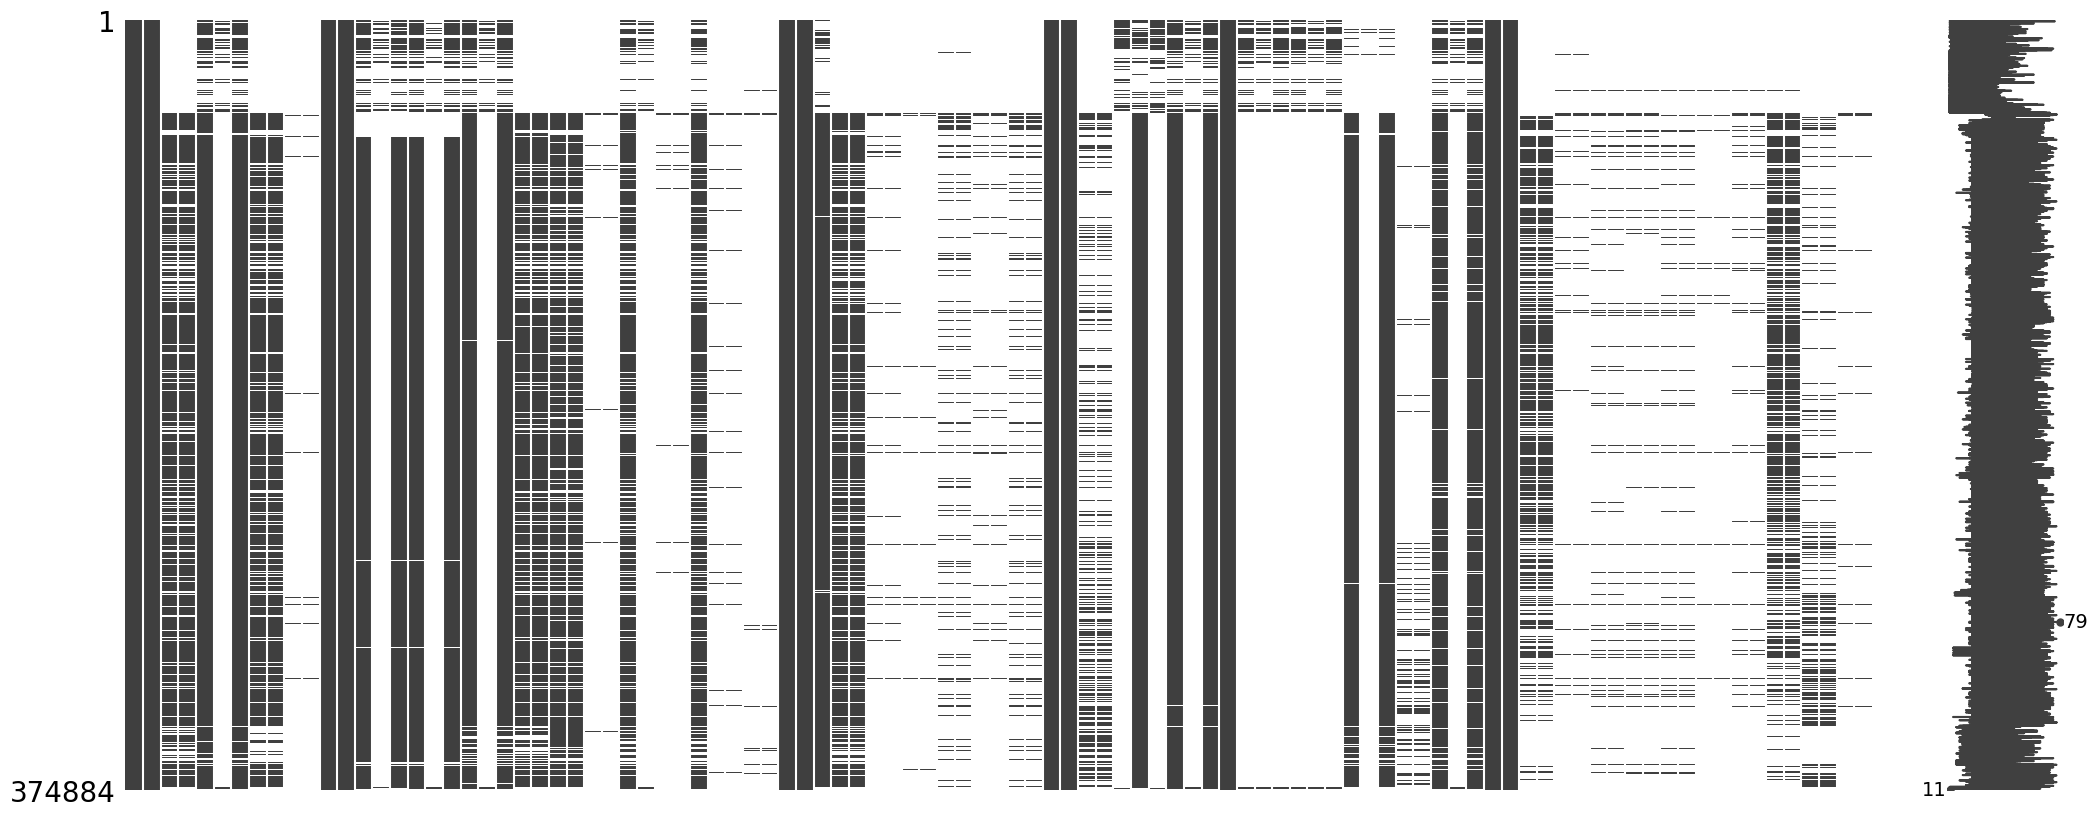

In [24]:
msno.matrix(df)

The *bar* chart seems instead more orderly, as all the columns are listed. This is indeed a more visually effective way to represent the same information showcased by the sorted list I had generated before. The length of the bars is associated to the number of non-null values of each column.

<AxesSubplot:>

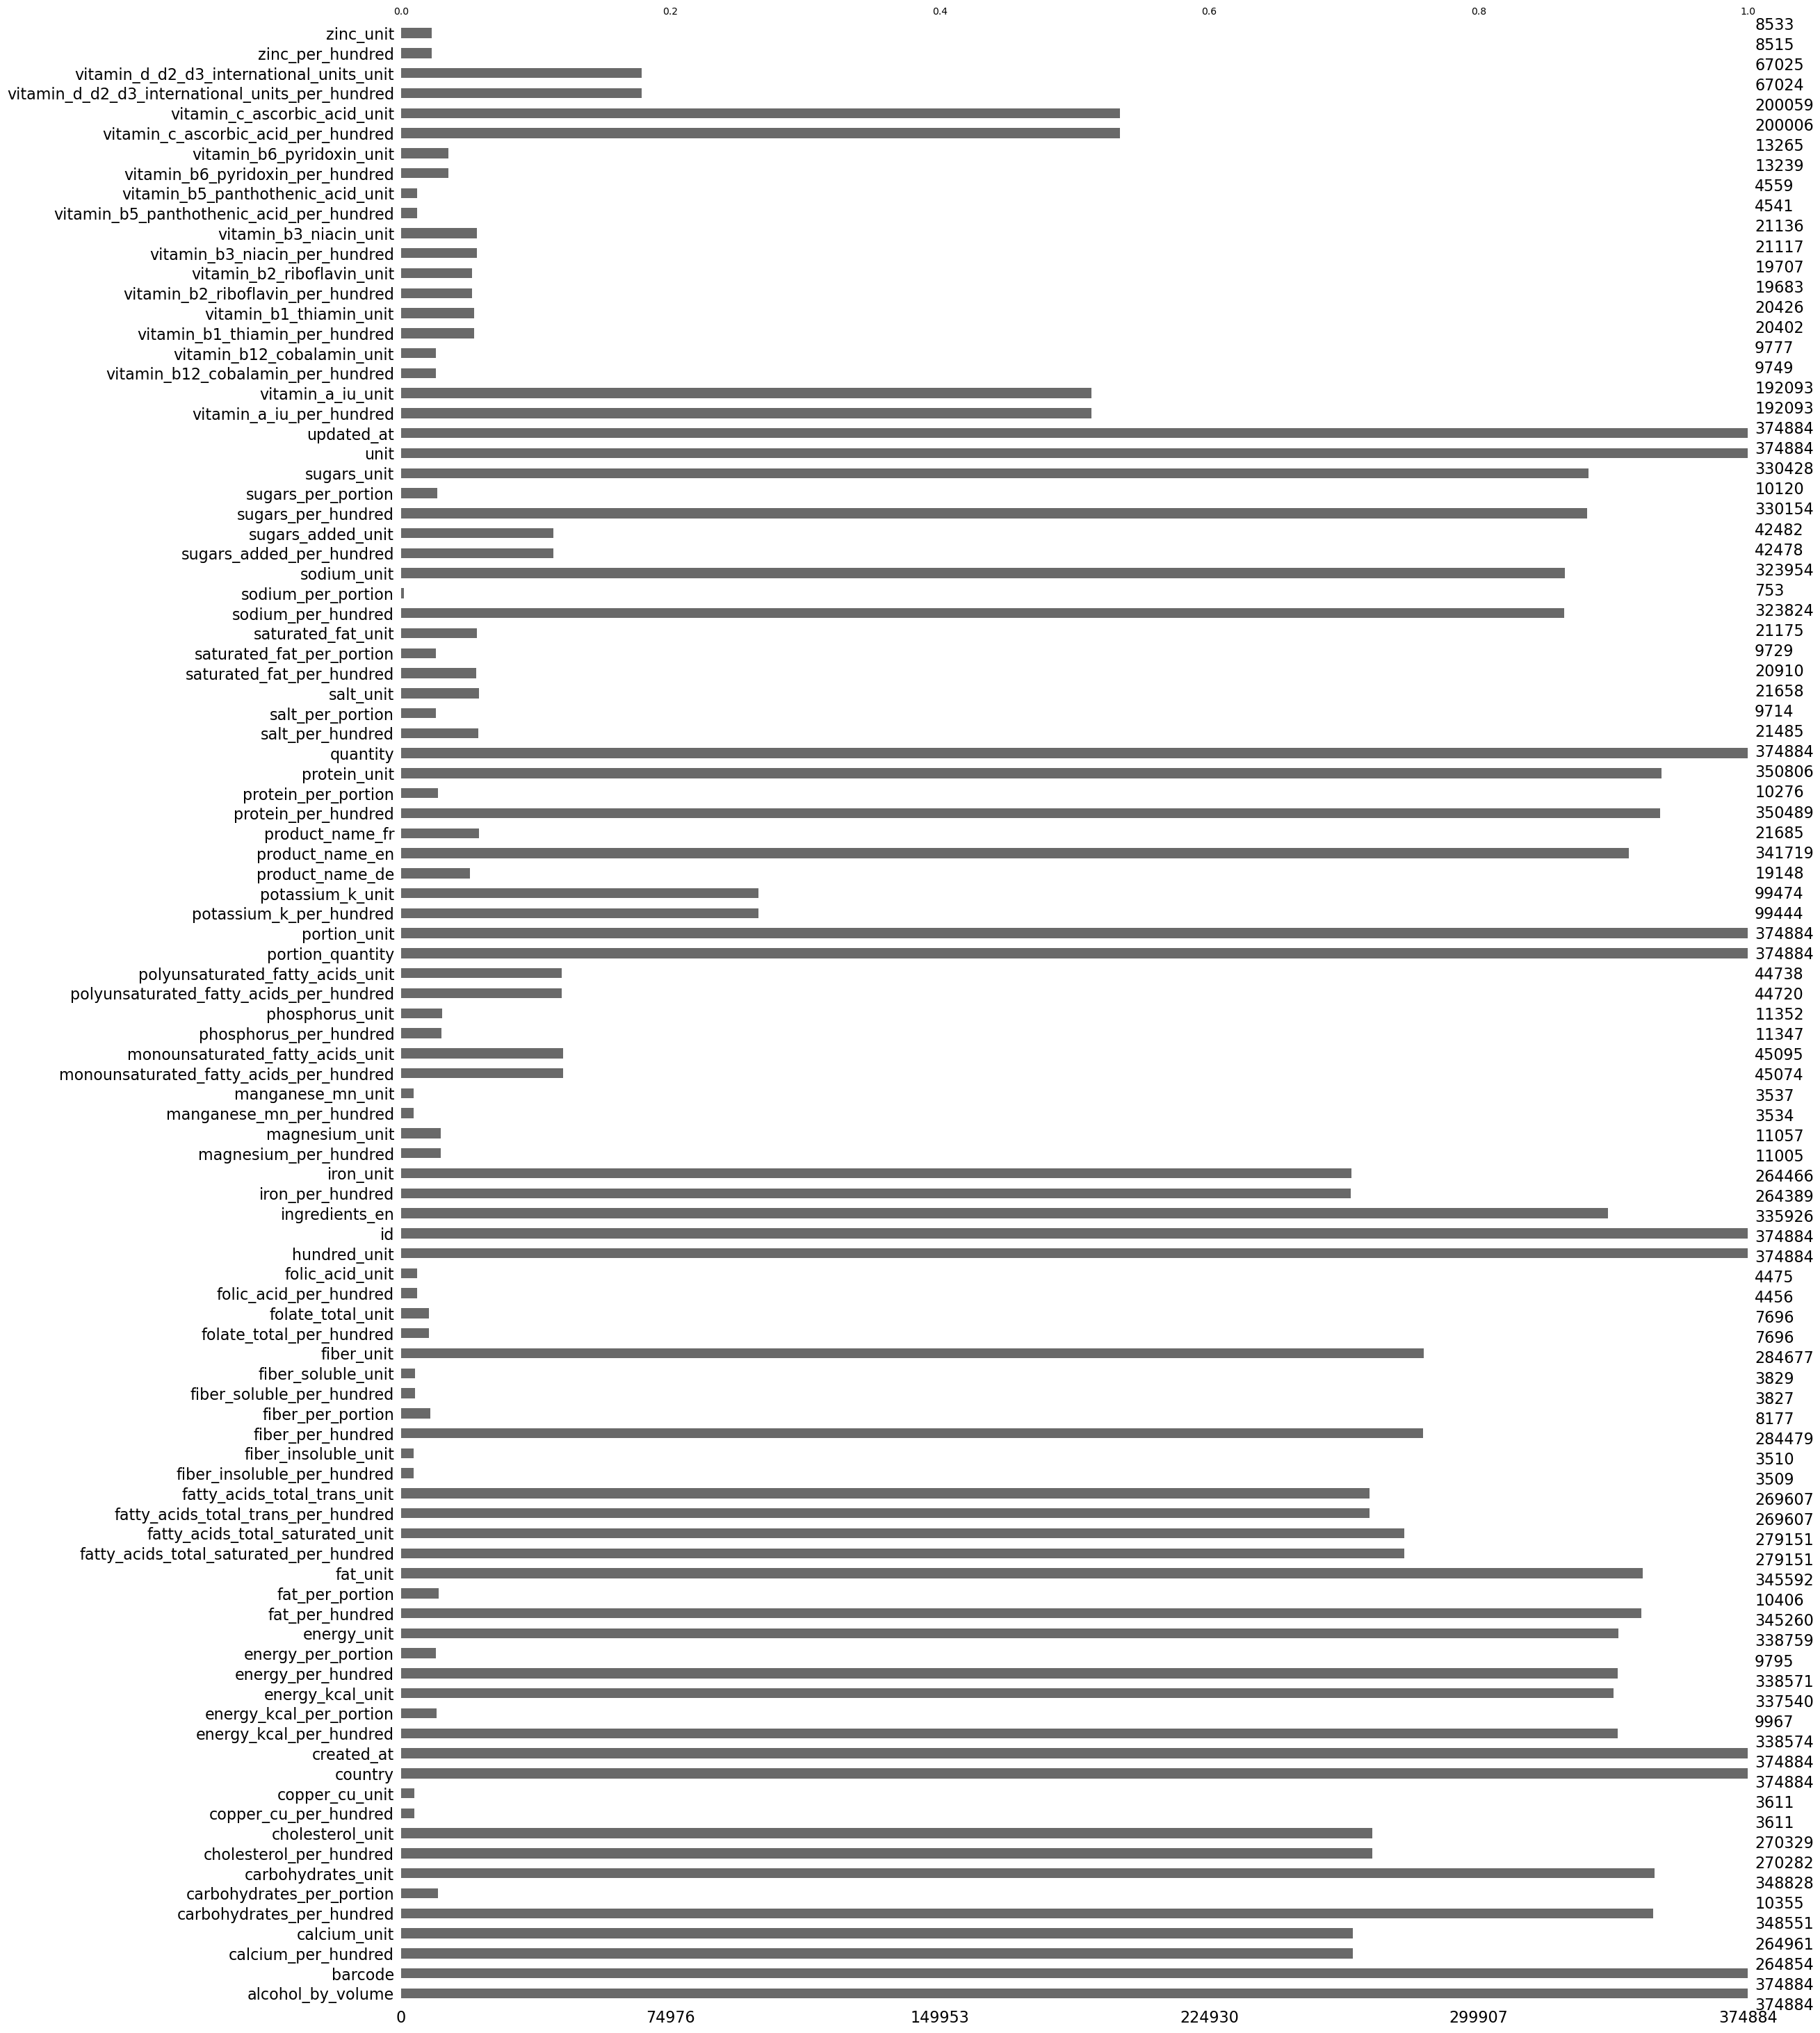

In [25]:
msno.bar(df)

### B.2.3 Bar charts

Leveraging the *Percentage (%)* information stored in `missing_values_df`, I can generate four separate bar charts, one per subplot, each representing a category of columns previously outlined (encompassed in `cols_list` for ease of use in the subsequent `for` loop).

In [26]:
cols_list = [cols_per_hundred, cols_per_portion, cols_unit, other_cols]

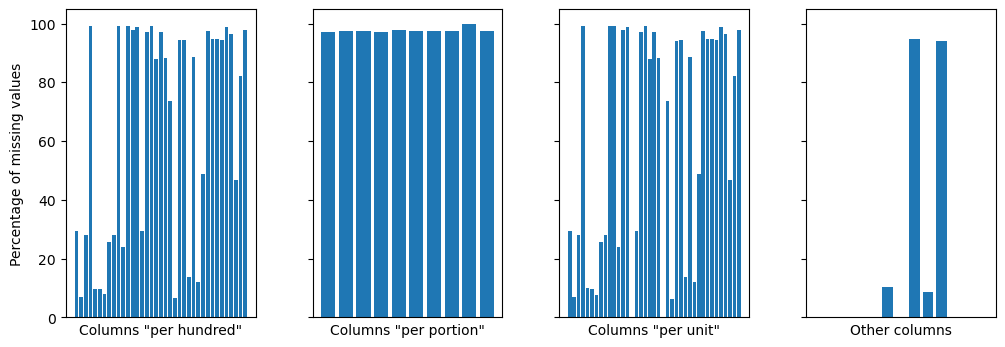

In [27]:
fig, axes = plt.subplots(
    ncols=4, sharey=True, figsize=(12, 4), gridspec_kw={"wspace": 0.3}
)

for ax, cols in zip(axes, cols_list):
    percentages = missing_values_df.loc["Percentage (%)", cols]
    ax.bar(cols, percentages)
    ax.set_xticks([])

axes[0].set_ylabel("Percentage of missing values")
axes[0].set_xlabel('Columns "per hundred"')
axes[1].set_xlabel('Columns "per portion"')
axes[2].set_xlabel('Columns "per unit"')
axes[3].set_xlabel("Other columns")
plt.show()

These bar chart are helpful in streamlining the problem of tracing back missing values, as evidently the columns "per portion" are the ones characterised by the highest amount of missing values, while on the polar opposite are found the "other" columns, not belonging to the first three categories.

To further restate this observation,it is possible to have a look at the bar charts generated using the missingno library for each column category, as shown below.

<AxesSubplot:>

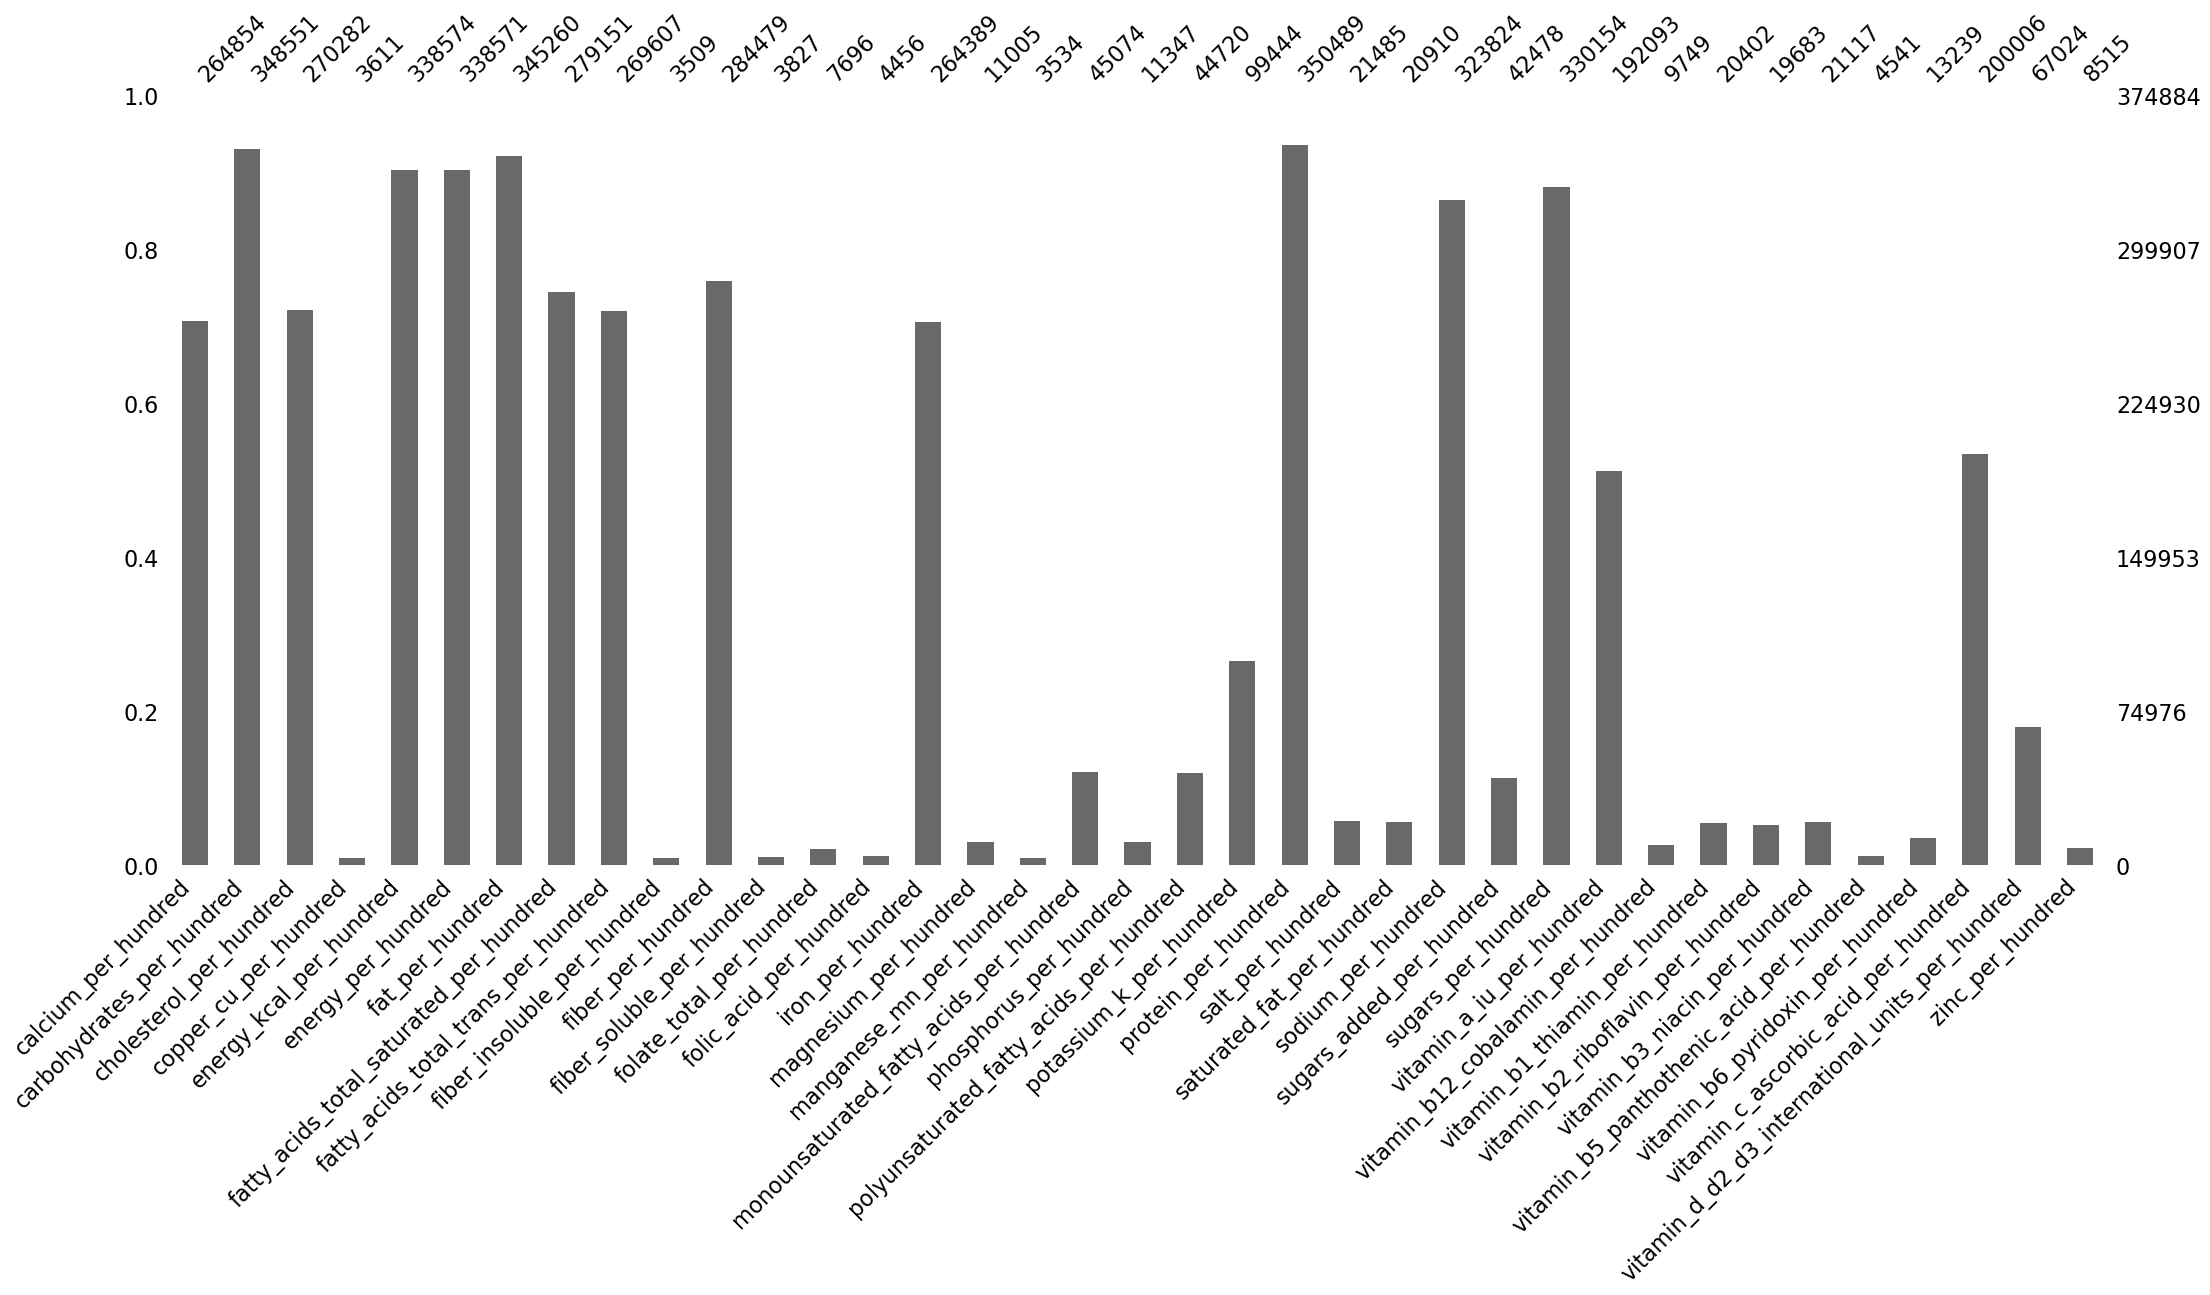

In [28]:
msno.bar(df[cols_per_hundred])

<AxesSubplot:>

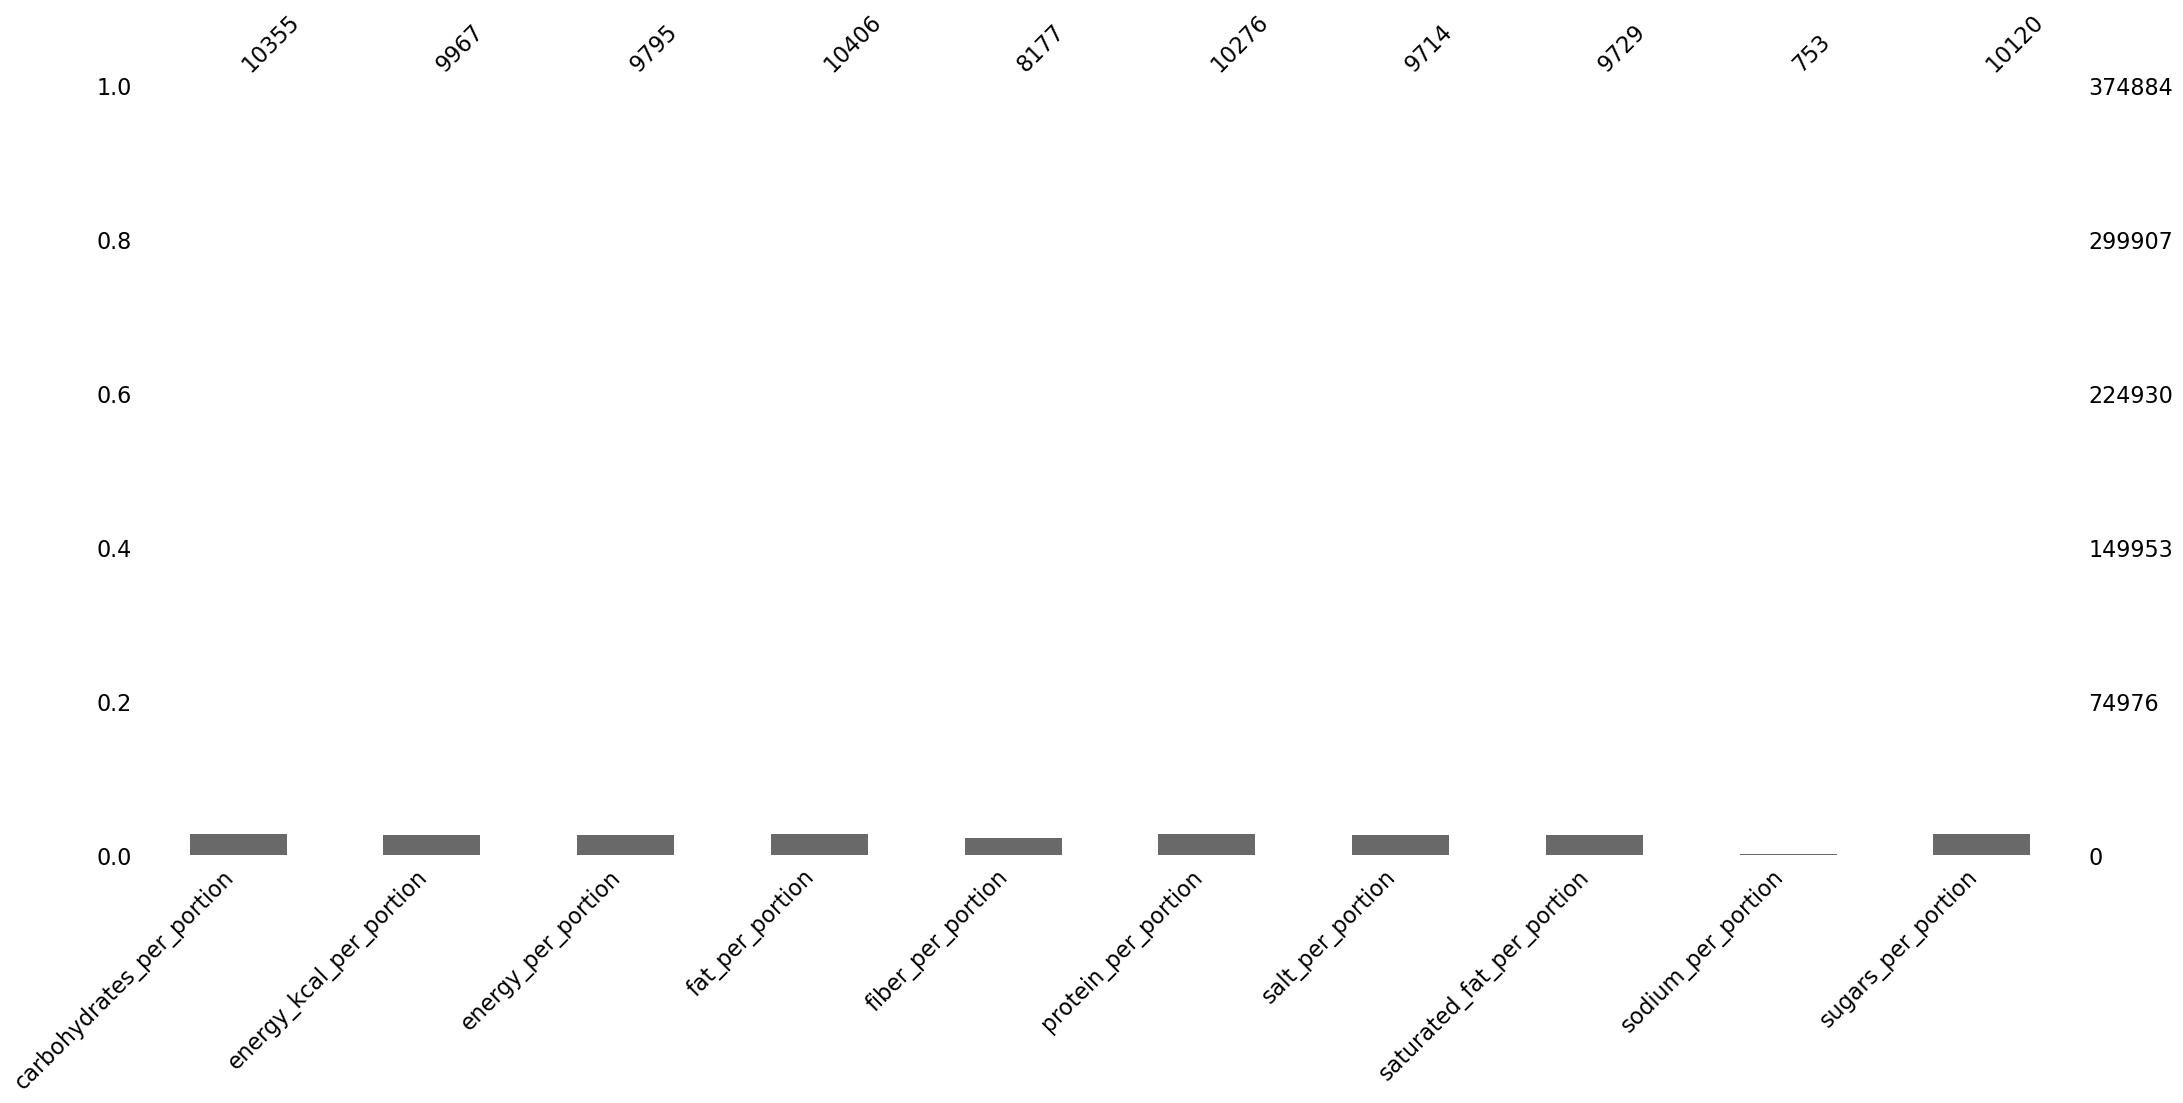

In [29]:
msno.bar(df[cols_per_portion])

<AxesSubplot:>

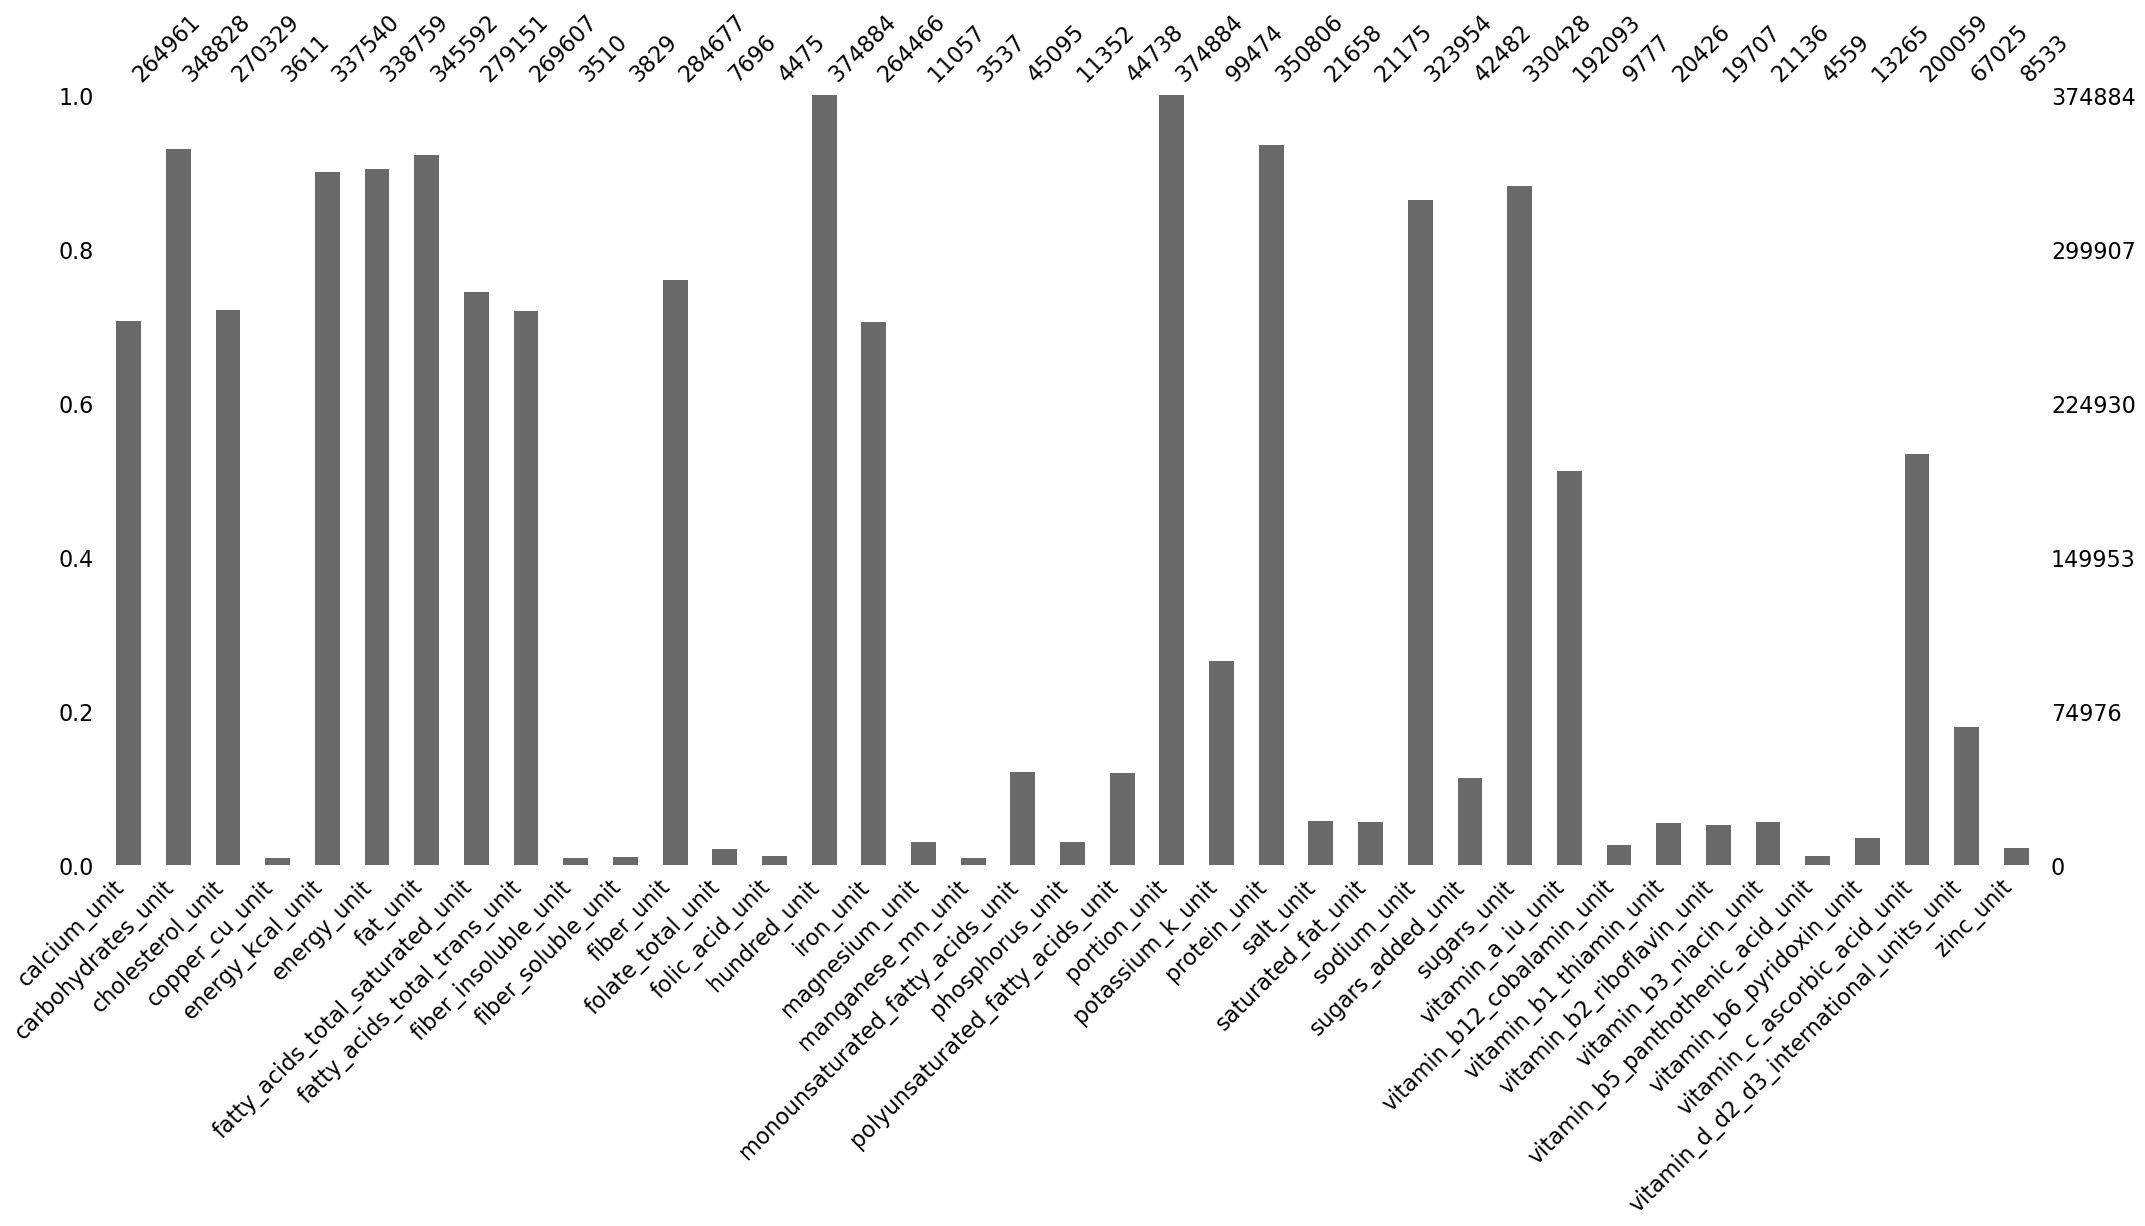

In [30]:
msno.bar(df[cols_unit])

<AxesSubplot:>

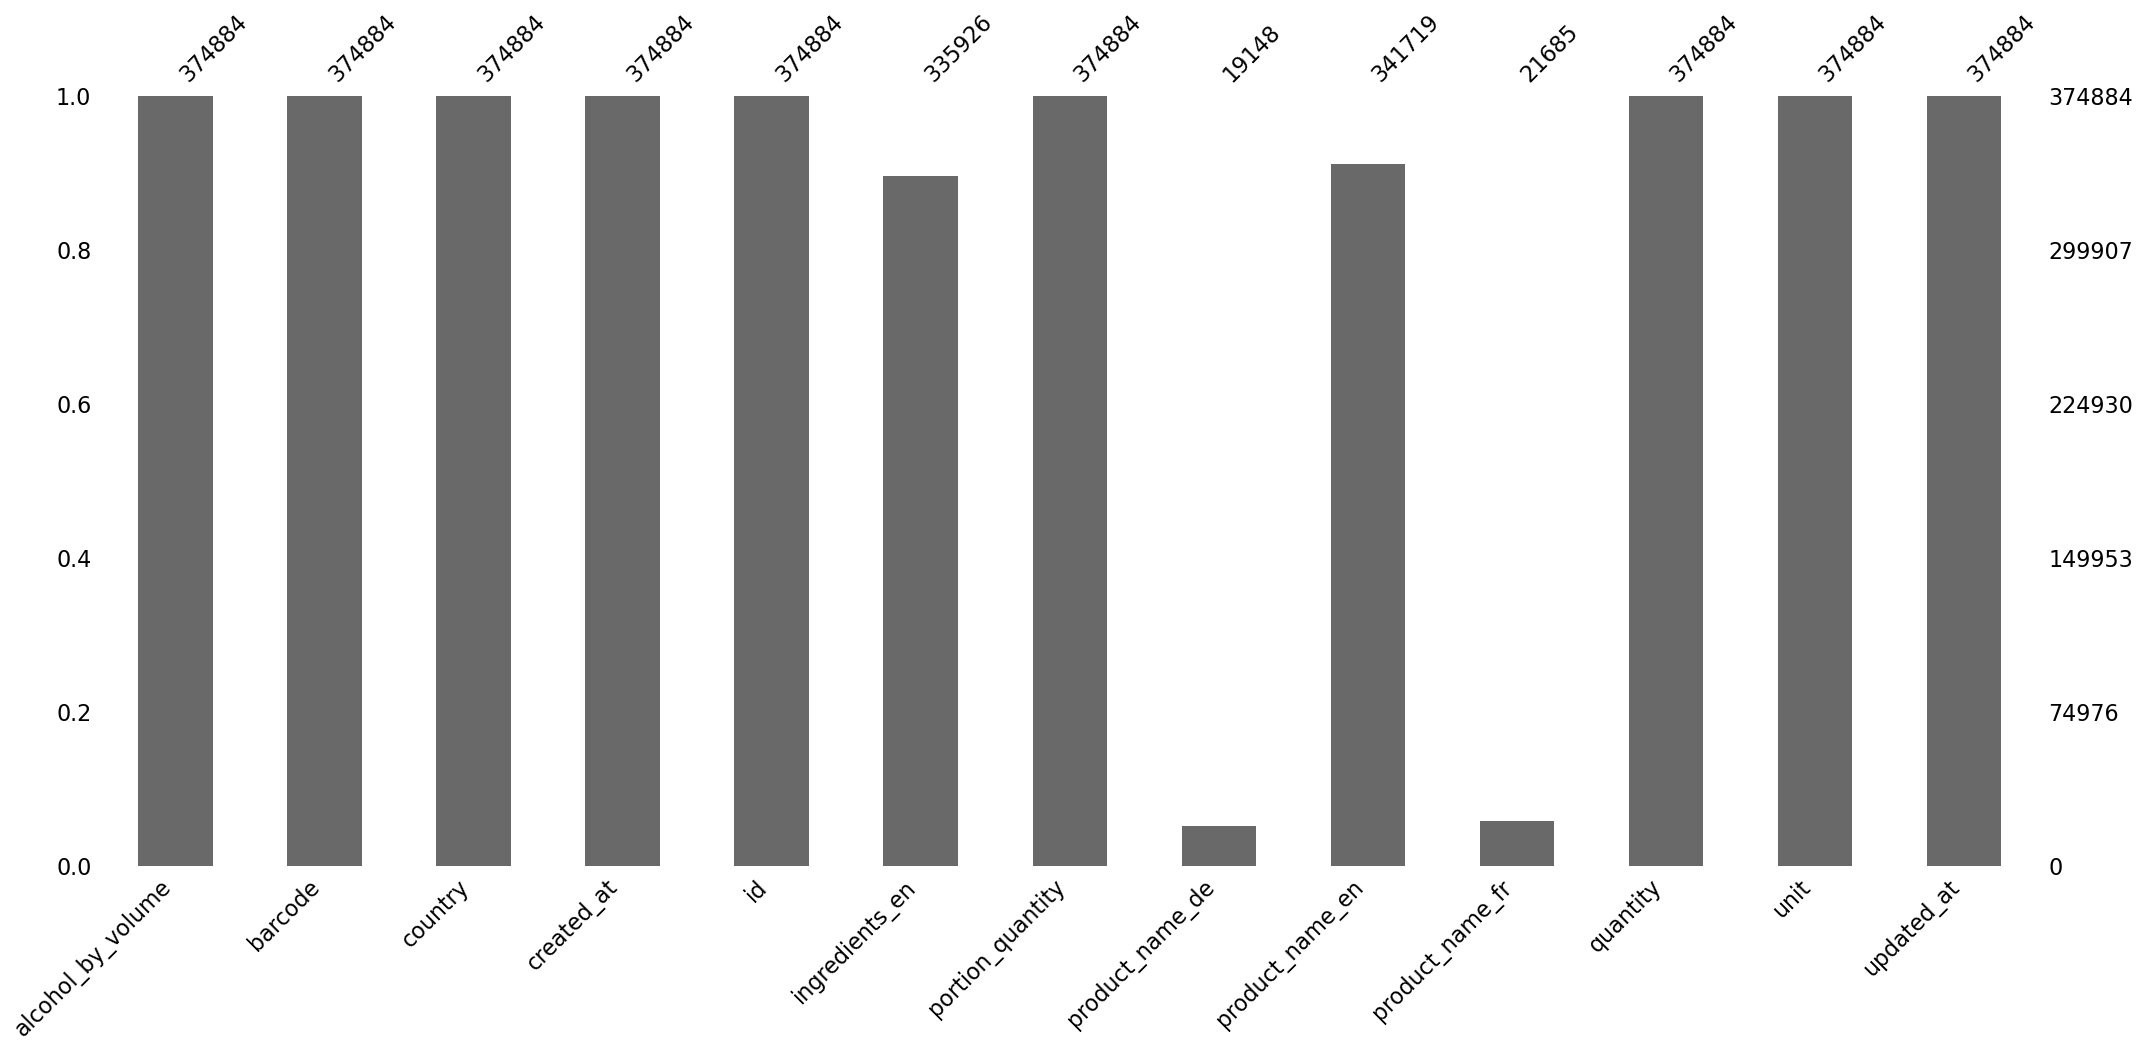

In [31]:
msno.bar(df[other_cols])

## B.3 Addressing missing values

With the intent to preserve as much information as possible inside the dataset, i.e. aiming at deleting the least amount of non-null entries possible, let's see in the following sub-tasks how I can manage to deal with the missing values spotted before.

### B.3.1 Removing rows and columns completely empty

As a first attempt, I can try to remove rows and columns that are completely empty. I can do so leveraging `dropna()` and setting the *how* parameter as *all*.

Unfortunately, I can immediately see that it would be useless to apply the change *inplace*, as the number of rows and columns of the resulting DataFrame is left unscathed. 

After all, I had already found that no column had reached a percentage of missing values equal to 100% (maximum 99,8%, from the sorted list) and that the highest amount of missing values found in any given row was 79 out of 99 columns, as shown in the *missingno* matrix.

In [32]:
df.dropna(how="all")

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
0                     0.0  8001772000030                  NaN          NaN   
1                     0.0  7610809001066                  NaN          NaN   
2                     0.0  8002530159021                  NaN          NaN   
3                     0.0  3033715065788                  NaN          NaN   
4                     0.0  7610848492740                  NaN          NaN   
...                   ...            ...                  ...          ...   
374879                0.0  7640145040283                  NaN          NaN   
374880                0.0  7640147023628                850.0           mg   
374881                0.0  3046920021593                  NaN          NaN   
374882                0.0  4044889004335                  NaN          NaN   
374883                0.0  7613379866622                  NaN          NaN   

        carbohydrates_per_hundred  carbohydrates_per_portion  \
0                           75.00                      37.50   
1                            1.50                       1.13   
2                           52.68                        NaN   
3                           70.40                      11.97   
4                           37.00                       7.40   
...                           ...                        ...   
374879                        NaN                        NaN   
374880                      48.60                       9.72   
374881                      22.00                        NaN   
374882                        NaN                        NaN   
374883                        NaN                        NaN   

       carbohydrates_unit  cholesterol_per_hundred cholesterol_unit  \
0                       g                      NaN              NaN   
1                       g                      NaN              NaN   
2                       g                      NaN              NaN   
3                       g                      NaN              NaN   
4                       g                      NaN              NaN   
...                   ...                      ...              ...   
374879                NaN                      NaN              NaN   
374880                  g                      NaN              NaN   
374881                  g                      NaN              NaN   
374882                NaN                      NaN              NaN   
374883                NaN                      NaN              NaN   

        copper_cu_per_hundred  ... vitamin_b5_panthothenic_acid_per_hundred  \
0                         NaN  ...                                      NaN   
1                         NaN  ...                                      NaN   
2                         NaN  ...                                      NaN   
3                         NaN  ...                                      NaN   
4                         NaN  ...                                      NaN   
...                       ...  ...                                      ...   
374879                    NaN  ...                                      NaN   
374880                    NaN  ...                                     45.0   
374881                    NaN  ...                                      NaN   
374882                    NaN  ...                                      NaN   
374883                    NaN  ...                                      NaN   

       vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_per_hundred  \
0                                    NaN                              NaN   
1                                    NaN                              NaN   
2                                    NaN                              NaN   
3                                    NaN                              NaN   
4                                    NaN                              NaN   
...                                  .

In [33]:
df.dropna(axis=1, how="all")

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
0                     0.0  8001772000030                  NaN          NaN   
1                     0.0  7610809001066                  NaN          NaN   
2                     0.0  8002530159021                  NaN          NaN   
3                     0.0  3033715065788                  NaN          NaN   
4                     0.0  7610848492740                  NaN          NaN   
...                   ...            ...                  ...          ...   
374879                0.0  7640145040283                  NaN          NaN   
374880                0.0  7640147023628                850.0           mg   
374881                0.0  3046920021593                  NaN          NaN   
374882                0.0  4044889004335                  NaN          NaN   
374883                0.0  7613379866622                  NaN          NaN   

        carbohydrates_per_hundred  carbohydrates_per_portion  \
0                           75.00                      37.50   
1                            1.50                       1.13   
2                           52.68                        NaN   
3                           70.40                      11.97   
4                           37.00                       7.40   
...                           ...                        ...   
374879                        NaN                        NaN   
374880                      48.60                       9.72   
374881                      22.00                        NaN   
374882                        NaN                        NaN   
374883                        NaN                        NaN   

       carbohydrates_unit  cholesterol_per_hundred cholesterol_unit  \
0                       g                      NaN              NaN   
1                       g                      NaN              NaN   
2                       g                      NaN              NaN   
3                       g                      NaN              NaN   
4                       g                      NaN              NaN   
...                   ...                      ...              ...   
374879                NaN                      NaN              NaN   
374880                  g                      NaN              NaN   
374881                  g                      NaN              NaN   
374882                NaN                      NaN              NaN   
374883                NaN                      NaN              NaN   

        copper_cu_per_hundred  ... vitamin_b5_panthothenic_acid_per_hundred  \
0                         NaN  ...                                      NaN   
1                         NaN  ...                                      NaN   
2                         NaN  ...                                      NaN   
3                         NaN  ...                                      NaN   
4                         NaN  ...                                      NaN   
...                       ...  ...                                      ...   
374879                    NaN  ...                                      NaN   
374880                    NaN  ...                                     45.0   
374881                    NaN  ...                                      NaN   
374882                    NaN  ...                                      NaN   
374883                    NaN  ...                                      NaN   

       vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_per_hundred  \
0                                    NaN                              NaN   
1                                    NaN                              NaN   
2                                    NaN                              NaN   
3                                    NaN                              NaN   
4                                    NaN                              NaN   
...                                  .

### B.3.2 Unit columns: using the mode as proxy for missing values

With a quick glance at a few `_unit` columns, I notice that they store a standardized, repetitive, string-type information, i.e. a unit of measurement.

In [34]:
df[cols_unit].head()

calcium_unit carbohydrates_unit cholesterol_unit copper_cu_unit  \
0          NaN                  g              NaN            NaN   
1          NaN                  g              NaN            NaN   
2          NaN                  g              NaN            NaN   
3          NaN                  g              NaN            NaN   
4          NaN                  g              NaN            NaN   

  energy_kcal_unit energy_unit fat_unit fatty_acids_total_saturated_unit  \
0             kCal          kJ        g                              NaN   
1             kCal          kJ        g                              NaN   
2             kCal          kJ        g                              NaN   
3             kCal          kJ        g                              NaN   
4             kCal          kJ        g                              NaN   

  fatty_acids_total_trans_unit fiber_insoluble_unit  ... vitamin_a_iu_unit  \
0                          NaN                  NaN  ...               NaN   
1                          NaN                  NaN  ...               NaN   
2                          NaN                  NaN  ...               NaN   
3                          NaN                  NaN  ...               NaN   
4                          NaN                  NaN  ...               NaN   

  vitamin_b12_cobalamin_unit vitamin_b1_thiamin_unit  \
0                        NaN                     NaN   
1                        NaN                     NaN   
2                        NaN                     NaN   
3                        NaN                     NaN   
4                        NaN                     NaN   

  vitamin_b2_riboflavin_unit vitamin_b3_niacin_unit  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

  vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_unit  \
0                               NaN                       NaN   
1                               NaN                       NaN   
2                               NaN                       NaN   
3                               NaN                       NaN   
4                               NaN                       NaN   

  vitamin_c_ascorbic_acid_unit vitamin_d_d2_d3_international_units_unit  \
0                          NaN                                      NaN   
1                          NaN                                      NaN   
2                          NaN                                      NaN   
3                          NaN                                      NaN   
4                          NaN                                      NaN   

  zinc_unit  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 39 columns]

Then it comes naturally to think about replacing the NaN values with the most frequently occurring entries, i.e. the *mode* of each column.

In order to collect the modes, I am leveraging the *top* statistic of the `describe()` method, keeping in mind that it returns another DataFrame object in which *top* is the index of one row.

In [35]:
unit_modes = df[cols_unit].describe().loc["top", :]
unit_modes

calcium_unit                                  mg
carbohydrates_unit                             g
cholesterol_unit                              mg
copper_cu_unit                                mg
energy_kcal_unit                            kCal
energy_unit                                   kJ
fat_unit                                       g
fatty_acids_total_saturated_unit               g
fatty_acids_total_trans_unit                   g
fiber_insoluble_unit                           g
fiber_soluble_unit                             g
fiber_unit                                     g
folate_total_unit                             µg
folic_acid_unit                               µg
hundred_unit                                   g
iron_unit                                     mg
magnesium_unit                                mg
manganese_mn_unit                             mg
monounsaturated_fatty_acids_unit               g
phosphorus_unit                               mg
polyunsaturated_fatt

It is important to notice that not necessarily all the columns have one unique value. While this happens for most columns, thus strengthening even more this strategy of filling null values, the columns *hundred_unit* and *portion_unit* contain multiple different units of measurement.

In [36]:
df[cols_unit].describe().loc["unique", :]

calcium_unit                                1
carbohydrates_unit                          1
cholesterol_unit                            1
copper_cu_unit                              1
energy_kcal_unit                            1
energy_unit                                 1
fat_unit                                    1
fatty_acids_total_saturated_unit            1
fatty_acids_total_trans_unit                1
fiber_insoluble_unit                        1
fiber_soluble_unit                          1
fiber_unit                                  1
folate_total_unit                           1
folic_acid_unit                             1
hundred_unit                                3
iron_unit                                   1
magnesium_unit                              1
manganese_mn_unit                           1
monounsaturated_fatty_acids_unit            1
phosphorus_unit                             1
polyunsaturated_fatty_acids_unit            1
portion_unit                      

In [37]:
print(df["portion_unit"].unique(), ",", df["hundred_unit"].unique())

['g' 'ml' 'l' 'kg' 'Floz' 'dl' '?'] , ['g' 'ml' '?']


Nonetheless, I still move on with the assumption of casting the mode of each column to their null values (in these two examples, I will cast *g*).

In [38]:
print(unit_modes["portion_unit"], ",", unit_modes["hundred_unit"])

g , g


Finally, looping over each of the target columns, I am casting the related mode using `fillna()` along with the `loc[]` operator and `inplace=True` to ensure that changes are reflected in the original DataFrame.

As a final check, I am making sure that the sum of the total missing values in each column is resulting to zero, as expected after the operation just performed.

In [39]:
for col in cols_unit:
    df.loc[:, col].fillna(unit_modes[col], inplace=True)

df[cols_unit].isnull().sum().sum()

0

### B.3.3 Replacing missing values with entries inferred from other relevant columns

This approach will be applied to the *product_name_en* column, belonging to the *other_cols* column category I had previously outlined.

It is precisely from this column category that I want to start my analysis to check whether I can infer values from similar columns which would be useful to replace missing values.

In [40]:
df[other_cols].head(10)

alcohol_by_volume        barcode country                created_at    id  \
0                0.0  8001772000030      CH  2016-06-01T11:42:22.908Z  1000   
1                0.0  7610809001066      CH  2016-06-01T11:42:25.111Z  1001   
2                0.0  8002530159021      CH  2016-06-01T11:42:25.900Z  1002   
3                0.0  3033715065788      CH  2016-06-01T11:42:26.184Z  1003   
4                0.0  7610848492740      CH  2016-06-01T11:42:26.350Z  1004   
5                0.0  7610100033247      CH  2016-06-01T11:42:29.472Z  1005   
6                0.0       76145513      CH  2016-06-02T14:01:44.255Z  1010   
7                0.0  7610800826040      CH  2016-06-02T14:01:51.499Z  1011   
8                0.0  7611654576754      CH  2016-06-02T14:01:53.274Z  1012   
9                0.0  5000159023061      CH  2016-06-02T14:01:53.348Z  1013   

                                      ingredients_en  portion_quantity  \
0  Superior quality durum wheat Pasta\r\n\r\nIngr...              50.0   
1               Bio Milk (Switzerland), kitchen salt              75.0   
2                               100%  coffee Arabica               0.0   
3  Powdered chocolate 99% (sugar, cocoa), emulsif...              17.0   
4  cocoa paste * (Honduras), raw cane sugar * (Pa...              20.0   
5                                       cocoa powder              17.0   
6  Sugar, whole milk powder, cocoa butter, cocoa ...              25.0   
7                                  durum wheat flour               0.0   
8                                              Honey              10.0   
9  Sugar, Skimmed Milk Powder, Cocoa Butter, Gluc...               0.0   

                            product_name_de  \
0                           Bio Spaghetti     
1                     Naturaplan Mozzarella   
2                  Caffè Mauro - Bio Kaffe    
3  Le chocolat Cailler -  schokoladenpulver   
4     Naturaplan ExtraDunkle Schokolade 70%   
5                     Cailler - Kakaopulver   
6                                 Toblerone   
7                               Knöpflimehl   
8                Naturaplan Bio Blütenhonig   
9                                       NaN   

                              product_name_en  \
0                              Bio Spaghetti    
1                       Naturaplan Mozzarella   
2  Caffè Mauro - Roasted organic coffee blend   
3     Le chocolat Cailler -  chocolate powder   
4         Naturaplan Extra Dark Chocolate 70%   
5                                         NaN   
6                                   Toblerone   
7                               Knöpfli flour   
8                Naturaplan Bio Flower Honey    
9                                   Maltesers   

                             product_name_fr  quantity unit  \
0                              Spaghetti Bio     500.0    g   
1                      Naturaplan Mozzarella     150.0    g   
2                    Caffè Mauro - café bio     1000.0    g   
3  Le chocolat Cailler - chocolat en poudre      500.0    g   
4         Naturaplan Chocolat extra noir 70%     100.0    g   
5                  Cailler - Poudre de cacao     200.0    g   
6                                  Toblerone      50.0    g   
7                       Farine pour knoepfli    1000.0    g   
8              Naturaplan Miel de fleurs Bio     100.0    g   
9                                        NaN     100.0    g   

                 updated_at  
0  2019-10-30T13:46:32.651Z  
1  2019-10-30T13:47:12.174Z  
2  2019-10-30T13:48:12.635Z  
3  2019-10-30T13:49:49.816Z  
4  2019-10-30T13:50:42.826Z  
5  2021-02-06T14:47:12.969Z  
6  2019-03-20T14:14:44.344Z  
7  2018-11-14T12:37:46.564Z  
8  2018-11-14T12:37:54.619Z  
9  2019-03-08T14:50:41.576Z

The columns *product_name_de* and *product_name_fr* seem to contain equivalent information to *product_name_en*, as they show the name of the same product, just in another language. It would then make sense to use them to replace the missing values of *product_name_en* whenever possible, i.e. whenever at least one of the two holds a non-null value.

Let's start by keeping into account the initial number of missing values relevant for this sub-task.

In [41]:
missing_values_df["product_name_en"]

Missing values    33165
Percentage (%)      8.8
Name: product_name_en, dtype: object

With a snapshot of only the relevant `df` columns for this task, I notice that the last rows are well suited to check if the intended change occurs with success.

In [42]:
df.loc[:, "product_name_de":"product_name_fr"]

product_name_de  \
0                                         Bio Spaghetti     
1                                   Naturaplan Mozzarella   
2                                Caffè Mauro - Bio Kaffe    
3                Le chocolat Cailler -  schokoladenpulver   
4                   Naturaplan ExtraDunkle Schokolade 70%   
...                                                   ...   
374879                                                NaN   
374880  Bourquin nutrition - Sportgetränk (Zitronenges...   
374881                                                NaN   
374882                                                NaN   
374883                                                NaN   

                                       product_name_en  \
0                                       Bio Spaghetti    
1                                Naturaplan Mozzarella   
2           Caffè Mauro - Roasted organic coffee blend   
3              Le chocolat Cailler -  chocolate powder   
4                  Naturaplan Extra Dark Chocolate 70%   
...                                                ...   
374879  Nutriathletic - Whey (Swiss chocolate flavour)   
374880                                             NaN   
374881                                             NaN   
374882                                             NaN   
374883                                             NaN   

                                          product_name_fr  
0                                           Spaghetti Bio  
1                                   Naturaplan Mozzarella  
2                                 Caffè Mauro - café bio   
3               Le chocolat Cailler - chocolat en poudre   
4                      Naturaplan Chocolat extra noir 70%  
...                                                   ...  
374879                                                NaN  
374880  Bourquin nutrition - Boisson d'effort (Goût ci...  
374881                    Lindt - Noir puissant 85% cacao  
374882                                                NaN  
374883                                                NaN  

[374884 rows x 3 columns]

Specifically, I am aiming at filling a missing value of *product_name_en* with an eventually existing value from *product_name_fr*, or from *product_name_de* if not found in the former. If both columns have also a missing value, no change will be applied to *product_name_en*.

After performing the change, I can look again at the final rows of `df`, particularly at row 374880 and 374881, noticing that *product_name_fr* has been successfully used to replace missing values in *product_name_en*.

In [43]:
df["product_name_en"] = df["product_name_en"].fillna(df["product_name_fr"])
df["product_name_en"] = df["product_name_en"].fillna(df["product_name_de"])
df.loc[374879:374883, "product_name_de":"product_name_fr"]

product_name_de  \
374879                                                NaN   
374880  Bourquin nutrition - Sportgetränk (Zitronenges...   
374881                                                NaN   
374882                                                NaN   
374883                                                NaN   

                                          product_name_en  \
374879     Nutriathletic - Whey (Swiss chocolate flavour)   
374880  Bourquin nutrition - Boisson d'effort (Goût ci...   
374881                    Lindt - Noir puissant 85% cacao   
374882                                                NaN   
374883                                                NaN   

                                          product_name_fr  
374879                                                NaN  
374880  Bourquin nutrition - Boisson d'effort (Goût ci...  
374881                    Lindt - Noir puissant 85% cacao  
374882                                                NaN  
374883                                                NaN

I performed two additional checks to see, on one hand, if the logic worked also when taking an existing value from *product_name_de*, and, on the other hand, other examples of french names being casted to the english names column. Ultimately the result of these checks confirm that the change has been successfully implemented.

In [44]:
df.loc[
    (df["product_name_fr"].isnull()) & (df["product_name_de"].notnull()),
    "product_name_de":"product_name_fr",
].head()

product_name_de  \
71               Knorr : Quick soup, Croûtons   
129     granini : Fruchtig & Prickelnd, Apfel   
140  RAMSEIER : HOCHSTÄMMER, obsaft naturtrüb   
141        Valser -  Silence, still und sanft   
142           RAMSEIER : SÜESSMOST, naturrein   

                              product_name_en product_name_fr  
71               Knorr : Quick soup, Croûtons             NaN  
129         granini: Fruity & tingling, apple             NaN  
140  RAMSEIER : HOCHSTÄMMER, obsaft naturtrüb             NaN  
141        Valser -  Silence, still und sanft             NaN  
142           RAMSEIER : SÜESSMOST, naturrein             NaN

In [45]:
df.loc[
    (df["product_name_fr"].notnull()) & (df["product_name_de"].isnull()),
    "product_name_de":"product_name_fr",
].head()

product_name_de                 product_name_en  \
26             NaN               OPALINE : ABRCOTS   
27             NaN  OPALINE : POMMES ET FRAMBOISES   
28             NaN      OPALINE - POMMES ET POIRES   
56             NaN                         Cenovis   
57             NaN      Cafés TROTTET : MOCCA LUXE   

                   product_name_fr  
26               OPALINE : ABRCOTS  
27  OPALINE : POMMES ET FRAMBOISES  
28      OPALINE - POMMES ET POIRES  
56                         Cenovis  
57      Cafés TROTTET : MOCCA LUXE

Lastly, it is worth noticing that the number of missing values in the *product_name_en* has been drastically reduced to 18866, so a total of 14299 entries has been filled in with the logic just described, almost halving the percentage of missing values.

In [46]:
df["product_name_en"].isnull().sum()

18866

In [47]:
missing_values_df.loc["Missing values", "product_name_en"] - df[
    "product_name_en"
].isnull().sum()

14299

### B.3.4 Filling up missing values on the basis of common knowledge

For this strategy I am going to refer to the column *iron_per_hundred*, characterised by the following amount of missing values:

In [48]:
missing_values_df["iron_per_hundred"]

Missing values    110495
Percentage (%)      29.5
Name: iron_per_hundred, dtype: object

One explanation for these missing values, amounting to about 30% of the total values of the column, could be that the related products are iron-free, for instance in the case of ice creams. Let's check if we are able to find this information in any column (reasonably I will search only inside the *other_cols* category).

In [49]:
df[other_cols + ["iron_per_hundred"]].head()

alcohol_by_volume        barcode country                created_at    id  \
0                0.0  8001772000030      CH  2016-06-01T11:42:22.908Z  1000   
1                0.0  7610809001066      CH  2016-06-01T11:42:25.111Z  1001   
2                0.0  8002530159021      CH  2016-06-01T11:42:25.900Z  1002   
3                0.0  3033715065788      CH  2016-06-01T11:42:26.184Z  1003   
4                0.0  7610848492740      CH  2016-06-01T11:42:26.350Z  1004   

                                      ingredients_en  portion_quantity  \
0  Superior quality durum wheat Pasta\r\n\r\nIngr...              50.0   
1               Bio Milk (Switzerland), kitchen salt              75.0   
2                               100%  coffee Arabica               0.0   
3  Powdered chocolate 99% (sugar, cocoa), emulsif...              17.0   
4  cocoa paste * (Honduras), raw cane sugar * (Pa...              20.0   

                            product_name_de  \
0                           Bio Spaghetti     
1                     Naturaplan Mozzarella   
2                  Caffè Mauro - Bio Kaffe    
3  Le chocolat Cailler -  schokoladenpulver   
4     Naturaplan ExtraDunkle Schokolade 70%   

                              product_name_en  \
0                              Bio Spaghetti    
1                       Naturaplan Mozzarella   
2  Caffè Mauro - Roasted organic coffee blend   
3     Le chocolat Cailler -  chocolate powder   
4         Naturaplan Extra Dark Chocolate 70%   

                             product_name_fr  quantity unit  \
0                              Spaghetti Bio     500.0    g   
1                      Naturaplan Mozzarella     150.0    g   
2                    Caffè Mauro - café bio     1000.0    g   
3  Le chocolat Cailler - chocolat en poudre      500.0    g   
4         Naturaplan Chocolat extra noir 70%     100.0    g   

                 updated_at  iron_per_hundred  
0  2019-10-30T13:46:32.651Z               NaN  
1  2019-10-30T13:47:12.174Z               NaN  
2  2019-10-30T13:48:12.635Z               NaN  
3  2019-10-30T13:49:49.816Z               NaN  
4  2019-10-30T13:50:42.826Z               NaN

Product name columns seem suitable for finding out which rows refer to ice cream products. In order to do so, I am applying a boolean selection leveraging a simple lambda function that checks whether the string "ice cream" is inside an entry of the *product_name_en* column. I am searching also for "glace" and "crème glacée" as both french and german names have been used to replace null values of *product_name_en*.

In [50]:
target_rows = df["product_name_en"].apply(
    lambda x: any(
        term in str(x).lower() for term in ["ice cream", "glace", "crème glacée"]
    )
)

df.loc[
    target_rows,
    other_cols + ["iron_per_hundred"],
]

alcohol_by_volume        barcode country                created_at  \
777                   0.0  7617400040029      CH  2016-06-18T11:30:51.274Z   
872                   0.0  7610089368910      CH  2016-06-24T06:42:02.277Z   
873                   0.0  7610089368934      CH  2016-06-24T06:42:02.998Z   
5108                  0.0  7640168230074      CH  2016-07-18T15:50:44.571Z   
5112                  0.0  7640168230043      CH  2016-07-18T15:50:56.594Z   
...                   ...            ...     ...                       ...   
374385                0.0  7640118619591      CH  2021-08-20T13:38:06.843Z   
374587                0.0  7624841632065      CH  2021-09-12T12:24:29.706Z   
374666                0.0  7649997793057      CH  2021-09-19T13:57:40.762Z   
374681                0.0  4007993028246      CH  2021-09-19T15:27:42.886Z   
374750                0.0  7640185210165      CH  2021-09-24T12:27:36.433Z   

            id                                     ingredients_en  \
777       1774                                                NaN   
872       1871                                                NaN   
873       1872                                                NaN   
5108      6112  Gebirgsmilch, Zucker, Gebirgscreme, Dextrose, ...   
5112      6116  Mountain milk, mango, mountain cream, sugar, d...   
...        ...                                                ...   
374385  376434                                                NaN   
374587  376642                                                NaN   
374666  376722                                                NaN   
374681  376737                                                NaN   
374750  376808                                                NaN   

        portion_quantity                                    product_name_de  \
777                 40.0                                Vanille : Rahmglace   
872                 71.0                                                NaN   
873                 73.0                                                NaN   
5108                90.0             Ruci Swiss Rahm-Glace Lassi & Kardamon   
5112                90.0                 Ruci SWISS Eiscreme Mongo-Kardamom   
...                  ...                                                ...   
374385               0.0           Molki Meiringen - Muggestutz Hasli-Glace   
374587              72.0  Coop Qualité & Prix - Cornet mit Rahmglace Van...   
374666               0.0                                                NaN   
374681              66.0                                                NaN   
374750               0.0                                                NaN   

                                          product_name_en  \
777                                Vanille : Crème Glacée   
872            Dr.Oetker : My Ice Cream : Vanilla Flavour   
873          Dr.Oetker : My Ice Cream : Chocolate Flavour   
5108                Ruci Swiss Ice Cream Lassi & Kardamom   
5112                Ruci SWISS ICE CREAM MANGO & KARDAMOM   
...                                                   ...   
374385           Molki Meiringen - Muggestutz Hasli-Glace   
374587  Coop Qualité & Prix - Cornet de crème glacée à...   
374666                     Oba Glace (Crunchy Cara/huète)   
374681                                   Toblerone glace    
374750  Roger Fraisere Paleta Loca glaces artisanales ...   

                                          product_name_fr  quantity unit  \
777                                Vanille : Crème Glacée     480.0    g   
872            Dr.Oetker : My Ice Cream : Vanilla Flavour      85.0    g   
873          Dr.Oetker : My Ice Cream : Chocolate Flavour      95.0    g   
5108            Ruci Swiss Crème glacée lassi & cardamone     480.0   ml   
5112            Ruci SWISS crème glacé mangue & kardadome     480.0   ml   
...                                                   ...       ...  ...   
374385                      

Out of these entries, I can notice that several have already an existing value for *iron_per_hundred*, and not necessarily 0.

In [51]:
print(
    f'There are {df.loc[target_rows & df["iron_per_hundred"].isnull(), "iron_per_hundred"].isnull().sum()} null values in "iron_per_hundred"'
)
print(
    f'There are {df.loc[target_rows & (df["iron_per_hundred"] == 0), "iron_per_hundred"].count()} entries equal to zero in "iron_per_hundred"'
)
print(
    f'There are {df.loc[target_rows & df["iron_per_hundred"] > 0, "iron_per_hundred"].count()} entries greater than zero in "iron_per_hundred"'
)
print(
    f'There are {len(df.loc[target_rows, "iron_per_hundred"])} total entries in "iron_per_hundred" related to ice creams'
)

There are 508 null values in "iron_per_hundred"
There are 3710 entries equal to zero in "iron_per_hundred"
There are 2827 entries greater than zero in "iron_per_hundred"
There are 7045 total entries in "iron_per_hundred" related to ice creams


For the purpose of this subtask I am only interested in replacing with zero the null values in the column *iron_per_hundred* relatively to the target rows related to ice cream products. In total this change will then affect the 508 entries identified above, as further confirmed by the difference of missing values with *missing_values_df* after performing the change.

In [52]:
df.loc[target_rows & df["iron_per_hundred"].isnull(), "iron_per_hundred"] = 0.0

missing_values_df["iron_per_hundred"]["Missing values"] - df[
    "iron_per_hundred"
].isnull().sum()

508

I assumed that the same exercise could be run for diary products, starting from milk itself, but after finding out that for these products the majority has an iron_per_hundred content greater than zero, I didn't feel confident enough for casting zero to the null values related to this product category.

In [53]:
target_rows = df["product_name_en"].apply(
    lambda x: any(term in str(x).lower() for term in ["milk", "lait", "milch"])
)

print(
    f'There are {df.loc[target_rows & df["iron_per_hundred"].isnull(), "iron_per_hundred"].isnull().sum()} null values in "iron_per_hundred"'
)
print(
    f'There are {df.loc[target_rows & (df["iron_per_hundred"] == 0), "iron_per_hundred"].count()} entries equal to zero in "iron_per_hundred"'
)
print(
    f'There are {df.loc[target_rows & df["iron_per_hundred"] > 0, "iron_per_hundred"].count()} entries greater than zero in "iron_per_hundred"'
)
print(
    f'There are {len(df.loc[target_rows, "iron_per_hundred"])} total entries in "iron_per_hundred" related to milk'
)

There are 2178 null values in "iron_per_hundred"
There are 4554 entries equal to zero in "iron_per_hundred"
There are 5838 entries greater than zero in "iron_per_hundred"
There are 12570 total entries in "iron_per_hundred" related to milk


### B.3.5 Highlighting missing fields in text-based columns

For this scenario I will focus on the text-based column *ingredients_en*, replacing missing values with the tag "ingredient_missing". Let's start by checking the original missing values of this column.

In [54]:
missing_values_df["ingredients_en"]

Missing values    38958
Percentage (%)     10.4
Name: ingredients_en, dtype: object

After assigning the designated tag as replacement of the null values, I can check that no further null value is remaining in the *ingredients_en* column. Furthermore, I can visually check the result looking at a few relevant entries.

In [55]:
df.loc[df["ingredients_en"].isnull(), "ingredients_en"] = "ingredient_missing"

In [56]:
df["ingredients_en"].isnull().sum()

0

In [57]:
df.loc[df["ingredients_en"] == "ingredient_missing", other_cols].head(3)

alcohol_by_volume        barcode country                created_at    id  \
11                0.0  7640155340014      CH  2016-06-02T14:02:47.788Z  1015   
12                0.0  7610849101801      CH  2016-06-02T14:02:50.467Z  1016   
16                0.0  7610803008085      CH  2016-06-02T14:03:05.559Z  1020   

        ingredients_en  portion_quantity                product_name_de  \
11  ingredient_missing               0.0      Rythm 108 - banana muffin   
12  ingredient_missing              10.0  Naturaplan Konfitüre Aprikose   
16  ingredient_missing               0.0      Naturaplan : Mehrkornmehl   

                       product_name_en                     product_name_fr  \
11           Rythm 108 - banana muffin           Rythm 108 - banana muffin   
12              Naturaplan Apricot Jam       Naturaplan Confiture Abricots   
16  Naturaplan : Farine multi-céréales  Naturaplan : Farine multi-céréales   

    quantity unit                updated_at  
11      42.0    g  2021-08-08T09:31:53.864Z  
12     250.0    g  2018-11-14T12:38:00.486Z  
16    1000.0    g  2016-08-18T08:06:42.640Z

### B.3.6 Dropping columns with excessive amount of missing values

So far the only change affecting the shape of `df` has been the removal of duplicated rows. This is confirmed by the fact that the shape still matches what defined as *shape1* after having performed such change.

In [58]:
print(df.shape, df.shape == shape1)

(374884, 99) True


The purpose of this sub-task is to drop the columns that have a percentage of missing values higher than 95%, as they wouldn't allow sufficient information to be leveraged for further analysis.

To facilitate the execution of this task, I am redefining *missing_values_df* in the same way done previously, but in light of the new corrections that have been performed to missing values.

In [59]:
for col in df.columns:
    missing_values = df[col].isnull().sum()
    missing_values_df.loc["Missing values", col] = missing_values
    missing_values_df.loc["Percentage (%)", col] = round(
        missing_values * 100 / shape1[0], 1
    )


missing_values_df

alcohol_by_volume barcode calcium_per_hundred calcium_unit  \
Missing values                 0       0              110030            0   
Percentage (%)               0.0     0.0                29.4          0.0   

               carbohydrates_per_hundred carbohydrates_per_portion  \
Missing values                     26333                    364529   
Percentage (%)                       7.0                      97.2   

               carbohydrates_unit cholesterol_per_hundred cholesterol_unit  \
Missing values                  0                  104602                0   
Percentage (%)                0.0                    27.9              0.0   

               copper_cu_per_hundred  ...  \
Missing values                371273  ...   
Percentage (%)                  99.0  ...   

               vitamin_b5_panthothenic_acid_per_hundred  \
Missing values                                   370343   
Percentage (%)                                     98.8   

               vitamin_b5_panthothenic_acid_unit  \
Missing values                                 0   
Percentage (%)                               0.0   

               vitamin_b6_pyridoxin_per_hundred vitamin_b6_pyridoxin_unit  \
Missing values                           361645                         0   
Percentage (%)                             96.5                       0.0   

               vitamin_c_ascorbic_acid_per_hundred  \
Missing values                              174878   
Percentage (%)                                46.6   

               vitamin_c_ascorbic_acid_unit  \
Missing values                            0   
Percentage (%)                          0.0   

               vitamin_d_d2_d3_international_units_per_hundred  \
Missing values                                          307860   
Percentage (%)                                            82.1   

               vitamin_d_d2_d3_international_units_unit zinc_per_hundred  \
Missing values                                        0           366369   
Percentage (%)                                      0.0             97.7   

               zinc_unit  
Missing values         0  
Percentage (%)       0.0  

[2 rows x 99 columns]

I can filter out the columns with a percentage of missing values greater than 95%, and gather them in an iterable to be used then with `drop()`.

In [60]:
cols_to_drop = missing_values_df.columns[missing_values_df.T["Percentage (%)"] > 95]
cols_to_drop

Index(['carbohydrates_per_portion', 'copper_cu_per_hundred',
       'energy_kcal_per_portion', 'energy_per_portion', 'fat_per_portion',
       'fiber_insoluble_per_hundred', 'fiber_per_portion',
       'fiber_soluble_per_hundred', 'folate_total_per_hundred',
       'folic_acid_per_hundred', 'magnesium_per_hundred',
       'manganese_mn_per_hundred', 'phosphorus_per_hundred',
       'protein_per_portion', 'salt_per_portion', 'saturated_fat_per_portion',
       'sodium_per_portion', 'sugars_per_portion',
       'vitamin_b12_cobalamin_per_hundred',
       'vitamin_b5_panthothenic_acid_per_hundred',
       'vitamin_b6_pyridoxin_per_hundred', 'zinc_per_hundred'],
      dtype='object')

In [61]:
df.drop(cols_to_drop, axis=1, inplace=True)

Lastly, by checking the resulting shape of `df`, I can notice that 22 columns have been dropped: more than 20% of the dataset was useless for any further analysis!

In [62]:
shape2 = df.shape
print(
    shape2,
    f"{shape2[1]-shape1[1]} columns have been dropped because of excessive missing data",
)

(374884, 77) -22 columns have been dropped because of excessive missing data


# C. Preliminary Exploratory Data Analysis (EDA)

## C.1 Categorical variables

First of all, I can start identifying all the categorical columns by filtering out the ones that have *object* as *dtype*, because this indicates the presence of string-type entries. NaN values are considering as *float*, so the only cause of having *object* as data type is really the presence of strings/labels. I store the Series listing all these columns into `categorical_cols` for a more convenient future use.

In [63]:
categorical_cols = df.dtypes[df.dtypes.values == object]
categorical_cols

barcode                                     object
calcium_unit                                object
carbohydrates_unit                          object
cholesterol_unit                            object
copper_cu_unit                              object
country                                     object
created_at                                  object
energy_kcal_unit                            object
energy_unit                                 object
fat_unit                                    object
fatty_acids_total_saturated_unit            object
fatty_acids_total_trans_unit                object
fiber_insoluble_unit                        object
fiber_soluble_unit                          object
fiber_unit                                  object
folate_total_unit                           object
folic_acid_unit                             object
hundred_unit                                object
ingredients_en                              object
iron_unit                      

I can then count the number of unique values/levels for each categorical column using `nunique()`, paying attention to apply such method to the indexes of the Series just defined, as the columns are stored as indexes.

In [64]:
df[categorical_cols.index].nunique()

barcode                                     374446
calcium_unit                                     1
carbohydrates_unit                               1
cholesterol_unit                                 1
copper_cu_unit                                   1
country                                          7
created_at                                   46990
energy_kcal_unit                                 1
energy_unit                                      1
fat_unit                                         1
fatty_acids_total_saturated_unit                 1
fatty_acids_total_trans_unit                     1
fiber_insoluble_unit                             1
fiber_soluble_unit                               1
fiber_unit                                       1
folate_total_unit                                1
folic_acid_unit                                  1
hundred_unit                                     3
ingredients_en                              247228
iron_unit                      

When instead focusing the analysis on the columns *Country* and *Unit*, I can use `value_counts()` to determine the incidence of each unique level on the total values of the column. In particular, by setting `normalize=True` I am ensuring that a proportion is returned instead of an absolute frequency.

In [65]:
country_levels = df["country"].value_counts(normalize=True)
country_levels

US    0.875708
CH    0.088339
DE    0.028379
IT    0.007253
FR    0.000315
AT    0.000003
UK    0.000003
Name: country, dtype: float64

In [66]:
unit_levels = df["unit"].value_counts(normalize=True)
unit_levels

g       0.864908
ml      0.130550
cl      0.002099
l       0.001320
kg      0.000955
dl      0.000077
?       0.000059
Floz    0.000013
Oz      0.000011
Lb      0.000008
Name: unit, dtype: float64

Lastly, I can visualize such proportions with two separate bar charts, one per categorical column. There are a few precautions I took to improve the readability of the charts:

1) I multiplied the values by 100, adequately changing the ticks on the y-axis, to better reflect percentages.
2) I ensured subplots where wide enough to avoid overlapping between x-ticks.
3) I added labels on top of each bar to indicate explicitly the percentage of the related level.

The last one was particularly important to visualize as clearly as possible the percentages of the least frequent levels. Matter of fact, several of them seem to have a relative incidence of 0%, instead they have just a very small incidence in comparison with the most frequent level as shown by `country_levels` and `unit_levels`.

Obviously to a certain extent this phenomenon is not avoidable as I can't display more than two decimals without hijacking the readability of the chart.

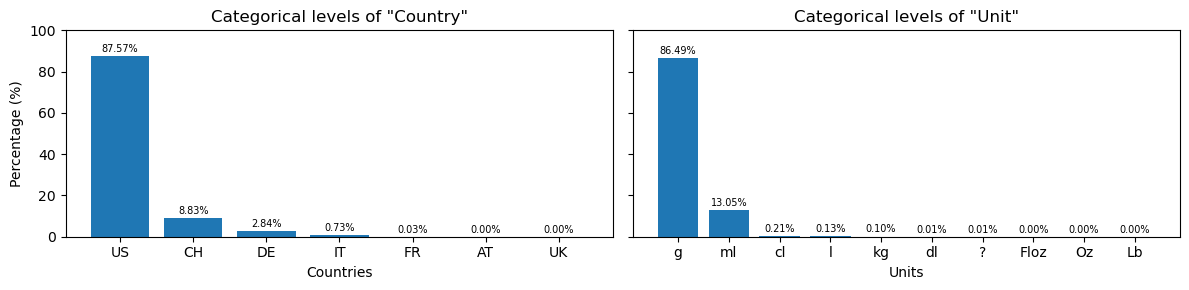

In [67]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 3))

for ax, cat in zip(axes, [country_levels, unit_levels]):
    bars = ax.bar(cat.index, cat.values * 100)

    # Add percentage labels above each bar
    for bar in bars:
        height = bar.get_height()
        width = bar.get_width()
        ax.text(
            bar.get_x() + width / 2,  # centering the label
            height + 1,
            f"{height:.2f}%",
            ha="center",
            va="bottom",
            fontsize=7,
        )

    ax.set_yticks([0, 20, 40, 60, 80, 100])


axes[0].set_title('Categorical levels of "Country"')
axes[0].set_ylabel("Percentage (%)")
axes[0].set_xlabel("Countries")
axes[1].set_title('Categorical levels of "Unit"')
axes[1].set_xlabel("Units")

plt.tight_layout()
plt.show()

## C.2 Descriptive statistics and informative plots for numerical variables

When it comes to identifying the numerical columns, I already know that they will mostly belong to the `_per_hundred` category, considering that `_unit` columns are categorical and that `_per_portion` columns have been removed due to excessive missing values. Still, I wanted to check whether there were additional relevant numerical columns in `other_cols`.

*alcohol_by_volume*,*portion_quantity* and *quantity* are exactly this kind of column, while *id*, in spite of being numerical, is not really prone to being used for statistics, as it consist essentially in a label.

In [68]:
df[other_cols].head(3)

alcohol_by_volume        barcode country                created_at    id  \
0                0.0  8001772000030      CH  2016-06-01T11:42:22.908Z  1000   
1                0.0  7610809001066      CH  2016-06-01T11:42:25.111Z  1001   
2                0.0  8002530159021      CH  2016-06-01T11:42:25.900Z  1002   

                                      ingredients_en  portion_quantity  \
0  Superior quality durum wheat Pasta\r\n\r\nIngr...              50.0   
1               Bio Milk (Switzerland), kitchen salt              75.0   
2                               100%  coffee Arabica               0.0   

            product_name_de                             product_name_en  \
0           Bio Spaghetti                                Bio Spaghetti    
1     Naturaplan Mozzarella                       Naturaplan Mozzarella   
2  Caffè Mauro - Bio Kaffe   Caffè Mauro - Roasted organic coffee blend   

           product_name_fr  quantity unit                updated_at  
0            Spaghetti Bio     500.0    g  2019-10-30T13:46:32.651Z  
1    Naturaplan Mozzarella     150.0    g  2019-10-30T13:47:12.174Z  
2  Caffè Mauro - café bio     1000.0    g  2019-10-30T13:48:12.635Z

The easiest way to show some preliminary statistics about the numerical columns consists certainly in leveraging `describe()`, which already provides me with the *min, max, mean* statistics I am looking for. As the max value seemed to far off in comparison with the mean, I chose also to include the median (50%) and the third quartile (75%). As suspected, it turns out that multiple numerical variables are extremely right-skewed, as the mean in several cases is far superior than the third quartile value.

In [69]:
numerical_cols = df.describe().T[["min", "max", "mean", "50%", "75%"]]
numerical_cols

min        max  \
alcohol_by_volume                                  0.0      57.90   
calcium_per_hundred                                0.0  684000.00   
carbohydrates_per_hundred                          0.0    6400.00   
cholesterol_per_hundred                            0.0  250000.00   
energy_kcal_per_hundred                            0.0   39600.00   
energy_per_hundred                                 0.0  165686.40   
fat_per_hundred                                    0.0    3200.00   
fatty_acids_total_saturated_per_hundred            0.0    1000.00   
fatty_acids_total_trans_per_hundred                0.0     615.38   
fiber_per_hundred                                  0.0    1730.00   
id                                               971.0  376943.00   
iron_per_hundred                                   0.0  769230.77   
monounsaturated_fatty_acids_per_hundred            0.0     200.00   
polyunsaturated_fatty_acids_per_hundred            0.0     100.00   
portion_quantity                                   0.0    3000.00   
potassium_k_per_hundred                            0.0  925000.00   
protein_per_hundred                                0.0    5747.00   
quantity                                           0.0  230000.00   
salt_per_hundred                                   0.0      99.80   
saturated_fat_per_hundred                          0.0     100.00   
sodium_per_hundred                                 0.0   25833.33   
sugars_added_per_hundred                           0.0    1100.00   
sugars_per_hundred                                 0.0    5800.00   
vitamin_a_iu_per_hundred                           0.0  333333.00   
vitamin_b1_thiamin_per_hundred                     0.0    1111.00   
vitamin_b2_riboflavin_per_hundred                  0.0   20000.00   
vitamin_b3_niacin_per_hundred                      0.0    6785.71   
vitamin_c_ascorbic_acid_per_hundred                0.0  210000.00   
vitamin_d_d2_d3_international_units_per_hundred    0.0    5000.00   

                                                          mean        50%  \
alcohol_by_volume                                     0.027911       0.00   
calcium_per_hundred                                 116.647405      36.00   
carbohydrates_per_hundred                            34.005231      23.53   
cholesterol_per_hundred                              58.981358       0.00   
energy_kcal_per_hundred                             272.484231     267.00   
energy_per_hundred                                 1139.512786    1117.13   
fat_per_hundred                                      12.705385       5.45   
fatty_acids_total_saturated_per_hundred               4.943331       2.00   
fatty_acids_total_trans_per_hundred                   0.034861       0.00   
fiber_per_hundred                                     2.925621       1.60   
id                                               189167.699515  189221.50   
iron_per_hundred                                      7.606562       1.00   
monounsaturated_fatty_acids_per_hundred               8.347389       3.19   
polyunsaturated_fatty_acids_per_hundred               5.365930       1.82   
portion_quantity                                      3.729814       0.00   
potassium_k_per_hundred                             553.944973     171.00   
protein_per_hundred                                   7.251008       4.50   
quantity                                             97.626803      45.00   
salt_per_hundred                                      0.985335       0.25   
saturated_fat_per_hundred                             5.904191       2.00   
sodium_per_hundred                                    1.402169       0.26   
sugars_added_per_hundred                             23.993521      16.00   
sugars_per_hundred                                   16.992009       6.45   
vitamin_a_iu_per_hundred                            494.236708       0.00   
vitamin_b1_thiamin_per_hundred                        0

Following up with the preliminary observations just mentioned, I removed *id* from the list of columns originally tagged as numerical, and then used `info()` to quickly find out the total number of numerical columns: 28.

In [70]:
numerical_cols.drop("id", inplace=True)

In [71]:
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, alcohol_by_volume to vitamin_d_d2_d3_international_units_per_hundred
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   min     28 non-null     float64
 1   max     28 non-null     float64
 2   mean    28 non-null     float64
 3   50%     28 non-null     float64
 4   75%     28 non-null     float64
dtypes: float64(5)
memory usage: 1.3+ KB


As previously stated, I had already the impression that most of the numerical variables were fairly right-skewed. The most effective way for me to generate an informative plot for each of the numerical variables, wanting to further inspect this aspect and also taking into account a limited computational power, in my opinion, is to leverage horizontal box plots.

I considered box plots being more effective than histograms as I didn't have to find anymore the perfect trade-off between an amount of bins great enough for adequately representing the distribution of samples, but small enough to use efficiently computational power: with a fairly simple horizontal chart, box plots already highlight the interquartile range and the outliers in one shot.

And I have to say, they pointed out quite a few of them for this dataset! For most variables not only the "box" (between 25% and 75%) but also the "whiskers" are compressed to just one line, leaving the rest of the chart to an army of outliers. There's definitely a lot of clean-up waiting for me in the next sub-tasks.

When it comes to the technical part of generating these subplots, I relied upon the Seaborn's boxplot for simplicity, looping over flattened axes as they were quite numerous (28, as the numerical variables).

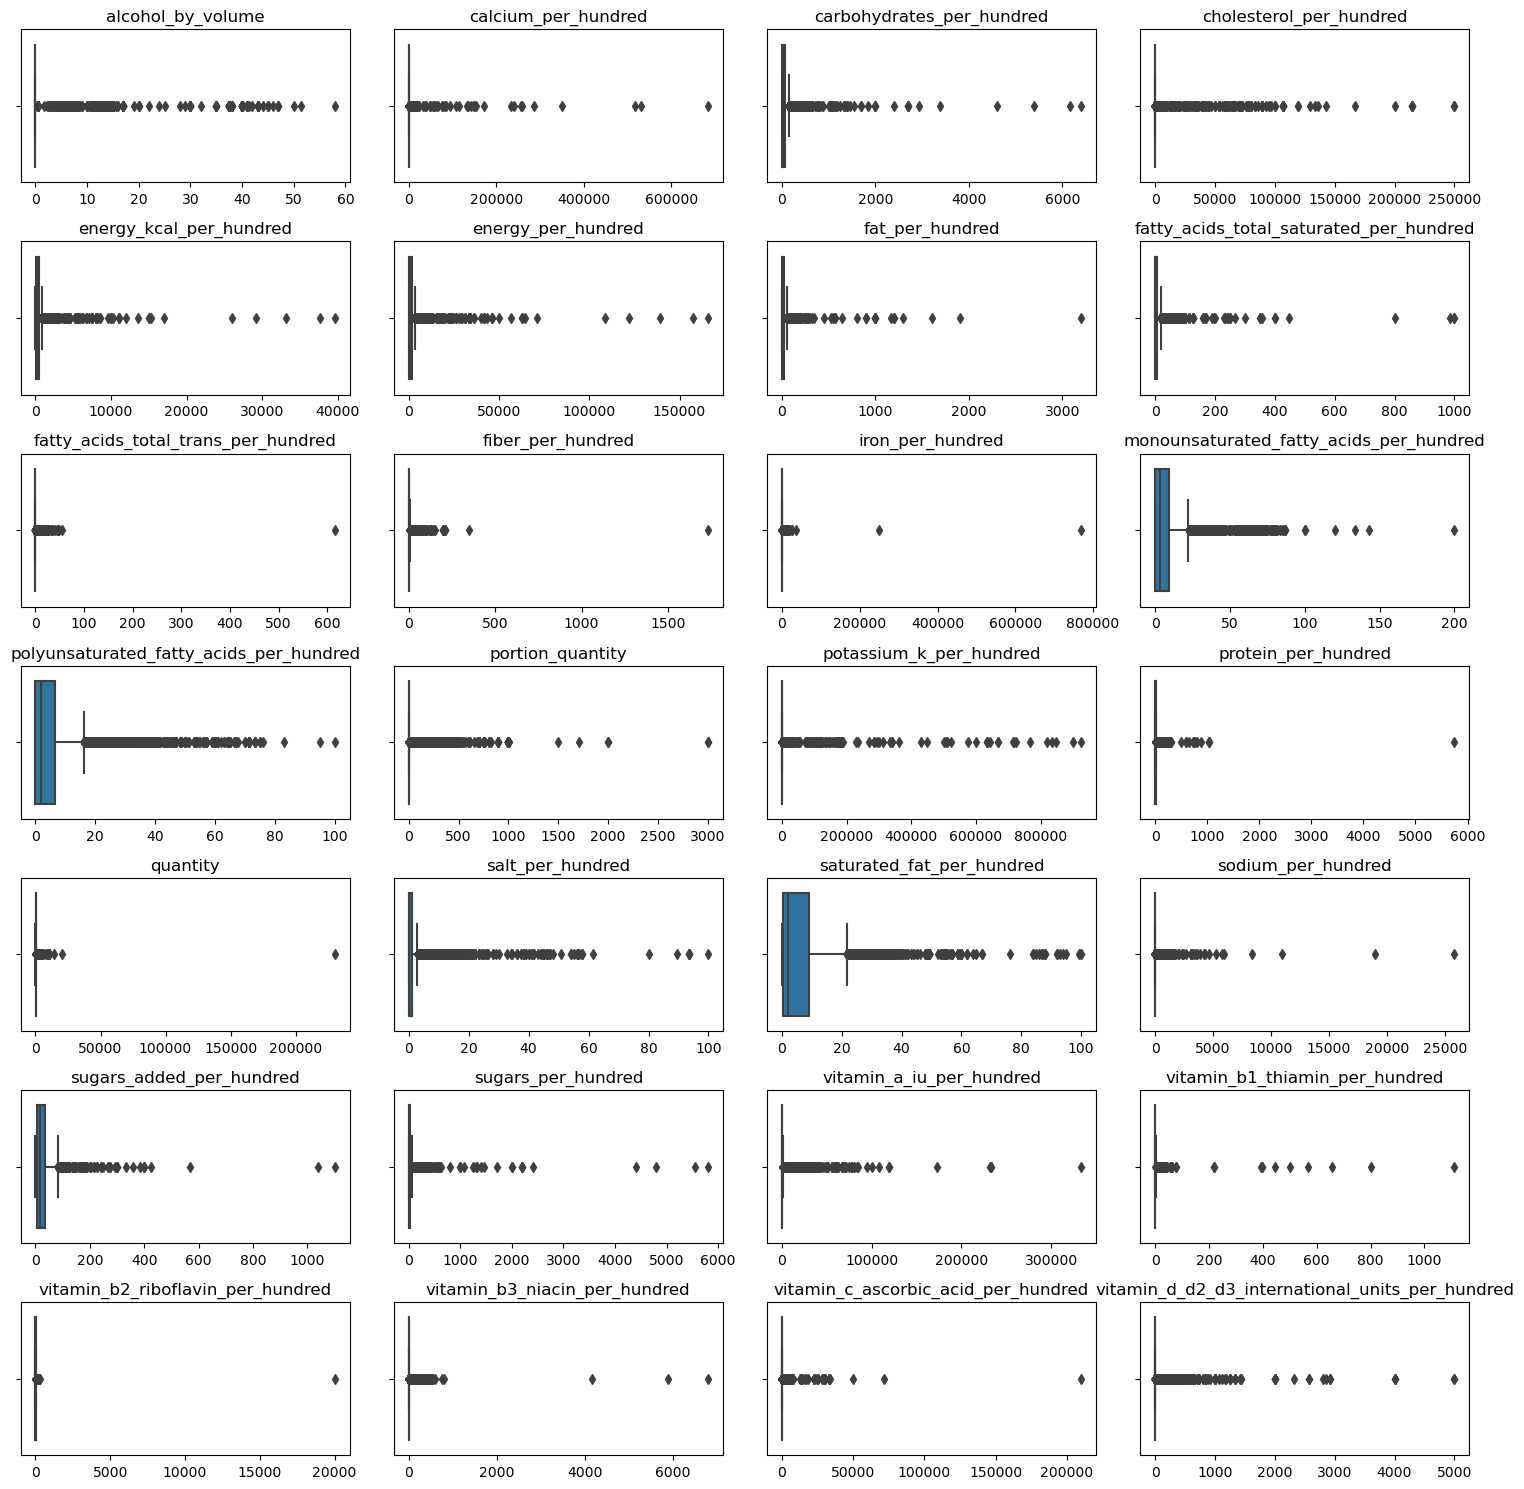

In [72]:
fig, axes = plt.subplots(nrows=7, ncols=4, sharey=True, figsize=(15, 15))

for ax, col in zip(axes.flatten(), numerical_cols.index):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")


fig.tight_layout()
plt.show()

## C.3 Errors and unrealistic values

This sub-task will primarily focus on `_per_hundred` columns, thus I am temporarily considering as numerical columns of interest only the ones that belong to such category.

In [73]:
numerical_cols_addendum = numerical_cols.loc[
    ["alcohol_by_volume", "quantity", "portion_quantity"], :
]

numerical_cols.drop(
    ["alcohol_by_volume", "quantity", "portion_quantity"], axis=0, inplace=True
)

When it comes to dealing with the outliers just identified, it is fundamental to start from defining what can be considered as "normal". In this case, I will abide by ranges of acceptable values on the basis of the unit of measurement.

In order to establish those ranges, I need first to link a `_per_hundred` column to its specific unit: this can easily be done as such information is stored in the respective `_unit` column. 

I am defining a convenient function, `findunit()`, that quickly returns the unit of measurement of a `_per_hundred` column as the value stored in the corresponding `_unit` column. It is important to remind that from a former application of `nunique()` on categorical columns I had already noticed that `_unit` columns only stored one value/unit, hence I can access such value even with `max()`.

After having defined `findunit()`, I can generate a new attribute for `numerical_cols`, *UoM*, which will store the unit of measurement of `_per_hundred` columns by mapping the indexes (the columns themselves) into the output of `findunit()`.

In [74]:
def findunit(col_per_hundred):
    col_unit = col_per_hundred.replace("_per_hundred", "_unit")
    return df[col_unit].max()

In [75]:
numerical_cols["UoM"] = numerical_cols.index.map(findunit)

numerical_cols

min        max         mean  \
calcium_per_hundred                              0.0  684000.00   116.647405   
carbohydrates_per_hundred                        0.0    6400.00    34.005231   
cholesterol_per_hundred                          0.0  250000.00    58.981358   
energy_kcal_per_hundred                          0.0   39600.00   272.484231   
energy_per_hundred                               0.0  165686.40  1139.512786   
fat_per_hundred                                  0.0    3200.00    12.705385   
fatty_acids_total_saturated_per_hundred          0.0    1000.00     4.943331   
fatty_acids_total_trans_per_hundred              0.0     615.38     0.034861   
fiber_per_hundred                                0.0    1730.00     2.925621   
iron_per_hundred                                 0.0  769230.77     7.606562   
monounsaturated_fatty_acids_per_hundred          0.0     200.00     8.347389   
polyunsaturated_fatty_acids_per_hundred          0.0     100.00     5.365930   
potassium_k_per_hundred                          0.0  925000.00   553.944973   
protein_per_hundred                              0.0    5747.00     7.251008   
salt_per_hundred                                 0.0      99.80     0.985335   
saturated_fat_per_hundred                        0.0     100.00     5.904191   
sodium_per_hundred                               0.0   25833.33     1.402169   
sugars_added_per_hundred                         0.0    1100.00    23.993521   
sugars_per_hundred                               0.0    5800.00    16.992009   
vitamin_a_iu_per_hundred                         0.0  333333.00   494.236708   
vitamin_b1_thiamin_per_hundred                   0.0    1111.00     0.925326   
vitamin_b2_riboflavin_per_hundred                0.0   20000.00     1.680103   
vitamin_b3_niacin_per_hundred                    0.0    6785.71     9.846486   
vitamin_c_ascorbic_acid_per_hundred              0.0  210000.00    15.704688   
vitamin_d_d2_d3_international_units_per_hundred  0.0    5000.00    14.186515   

                                                     50%      75%   UoM  
calcium_per_hundred                                36.00   102.00    mg  
carbohydrates_per_hundred                          23.53    60.00     g  
cholesterol_per_hundred                             0.00    25.00    mg  
energy_kcal_per_hundred                           267.00   400.00  kCal  
energy_per_hundred                               1117.13  1673.60    kJ  
fat_per_hundred                                     5.45    20.00     g  
fatty_acids_total_saturated_per_hundred             2.00     7.14     g  
fatty_acids_total_trans_per_hundred                 0.00     0.00     g  
fiber_per_hundred                                   1.60     3.60     g  
iron_per_hundred                                    1.00     2.40    mg  
monounsaturated_fatty_acids_per_hundred             3.19     8.93     g  
polyunsaturated_fatty_acids_per_hundred             1.82     6.45     g  
potassium_k_per_hundred                           171.00   304.00    mg  
protein_per_hundred                                 4.50    10.00     g  
salt_per_hundred                                    0.25     1.20     g  
saturated_fat_per_hundred                           2.00     9.00     g  
sodium_per_hundred                                  0.26     0.57     g  
sugars_added_per_hundred                           16.00    36.60     g  
sugars_per_hundred                                  6.45    25.14     g  
vitamin_a_iu_per_hundred                            0.00   352.00    IU  
vitamin_b1_thiamin_per_hundred                      0.00     1.00    mg  
vitamin_b2_riboflavin_per_hundred                   0.33     0.59    mg  
vitamin_b3_niacin_per_hundred                       4.88     8.33    mg  
vitamin_c_ascorbic_acid_per_hundred                 0.00     3.90    mg  
vitamin_d_d2_d3_international_units_per_hundred     0.00     0.00    IU

A final touch is necessary to distinguish the *international unit* related to vitamin a to the one related to vitamin d, as they will correspond to different acceptable ranges. 

After that, I am defining another function, `bounds()` that links a `_per_hundred` column to their specific acceptable range, out of which only unrealistic values are found, which, as such, can be removed from the analysis.

It is important to notice that, with the intent to save computational power, I am not defining the entire range itself with either `range()` or `np.arange()`, as I actually only need the lower and upper limit/bound. Those limits are accessed leveraging an ad-hoc dictionary.

In [76]:
numerical_cols.loc["vitamin_a_iu_per_hundred", "UoM"] = "IUa"
numerical_cols.loc["vitamin_d_d2_d3_international_units_per_hundred", "UoM"] = "IUd"

In [77]:
def bounds(col_per_hundred):
    unit = numerical_cols.loc[col_per_hundred, "UoM"]
    ranges = {
        "g": (0, 100),
        "mg": (0, 10 ** 5),
        "kJ": (0, 3700),
        "kCal": (0, 885),
        "IUa": (0, 3.3 * (10 ** 8)),
        "IUd": (0, 4 * (10 ** 9)),
    }

    return ranges[unit]

I can now generate a boolean mask for `df`, named `range_filter`, leveraging `bounds()` and looping over each column to apply a lambda function which sets as True the outliers.

*Note: `copy()` was used to ensure that each of the subsequent changes to `range_filter` were not going to affect `df` simultaneously*

In [78]:
range_filter = df[numerical_cols.index].copy()

for col in range_filter.columns:
    min_val, max_val = bounds(col)
    range_filter[col] = range_filter[col].apply(lambda x: (x < min_val) | (x > max_val))

range_filter

calcium_per_hundred  carbohydrates_per_hundred  \
0                     False                      False   
1                     False                      False   
2                     False                      False   
3                     False                      False   
4                     False                      False   
...                     ...                        ...   
374879                False                      False   
374880                False                      False   
374881                False                      False   
374882                False                      False   
374883                False                      False   

        cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
0                         False                    False               False   
1                         False                    False               False   
2                         False                    False               False   
3                         False                    False               False   
4                         False                    False               False   
...                         ...                      ...                 ...   
374879                    False                    False               False   
374880                    False                    False               False   
374881                    False                    False               False   
374882                    False                    False               False   
374883                    False                    False               False   

        fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
0                 False                                    False   
1                 False                                    False   
2                 False                                    False   
3                 False                                    False   
4                 False                                    False   
...                 ...                                      ...   
374879            False                                    False   
374880            False                                    False   
374881            False                                    False   
374882            False                                    False   
374883            False                                    False   

        fatty_acids_total_trans_per_hundred  fiber_per_hundred  \
0                                     False              False   
1                                     False              False   
2                                     False              False   
3                                     False              False   
4                                     False              False   
...                                     ...                ...   
374879                                False              False   
374880                                False              False   
374881                                False              False   
374882                                False              False   
374883                                False              False   

        iron_per_hundred  ...  saturated_fat_per_hundred  sodium_per_hundred  \
0                  False  ...                      False               False   
1                  False  ...                      False               False   
2                  False  ...                      False               False   
3                  False  ...                      False               False   
4                  False  ...                      False               False   
...                  ...  ...                        ...                 ...   
374879             False  ...                      False               False   
374880             False  ...                      False                True   
374881             F

I am now leveraging `any(axis=1)` to spot all the rows which contain at least one outlier. These are the rows/samples which then I am going to drop from `df` with the intent to improve the quality of statistics related to the `_per_hundred` columns.

In [79]:
range_filter_any = range_filter.any(axis=1)
range_filter_any

0         False
1         False
2         False
3         False
4         False
          ...  
374879    False
374880     True
374881    False
374882    False
374883    False
Length: 374884, dtype: bool

In [80]:
outliers = df.loc[range_filter_any, :]
outliers

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
114                   0.0  3490390201014                  NaN           mg   
338                   0.0  7617300500005                  NaN           mg   
341                   0.0  7617300720809                  NaN           mg   
472                   0.0  3178050027388                  NaN           mg   
474                   0.0  3178050027371                  NaN           mg   
...                   ...            ...                  ...          ...   
373767                0.0  2158393005053                  NaN           mg   
373815                0.0  4031192108218                  NaN           mg   
374103                0.0       42219736                  NaN           mg   
374345                0.0  7613269403289                  NaN           mg   
374880                0.0  7640147023628                850.0           mg   

        carbohydrates_per_hundred carbohydrates_unit  cholesterol_per_hundred  \
114                           0.0                  g                      NaN   
338                           0.0                  g                      NaN   
341                           0.1                  g                      NaN   
472                           NaN                  g                      NaN   
474                           NaN                  g                      NaN   
...                           ...                ...                      ...   
373767                        0.1                  g                      NaN   
373815                        0.0                  g                      NaN   
374103                       23.9                  g                      NaN   
374345                       43.0                  g                      NaN   
374880                       48.6                  g                      NaN   

       cholesterol_unit copper_cu_unit country  ...  \
114                  mg             mg      CH  ...   
338                  mg             mg      CH  ...   
341                  mg             mg      CH  ...   
472                  mg             mg      CH  ...   
474                  mg             mg      CH  ...   
...                 ...            ...     ...  ...   
373767               mg             mg      CH  ...   
373815               mg             mg      CH  ...   
374103               mg             mg      CH  ...   
374345               mg             mg      CH  ...   
374880               mg             mg      CH  ...   

       vitamin_b2_riboflavin_unit  vitamin_b3_niacin_per_hundred  \
114                            mg                            NaN   
338                            mg                            NaN   
341                            mg                            NaN   
472                            mg                            NaN   
474                            mg                            NaN   
...                           ...                            ...   
373767                         mg                            NaN   
373815                         mg                            NaN   
374103                         mg                            NaN   
374345                         mg                            NaN   
374880                         mg                          120.0   

       vitamin_b3_niacin_unit  vitamin_b5_panthothenic_acid_unit  \
114                        mg                                 mg   
338                        mg                                 mg   
341                        mg                                 mg   
472                        mg                                 mg   
474                        mg                                 mg   
...                       ...                                ...   
373767                     mg                                 mg   
373815                     mg                                 mg   
374103  

In [81]:
df.drop(outliers.index, axis=0, inplace=True)

In [82]:
df

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
0                     0.0  8001772000030                  NaN           mg   
1                     0.0  7610809001066                  NaN           mg   
2                     0.0  8002530159021                  NaN           mg   
3                     0.0  3033715065788                  NaN           mg   
4                     0.0  7610848492740                  NaN           mg   
...                   ...            ...                  ...          ...   
374878                0.0  7640158181492                  NaN           mg   
374879                0.0  7640145040283                  NaN           mg   
374881                0.0  3046920021593                  NaN           mg   
374882                0.0  4044889004335                  NaN           mg   
374883                0.0  7613379866622                  NaN           mg   

        carbohydrates_per_hundred carbohydrates_unit  cholesterol_per_hundred  \
0                           75.00                  g                      NaN   
1                            1.50                  g                      NaN   
2                           52.68                  g                      NaN   
3                           70.40                  g                      NaN   
4                           37.00                  g                      NaN   
...                           ...                ...                      ...   
374878                      17.00                  g                      NaN   
374879                        NaN                  g                      NaN   
374881                      22.00                  g                      NaN   
374882                        NaN                  g                      NaN   
374883                        NaN                  g                      NaN   

       cholesterol_unit copper_cu_unit country  ...  \
0                    mg             mg      CH  ...   
1                    mg             mg      CH  ...   
2                    mg             mg      CH  ...   
3                    mg             mg      CH  ...   
4                    mg             mg      CH  ...   
...                 ...            ...     ...  ...   
374878               mg             mg      CH  ...   
374879               mg             mg      CH  ...   
374881               mg             mg      CH  ...   
374882               mg             mg      CH  ...   
374883               mg             mg      CH  ...   

       vitamin_b2_riboflavin_unit  vitamin_b3_niacin_per_hundred  \
0                              mg                            NaN   
1                              mg                            NaN   
2                              mg                            NaN   
3                              mg                            NaN   
4                              mg                            NaN   
...                           ...                            ...   
374878                         mg                            NaN   
374879                         mg                            NaN   
374881                         mg                            NaN   
374882                         mg                            NaN   
374883                         mg                            NaN   

       vitamin_b3_niacin_unit  vitamin_b5_panthothenic_acid_unit  \
0                          mg                                 mg   
1                          mg                                 mg   
2                          mg                                 mg   
3                          mg                                 mg   
4                          mg                                 mg   
...                       ...                                ...   
374878                     mg                                 mg   
374879                     mg                                 mg   
374881  

When plotting again the original 28 numerical variables, after having dropped a significant amount of outliers, the beneficial effect is evident as much more reasonable ranges are being plotted. Most of the variables remain skewed to the right, but at the same time in several cases the remaining outliers seem to be approachable with a visual inspection.

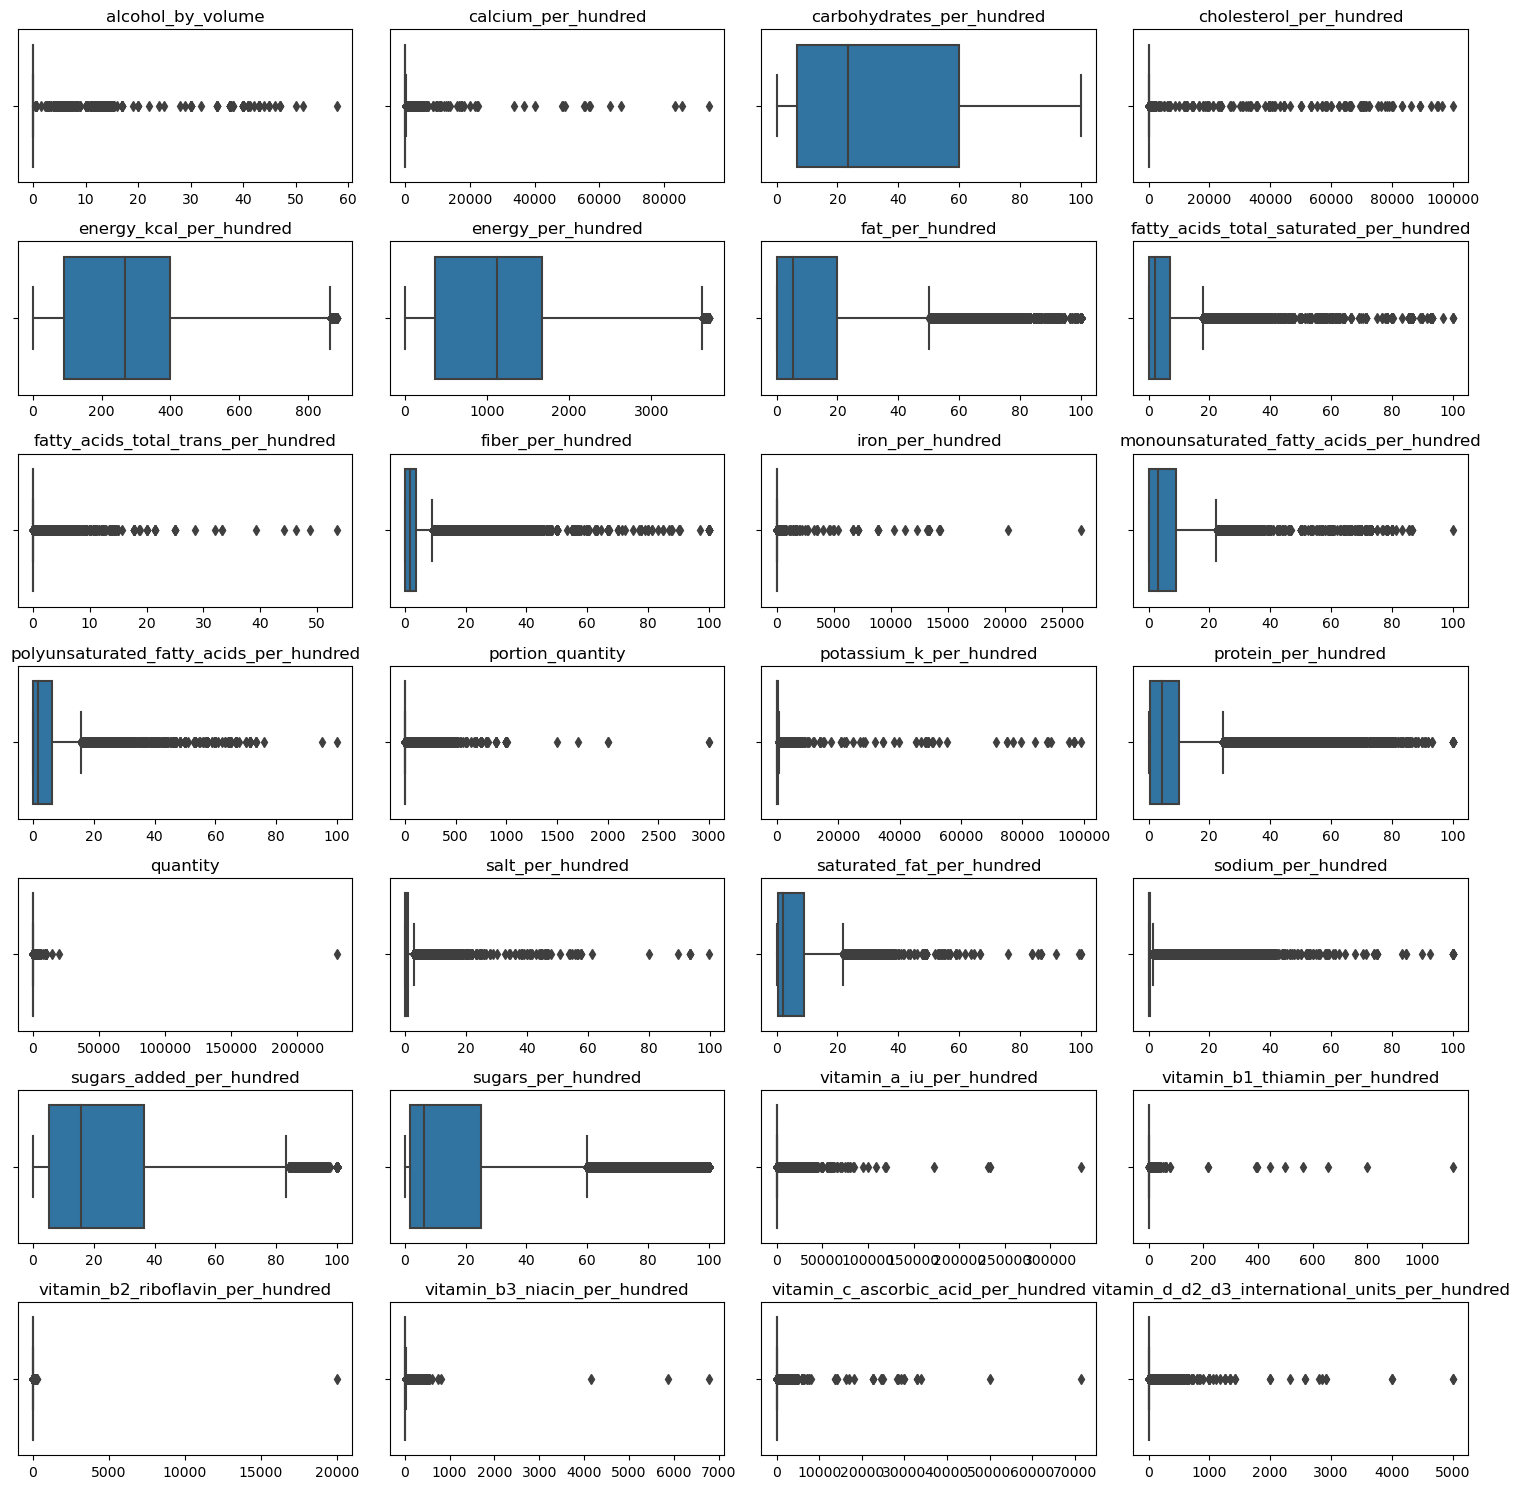

In [83]:
fig, axes = plt.subplots(nrows=7, ncols=4, sharey=True, figsize=(15, 15))

for ax, col in zip(axes.flatten(), (numerical_cols + numerical_cols_addendum).index):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")


fig.tight_layout()
plt.show()

In preparation of the upcoming sub-tasks, I am redefining again `numerical_cols` on the basis of the cleaned-up `df`, this time including the standard deviation among the columns as I believe it will offer valuable insights on the skewedness of the underlying plots.

I am still keeping separated the three columns belonging to `numerical_cols_addendum`, which have been left untouched by the changes hereby performed.

The newly generated statistics, when compared to the previous ones, confirm a much more streamlined data distribution, even though outliers are still present.

In [84]:
numerical_cols = df.describe().T[["min", "max", "mean", "std", "50%", "75%"]]

numerical_cols.drop(
    ["id", "alcohol_by_volume", "quantity", "portion_quantity"], axis=0, inplace=True
)

numerical_cols

min        max         mean  \
calcium_per_hundred                              0.0   93750.00    97.374106   
carbohydrates_per_hundred                        0.0     100.00    33.328116   
cholesterol_per_hundred                          0.0  100000.00    42.629489   
energy_kcal_per_hundred                          0.0     885.00   267.863864   
energy_per_hundred                               0.0    3700.00  1120.574769   
fat_per_hundred                                  0.0     100.00    12.461857   
fatty_acids_total_saturated_per_hundred          0.0     100.00     4.847188   
fatty_acids_total_trans_per_hundred              0.0      53.57     0.031786   
fiber_per_hundred                                0.0     100.00     2.883091   
iron_per_hundred                                 0.0   26666.67     3.325119   
monounsaturated_fatty_acids_per_hundred          0.0     100.00     8.128797   
polyunsaturated_fatty_acids_per_hundred          0.0     100.00     5.206275   
potassium_k_per_hundred                          0.0   99000.00   282.181481   
protein_per_hundred                              0.0     100.00     7.129861   
salt_per_hundred                                 0.0      99.80     0.986416   
saturated_fat_per_hundred                        0.0     100.00     5.830030   
sodium_per_hundred                               0.0     100.00     0.701309   
sugars_added_per_hundred                         0.0     100.00    23.526601   
sugars_per_hundred                               0.0     100.00    16.585112   
vitamin_a_iu_per_hundred                         0.0  333333.00   492.010768   
vitamin_b1_thiamin_per_hundred                   0.0    1111.00     0.922061   
vitamin_b2_riboflavin_per_hundred                0.0   20000.00     1.676363   
vitamin_b3_niacin_per_hundred                    0.0    6785.71     9.794059   
vitamin_c_ascorbic_acid_per_hundred              0.0   71428.60    14.440847   
vitamin_d_d2_d3_international_units_per_hundred  0.0    5000.00    13.999058   

                                                         std      50%      75%  
calcium_per_hundred                               520.437525    36.00   102.00  
carbohydrates_per_hundred                          29.184389    23.53    60.00  
cholesterol_per_hundred                          1177.860192     0.00    24.00  
energy_kcal_per_hundred                           187.581574   267.00   400.00  
energy_per_hundred                                784.552929  1117.13  1673.60  
fat_per_hundred                                    16.641448     5.36    20.00  
fatty_acids_total_saturated_per_hundred             7.112204     1.98     7.14  
fatty_acids_total_trans_per_hundred                 0.475581     0.00     0.00  
fiber_per_hundred                                   4.572351     1.60     3.60  
iron_per_hundred                                  126.443141     1.00     2.40  
monounsaturated_fatty_acids_per_hundred            14.068759     3.12     8.93  
polyunsaturated_fatty_acids_per_hundred             9.107849     1.79     6.25  
potassium_k_per_hundred                          1293.443465   170.00   301.00  
protein_per_hundred                                 8.540740     4.55    10.00  
salt_per_hundred                                    3.188472     0.25     1.20  
saturated_fat_per_hundred                           8.051071     2.00     9.00  
sodium_per_hundred                                  2.936107     0.26     0.57  
sugars_added_per_hundred                           23.001221    15.80    36.40  
sugars_per_hundred                                 21.413748     6.45    25.00  
vitamin_a_iu_per_hundred                         2431.703576     0.00   352.00  
vitamin_b1_thiamin_per_hundred                     13.500617     0.00     1.00  
vitamin_b2_riboflavin_per_hundred                 142.755329     0.33     0.57  
vitamin_b3_niacin_per_hundred                      73.105981     4.88     8.24  
vitamin_c_ascorbic_acid_

## C.4 Interdependencies and inconsistencies between columns

### C.4.1 Combined amount of macronutrients

In the previous sub-task it has been stated that the amount of each macronutrient (fat, protein, carbohydrates and fiber) must not exceed 100g, otherwise it would be unrealistic for a `_per_hundred` with *g* as unit.

At the same time, reasonably, the sum of these macronutrient content per 100g cannot exceed 100g as well. Let's check if there are samples that can be considered unrealistic because of this condition. The intent here is to generate another boolean filter, `combined_macro_filter`, which highlights specifically these unrealistic values.

In [85]:
combined_macro_filter = (
    df[
        [
            "carbohydrates_per_hundred",
            "fat_per_hundred",
            "fiber_per_hundred",
            "protein_per_hundred",
        ]
    ].sum(axis=1)
    > 100
)

combined_macro_filter

0         False
1         False
2         False
3         False
4         False
          ...  
374878    False
374879    False
374881    False
374882    False
374883    False
Length: 372842, dtype: bool

After having defined the boolean filter, I can check that the total number of samples with an unrealistic combined amount of macronutrients, which turns out to be 28075. I can also further check one example, for instance sample number 321.

In [86]:
combined_macro_filter[combined_macro_filter == True]

321       True
1022      True
1061      True
1098      True
1230      True
          ... 
373325    True
373329    True
373332    True
373844    True
374842    True
Length: 28075, dtype: bool

In [87]:
df.loc[
    321,
    [
        "carbohydrates_per_hundred",
        "fat_per_hundred",
        "fiber_per_hundred",
        "protein_per_hundred",
    ],
]

carbohydrates_per_hundred    71.0
fat_per_hundred              26.0
fiber_per_hundred             1.5
protein_per_hundred           2.5
Name: 321, dtype: object

After filtering out the indexes just identified with `combined_macro_filter`, I can verify that there are no more samples with a combined amount of macronutrients over 100g, and that the shape of `df` has changed as expected.

In [88]:
df = df[~combined_macro_filter]

In [89]:
(
    df[
        [
            "carbohydrates_per_hundred",
            "fat_per_hundred",
            "fiber_per_hundred",
            "protein_per_hundred",
        ]
    ].sum(axis=1)
    > 100
).sum()

0

In [90]:
df.shape

(344767, 77)

### C.4.2 Energy in kJ vs kcal

Keeping in mind that 1 cal = 4.186 J, and that hence the same proportion sussists between kcal and kJ, I expect to find the same relationship between the columns *energy_kcal_per_hundred* and *energy_per_hundred*.

In [91]:
kcal_in_kJ = 4.186

In [92]:
energy_ratios = df["energy_per_hundred"] / df["energy_kcal_per_hundred"]
energy_ratios

0         4.178273
1         4.173554
2         4.179385
3         4.176617
4         4.179357
            ...   
374878    4.165049
374879         NaN
374881    4.140411
374882         NaN
374883         NaN
Length: 344767, dtype: float64

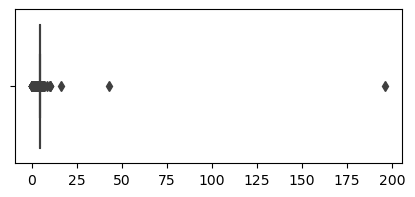

In [93]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=energy_ratios)
plt.show()

What I find out instead, as shown by the boxplot above, is a large presence of exaggerated values of the energy ratios (defined as energy in kJ divided by energy in kcal) which in principle should approximately converge to the theoretical value of 4.186.

Hence, I start the process of dealing with unrealistic values first and foremost from the most obvious ones, which have a ratio over 35.

In [94]:
energy_ratios[energy_ratios > 35]

9755        inf
9757        inf
9861        inf
20092       inf
24127       inf
37750      43.0
39086       inf
40004       inf
40801       inf
40872       inf
44045     196.0
44913       inf
373364      inf
dtype: float64

It is important to notice that instead of dropping the affected samples with

```python
energy_ratios = energy_ratios.drop([37750, 44045])
df = df.drop([37750, 44045], axis=0)
```
I prefer replacing the values of the relevant columns with NaN. This choice is motivated by the fact that I wouldn't consider fair dropping entire samples because of an unpractical value in only 2 out of 77 columns, samples which otherwise would be considered perfectly valuable for this data analysis.

By substituting with NaN, I ensure that they do not negatively impact any assessment on kcals and kJs (boxplots and histplots will ignore by default NaN values), at the same time reducing at the minimum data loss.

In [95]:
df = df.copy()

energy_ratios[[37750, 44045]] = np.nan
df.loc[[37750, 44045], ["energy_kcal_per_hundred", "energy_per_hundred"]] = np.nan

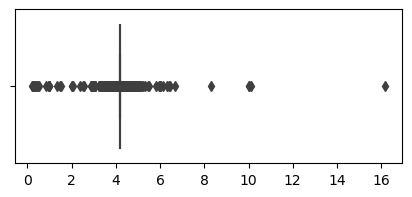

In [96]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=energy_ratios)
plt.show()

There seem to be other unrealistic ratios with values above 5. I hence apply the same logic as before, substituting these values with NaN, both in the `energy_ratios` series and in `df`.

In [97]:
energy_ratios[energy_ratios > 5]

1581       5.040462
6117       5.445860
6284       5.145963
7114       5.333333
8953       5.160000
9755            inf
9757            inf
9760      10.000000
9761       6.666667
9777       6.000000
9861            inf
12674      6.000000
16848      6.000000
17977      5.110132
18071      5.942623
20092           inf
23566      6.389333
23874      6.123348
24030      5.113438
24110      5.008621
24127           inf
25541      6.451948
29422      5.838710
37825      6.297778
38944     10.000000
38984      8.297297
39086           inf
40004           inf
40023     10.115385
40603     16.159696
40801           inf
40872           inf
42394      6.000000
43639      6.000000
44466      5.251381
44715      5.053571
44913           inf
373364          inf
374297     5.500000
374327     5.221239
dtype: float64

In [98]:
df = df.copy()

df.loc[
    energy_ratios[energy_ratios > 5].index,
    ["energy_kcal_per_hundred", "energy_per_hundred"],
] = np.nan
energy_ratios[energy_ratios > 5] = np.nan

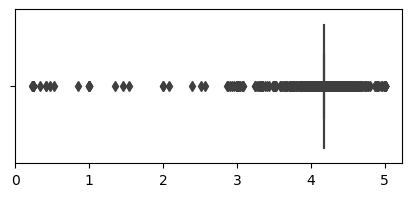

In [99]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=energy_ratios)
plt.show()

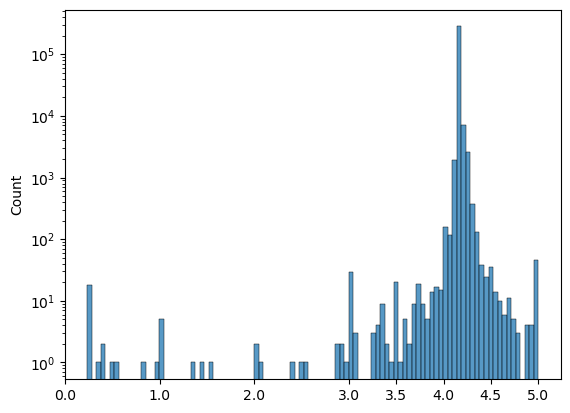

In [100]:
sns.histplot(data=energy_ratios, bins=100)
plt.xticks([0, 1, 2, 3, 3.5, 4, 4.5, 5])
plt.yscale("log")
plt.show()

Now when it comes to the remaining values, looking at the result of the histplot with a logarithmic scale, I deemed as a good trade-off between data accuracy and completeness the choice of an ideal ratio interval between 4 and 4.5, in which an energy ratio can be considered acceptable as being close to the theoretical value.

Luckily it is also the interval in which most of the samples are concentrated.

In [101]:
energy_ratios[(energy_ratios > 4.5) | (energy_ratios < 4)]

328       3.267303
371       3.250000
379       3.795455
563       4.603239
1244      3.636364
            ...   
374213    2.073996
374275    0.239437
374317    3.500000
374506    0.412955
374812    5.000000
Length: 316, dtype: float64

Before applying the same procedure as before to the entries outside of the acceptable interval, I explored another possibility with the intent to preserve as much information as possible: another subset of ratios could be deemed valid if their inverse is found in the acceptable interval.

This fact would signal a potential data entry error in which kJ and kcal values had been mistakenly swapped, an error which I could easily revert.

In [102]:
energy_to_swap = energy_ratios[((1 / 4.5) < energy_ratios) & (energy_ratios < (1 / 4))]
energy_to_swap

7035      0.239521
19558     0.242105
21715     0.233333
25306     0.237548
37347     0.237805
37678     0.240079
39262     0.236994
40319     0.236515
41011     0.235294
41492     0.238462
42507     0.237500
43363     0.237288
45035     0.236295
45036     0.237569
45040     0.240240
45043     0.241379
373743    0.238806
374275    0.239437
dtype: float64

In [103]:
df.loc[7035, ["energy_per_hundred", "energy_kcal_per_hundred", "product_name_en"]]

energy_per_hundred                                      80.0
energy_kcal_per_hundred                                334.0
product_name_en            Le Rustique Camembert Soft Cheese
Name: 7035, dtype: object

In [104]:
df.loc[21715, ["energy_per_hundred", "energy_kcal_per_hundred", "product_name_en"]]

energy_per_hundred                                 7.0
energy_kcal_per_hundred                           30.0
product_name_en            Henniez - Mango Saveur Yuzu
Name: 21715, dtype: object

In [105]:
df.loc[45036, ["energy_per_hundred", "energy_kcal_per_hundred", "product_name_en"]]

energy_per_hundred                                                  129.0
energy_kcal_per_hundred                                             543.0
product_name_en            Betty Bossi - Chicken strips (paprika & honey)
Name: 45036, dtype: object

After inspecting the scenario described above with spot searches on Google relatively to a few samples, I found out my hypothesis to be valid, hence I proceeded swapping the kcal and kJ values for the specific samples gathered in the `energy_to_swap` subset of `energy_ratios`.

As usual, I ensured that the change was properly recorded both in `df` and in `energy_ratios`.

In [106]:
df.loc[
    energy_to_swap.index, ["energy_kcal_per_hundred", "energy_per_hundred"]
] = df.loc[
    energy_to_swap.index, ["energy_per_hundred", "energy_kcal_per_hundred"]
].values

In [107]:
energy_ratios[energy_to_swap.index] = energy_to_swap ** (-1)

In [108]:
energy_ratios[energy_to_swap.index]

7035      4.175000
19558     4.130435
21715     4.285714
25306     4.209677
37347     4.205128
37678     4.165289
39262     4.219512
40319     4.228070
41011     4.250000
41492     4.193548
42507     4.210526
43363     4.214286
45035     4.232000
45036     4.209302
45040     4.162500
45043     4.142857
373743    4.187500
374275    4.176471
dtype: float64

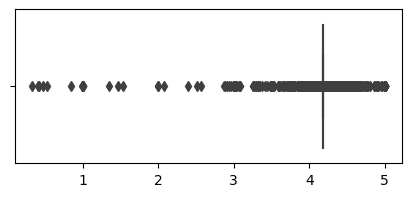

In [109]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=energy_ratios)
plt.show()

After this final adjustment, I can proceed assigning NaN values to all entries not belonging to the acceptable interval.

In [110]:
invalid_energies = energy_ratios[(energy_ratios > 4.5) | (energy_ratios < 4)]
invalid_energies

328       3.267303
371       3.250000
379       3.795455
563       4.603239
1244      3.636364
            ...   
373950    5.000000
374213    2.073996
374317    3.500000
374506    0.412955
374812    5.000000
Length: 298, dtype: float64

In [111]:
df.loc[
    invalid_energies.index,
    ["energy_kcal_per_hundred", "energy_per_hundred"],
] = np.nan
energy_ratios[invalid_energies.index] = np.nan

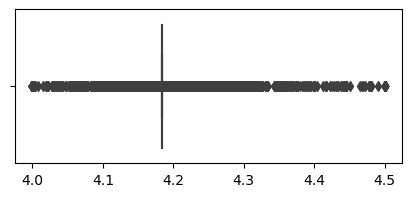

In [112]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=energy_ratios)
plt.show()

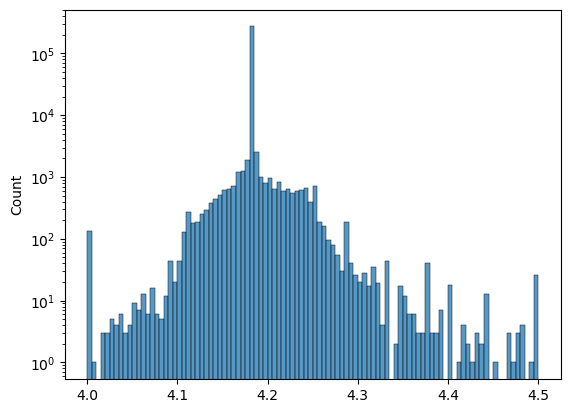

In [113]:
sns.histplot(data=energy_ratios, bins=100)
plt.yscale("log")
plt.show()

The resulting boxplot and histplot turn out to be much more coherent and realistical. In case a greater accuracy would be required for future sub-tasks I am always in the position to further shrink the acceptable interval, but for the time being I believe I have achieved a good compromise between data accuracy and completion.

Additionally, as the logarithmic scale highlights, by further shrinking the acceptable interval I am set to affect a more significant amount of samples (in the hundreds), so it is worth assessing if it is really necessary.

### C.4.3 Energy per macronutrient vs total

Each of the four macronutrients has a specific holds a specific amount of kJ per gram. I have collected these amounts in a dedicated dictionary.

In [114]:
kJ_per_g = {"fat": 37, "protein": 17, "carbohydrates": 17, "fiber": 8}

Given these amounts, it is possible to calculate the sum of the energy in kJ coming from each macronutrients leveraging the related *_per_hundred* columns. This sum is not to be expected to match exactly the value stored in *energy_per_hundred*, as only a subset of the nutrients is being considered, but the delta between the two can still lead to insightful observations.

Let's explore this path by computing `macro_energy_delta`.

In [115]:
macro_energy_delta = (
    df["fat_per_hundred"] * 37
    + (df["protein_per_hundred"] + df["carbohydrates_per_hundred"]) * 17
    + df["fiber_per_hundred"] * 8
    - df["energy_per_hundred"]
)

macro_energy_delta

0         NaN
1         4.5
2         NaN
3        -1.5
4        -5.0
         ... 
374878    NaN
374879    NaN
374881    NaN
374882    NaN
374883    NaN
Length: 344767, dtype: float64

In [116]:
df.loc[
    1,
    [
        "carbohydrates_per_hundred",
        "fat_per_hundred",
        "fiber_per_hundred",
        "protein_per_hundred",
        "energy_per_hundred",
    ],
]

carbohydrates_per_hundred       1.5
fat_per_hundred                18.0
fiber_per_hundred               0.0
protein_per_hundred            19.0
energy_per_hundred           1010.0
Name: 1, dtype: object

When plotting an histogram based on `macro_energy_delta`, obviously the theoretical ideal range is located in proximity to 0. Still, multiple important aspects stand out from this chart:

1) While negative values are not a particular concern given I am only addressing a subset of the nutrients, extreme negative values come as surprise considering that such subset corresponds to the energetic bulk of each product.

2) Positive values are not theoretically justifiable. While a positive neighbourhood of zero is in practice acceptable, there's a significant amout of samples with a delta greater than 500 to which particular attention should be paid when further computing with these columns.

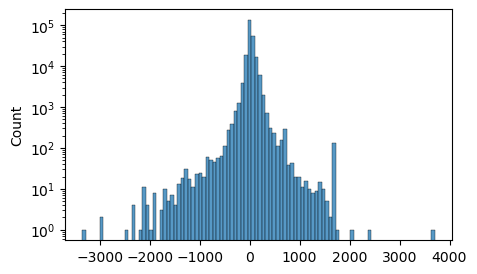

In [117]:
plt.figure(figsize=(5, 3))
sns.histplot(data=macro_energy_delta, bins=100)
plt.yscale("log")
plt.show()

Not even by excluding from the analysis the rows in which the *energy_per_hundred* value is null, where a noticeable positive delta is obvious, the situation seem to particularly improve.

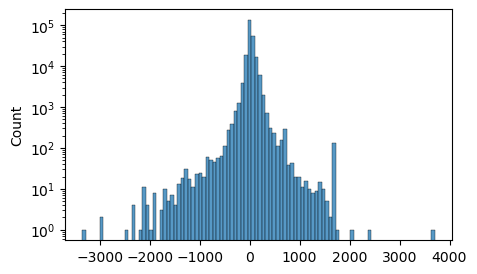

In [118]:
plt.figure(figsize=(5, 3))
sns.histplot(data=macro_energy_delta[~df["energy_per_hundred"].isnull()], bins=100)
plt.yscale("log")
plt.show()

In this case, without factoring in any other constraint or assumption, I am not in the position to establish which specific column is to be considered responsible of an extreme delta, either negative or positive. In fact, a single outlier in any of the 5 columns included in the delta calculation can generate consequently an extreme delta value.

The same picture is to be revised after further addressing the outlier of the columns involved.

## C.5 Handling outliers by visual inspection: a few examples

Despite having removed a significant amount of unrealistic values from `df`, still many of the variables keep showing extreme values on the right.
For the purpose of this subtask, I choose to deal with 4 of them, related to vitamin b2, b3, d and iron. I am referring again to  subset of the *_per_hundred* columns which had previously been assessed along with a few of *other_cols*.

Currently, the boxplots of these 4 variables clearly highlight the presence of extreme values in the tail on the right.

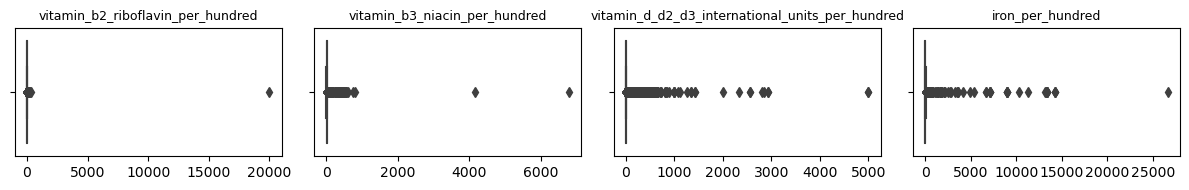

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(12, 2))

for ax, col in zip(
    axes.flatten(),
    [
        "vitamin_b2_riboflavin_per_hundred",
        "vitamin_b3_niacin_per_hundred",
        "vitamin_d_d2_d3_international_units_per_hundred",
        "iron_per_hundred",
    ],
):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col, fontdict={"fontsize": 9})
    ax.set_xlabel("")


fig.tight_layout()
plt.show()

By visual inspection, I am trying to define plausible limits after which I would consider an entry an outlier, for each of the variables, while being conscious of not altering excessively the underlying data.

In [120]:
vitamin_b2_outliers = df.loc[
    df["vitamin_b2_riboflavin_per_hundred"] > 15000, "vitamin_b2_riboflavin_per_hundred"
]

vitamin_b2_outliers

77377    20000.0
Name: vitamin_b2_riboflavin_per_hundred, dtype: float64

In [121]:
vitamin_b3_outliers = df.loc[
    df["vitamin_b3_niacin_per_hundred"] > 3000, "vitamin_b3_niacin_per_hundred"
]

vitamin_b3_outliers

224404    6785.71
323038    4146.34
Name: vitamin_b3_niacin_per_hundred, dtype: float64

In [122]:
vitamin_d_d2_d3_outliers = df.loc[
    df["vitamin_d_d2_d3_international_units_per_hundred"] > 1800,
    "vitamin_d_d2_d3_international_units_per_hundred",
]

vitamin_d_d2_d3_outliers

58268     2000.0
85603     5000.0
85608     5000.0
177853    2925.0
177859    2806.0
177862    2328.0
177863    2567.0
177865    2925.0
177867    2567.0
217381    2857.0
Name: vitamin_d_d2_d3_international_units_per_hundred, dtype: float64

In [123]:
iron_outliers = df.loc[df["iron_per_hundred"] > 15000, "iron_per_hundred"]

iron_outliers

240003    26666.67
Name: iron_per_hundred, dtype: float64

Having identified a few outliers according to a visually determined boundary, I continue to abide by the principle that dropping these rows for the sole reason of having an outlier in one of these columns would be a too abrupt approach: if I applied the same approach to all the *_per_hundred* columns, I would probably drop a significant part of the dataset.

I choose then, once again, to substitute these values with NaN, in order for them not to affect important variable statistics. Nonetheless, before doing so, I am checking if introducing further null values in these variables would be in contrast with the principles of keeping only columns with maximum 95% of missing values.

Luckily, casting NaN to these outliers would no harm to the previously established rule as their number is quite limited.

In [124]:
missing_values_df[
    [
        "vitamin_b2_riboflavin_per_hundred",
        "vitamin_b3_niacin_per_hundred",
        "vitamin_d_d2_d3_international_units_per_hundred",
        "iron_per_hundred",
    ]
]

vitamin_b2_riboflavin_per_hundred  \
Missing values                            355201   
Percentage (%)                              94.7   

               vitamin_b3_niacin_per_hundred  \
Missing values                        353767   
Percentage (%)                          94.4   

               vitamin_d_d2_d3_international_units_per_hundred  \
Missing values                                          307860   
Percentage (%)                                            82.1   

               iron_per_hundred  
Missing values           109987  
Percentage (%)             29.3

As additional check, I wanted to see which products where linked to these outliers. After a tailored research, I found out that while it is plausible that these products (or similar) contain high amounts of the specific vitamin or iron, the amount indicated is even excessive by this standard, and above the daily recommended intake for adults.

I am then reassured about the fact that removing this outlier won't do any harm to practical, plausible information that the `df` can communicate.

In [125]:
df.loc[
    vitamin_b2_outliers.index,
    ["vitamin_b2_riboflavin_per_hundred", "product_name_en"],
]

vitamin_b2_riboflavin_per_hundred  \
77377                            20000.0   

                                       product_name_en  
77377  BIMBO, PAN TOSTADO INTEGRAL TOASTED WHEAT BREAD

In [126]:
df.loc[
    vitamin_d_d2_d3_outliers.index,
    ["vitamin_d_d2_d3_international_units_per_hundred", "product_name_en"],
]

vitamin_d_d2_d3_international_units_per_hundred  \
58268                                            2000.0   
85603                                            5000.0   
85608                                            5000.0   
177853                                           2925.0   
177859                                           2806.0   
177862                                           2328.0   
177863                                           2567.0   
177865                                           2925.0   
177867                                           2567.0   
217381                                           2857.0   

                 product_name_en  
58268   SALMON SNACKER APPETIZER  
85603          POMEGRANATE BERRY  
85608    SUGAR FREE DRINK STICKS  
177853                    GELATO  
177859            ARTISAN GELATO  
177862            ARTISAN GELATO  
177863            ARTISAN GELATO  
177865            ARTISAN GELATO  
177867            ARTISAN GELATO  
217381                 DRINK MIX

In [127]:
for outliers, column in zip(
    [vitamin_b2_outliers, vitamin_b3_outliers, vitamin_d_d2_d3_outliers, iron_outliers],
    [
        "vitamin_b2_riboflavin_per_hundred",
        "vitamin_b3_niacin_per_hundred",
        "vitamin_d_d2_d3_international_units_per_hundred",
        "iron_per_hundred",
    ],
):

    df.loc[outliers.index, column] = np.nan

When checking the resulting boxplots, I admit being a bit disappointed about the fact that the situation improved only slightly. With the intent of addressing a more significant amount of outliers in the right tail, I am now applying a further level of inspection using histograms with a logarithmic scale, meant to offset the impact of an extreme right skewedness.

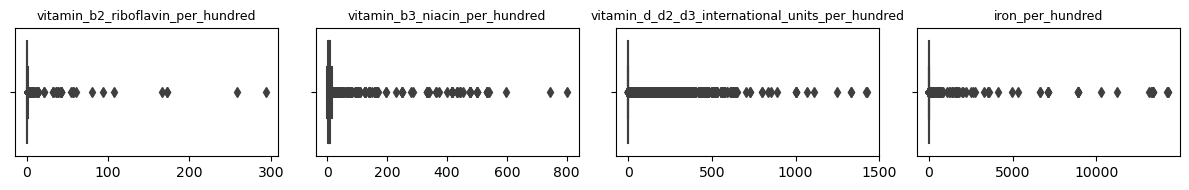

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(12, 2))

for ax, col in zip(
    axes.flatten(),
    [
        "vitamin_b2_riboflavin_per_hundred",
        "vitamin_b3_niacin_per_hundred",
        "vitamin_d_d2_d3_international_units_per_hundred",
        "iron_per_hundred",
    ],
):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col, fontdict={"fontsize": 9})
    ax.set_xlabel("")


fig.tight_layout()
plt.show()

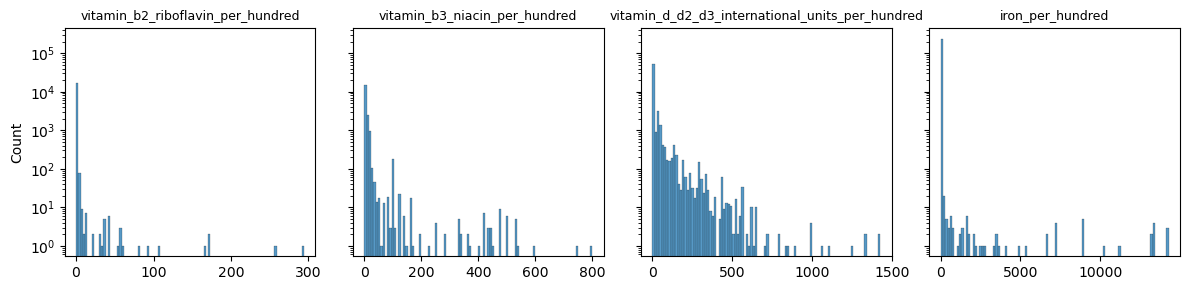

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(12, 3))

for ax, col in zip(
    axes.flatten(),
    [
        "vitamin_b2_riboflavin_per_hundred",
        "vitamin_b3_niacin_per_hundred",
        "vitamin_d_d2_d3_international_units_per_hundred",
        "iron_per_hundred",
    ],
):
    sns.histplot(data=df[col], bins=100, ax=ax)
    ax.set_yscale("log")
    ax.set_title(col, fontdict={"fontsize": 9})
    ax.set_xlabel("")


fig.tight_layout()
plt.show()

Out of another visual inspection, I am choosing tighter limits for classifying outliers, always being mindful of the amount of outliers I would be substituting with NaN.

In [130]:
df["vitamin_b2_riboflavin_per_hundred"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
374878   NaN
374879   NaN
374881   NaN
374882   NaN
374883   NaN
Name: vitamin_b2_riboflavin_per_hundred, Length: 344767, dtype: float64

In [131]:
(df["vitamin_b2_riboflavin_per_hundred"] > 10).sum()

38

In [132]:
(df["vitamin_b3_niacin_per_hundred"] > 200).sum()

56

In [133]:
(df["vitamin_d_d2_d3_international_units_per_hundred"] > 650).sum()

20

In [134]:
(df["iron_per_hundred"] > 100).sum()

96

Given that the amount of outliers identified with these new limits is not a concern neither with regards to the current amount of missing values of the variables, nor in proportion to the amount of existing values, I am confident in proceeding with the previously applied procedure and curious to see if a more evident improvement comes out.

In [135]:
vitamin_b2_outliers = df.loc[
    df["vitamin_b2_riboflavin_per_hundred"] > 10, "vitamin_b2_riboflavin_per_hundred"
]

vitamin_b3_outliers = df.loc[
    df["vitamin_b3_niacin_per_hundred"] > 200, "vitamin_b3_niacin_per_hundred"
]

vitamin_d_d2_d3_outliers = df.loc[
    df["vitamin_d_d2_d3_international_units_per_hundred"] > 650,
    "vitamin_d_d2_d3_international_units_per_hundred",
]

iron_outliers = df.loc[df["iron_per_hundred"] > 100, "iron_per_hundred"]

In [136]:
for outliers, column in zip(
    [vitamin_b2_outliers, vitamin_b3_outliers, vitamin_d_d2_d3_outliers, iron_outliers],
    [
        "vitamin_b2_riboflavin_per_hundred",
        "vitamin_b3_niacin_per_hundred",
        "vitamin_d_d2_d3_international_units_per_hundred",
        "iron_per_hundred",
    ],
):

    df.loc[outliers.index, column] = np.nan

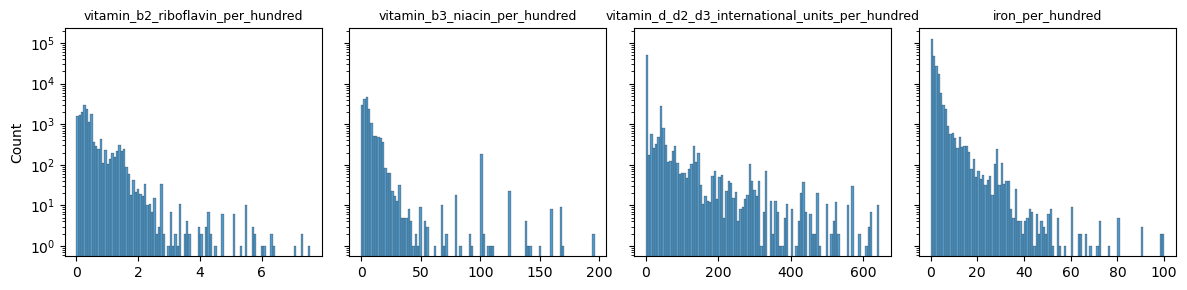

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(12, 3))

for ax, col in zip(
    axes.flatten(),
    [
        "vitamin_b2_riboflavin_per_hundred",
        "vitamin_b3_niacin_per_hundred",
        "vitamin_d_d2_d3_international_units_per_hundred",
        "iron_per_hundred",
    ],
):
    sns.histplot(data=df[col], bins=100, ax=ax)
    ax.set_yscale("log")
    ax.set_title(col, fontdict={"fontsize": 9})
    ax.set_xlabel("")


fig.tight_layout()
plt.show()

Finally, after this last skimming, the right skewedness is visibly dampened, while still relevant. I am satisfied with this result as it has been achieved without any meaningful data loss, out of a simple visual inspection. These refined limits seem also reasonable considering that they are more in line with what is generally considered being an abundant amount in food, without stepping into the realms of quantities I would much more likely expect from supplements.

# D. Exploratory Data Analysis: Text data

This task is primarily focused on the *ingredients_en* column, a text column to investigate in order to find out more insights about the ingredients of the Open Food dataset. First and foremost, I believe that an initial preprocessing of the text data stored in this column is necessary, before conducting any further analysis. For convenience in case of future repetitive use, even for other columns, I prefer building up a dedicated function to preprocess text data in the way I intend: `preprocess_text(text)`.

In [138]:
import re  # importing regular expressions module

In [139]:
# Load English stopwords from nltk

import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")

I will build an effective preprocessing function iteratively, by starting from a preliminary version that simply deals with case folding, basic punctuation marks, hypens and common stopwords in english.

In [140]:
def preprocess_text(text):

    # Convert to lowercase
    clean_text = text.lower()

    # Replace common punctuation marks with whitespace
    clean_text = re.sub(r"[,.()]", " ", clean_text)

    # Replace single hyphens with whitespace
    clean_text = re.sub(r"\s-\s", " ", clean_text)

    # Remove stop words and split on whitespace
    processed_sample_tokens = [
        tok for tok in clean_text.split() if tok not in stopwords_english
    ]

    return processed_sample_tokens

In [141]:
preprocessed_ingredients = df["ingredients_en"].apply(preprocess_text)
preprocessed_ingredients

0         [superior, quality, durum, wheat, pasta, ingre...
1                   [bio, milk, switzerland, kitchen, salt]
2                                   [100%, coffee, arabica]
3         [powdered, chocolate, 99%, sugar, cocoa, emuls...
4         [cocoa, paste, *, honduras, raw, cane, sugar, ...
                                ...                        
374878                                 [ingredient_missing]
374879                                 [ingredient_missing]
374881    [cocoa, mass, fat, reduced, cocoa, cocoa, butt...
374882                                 [ingredient_missing]
374883                                 [ingredient_missing]
Name: ingredients_en, Length: 344767, dtype: object

In [142]:
for i in range(10):
    print(
        preprocessed_ingredients[preprocessed_ingredients != "ingredient_missing"][i],
        "\n",
    )

['superior', 'quality', 'durum', 'wheat', 'pasta', 'ingredients:', 'durum', 'wheat', 'water', 'agricultural', 'ingredients', 'products', 'organic', 'farming'] 

['bio', 'milk', 'switzerland', 'kitchen', 'salt'] 

['100%', 'coffee', 'arabica'] 

['powdered', 'chocolate', '99%', 'sugar', 'cocoa', 'emulsifier', 'soy', 'lecithin', 'flavour', 'vanillin', 'cinnamon', '32%', 'cocoa', 'minimum'] 

['cocoa', 'paste', '*', 'honduras', 'raw', 'cane', 'sugar', '*', 'paraguay', 'cocoa', 'butter', '*', 'dominican', 'republic', 'vanilla', 'beans', '*', 'cocoa', 'content', 'chocolate:', '70%', 'minimum', '*', 'ingredients', 'accordance', 'fairtrade', 'fairtrade', 'standards', '100%', 'total', 'weight', 'products', 'cocoa', 'base', 'sugars', 'mass', 'balance', 'agricultural', 'ingredients', 'come', 'farms', 'converted', 'organic', 'farming'] 

['cocoa', 'powder'] 

['sugar', 'whole', 'milk', 'powder', 'cocoa', 'butter', 'cocoa', 'mass', 'honey', '3', '0%', 'concentrated', 'butter', 'almonds', '1', '6%'

Checking this first result, there's a clear need of further refining the preprocessing, particularly in terms of:

1. Excluding other types of punctuation
2. Excluding numbers when not part of an ingredient's nomenclature
3. Excluding generic words, i.e. terms describing an ingredient but not representing an ingredient themselves
4. Excluding plurals to avoid duplication

To ensure the maximum flexibility for further refinements of the preprocessing function, I am setting up the relevant parameters outside of the method definition, so that I will be able to easily fine-tune them in the future should it be required, without having to revisit the full definition of `preprocess_text(text)`.

In [143]:
punctuation = r"[,.()*\[\]{}&:%;?#]"
numbers = r"\b\d+"

In [144]:
generic_words = "traded, compliance, accordance, fairtrade, standard, addition, ingredient, total, weight, product, agricultural, mass, balance, minimum, maximum, organic, farming, concentrated, converted, content, contain, superior, quality, artificially, partially, natural".split(
    ", "
)

print(generic_words)

['traded', 'compliance', 'accordance', 'fairtrade', 'standard', 'addition', 'ingredient', 'total', 'weight', 'product', 'agricultural', 'mass', 'balance', 'minimum', 'maximum', 'organic', 'farming', 'concentrated', 'converted', 'content', 'contain', 'superior', 'quality', 'artificially', 'partially', 'natural']


In [145]:
def preprocess_text(text):

    # Convert to lowercase
    clean_text = text.lower()

    # Replace common punctuation marks with whitespace
    clean_text = re.sub(punctuation, " ", clean_text)

    # Replace single hyphens with whitespace
    clean_text = re.sub(r"\s-\s", " ", clean_text)

    # Remove numbers
    clean_text = re.sub(numbers, " ", clean_text)

    # Remove plurals
    plurals = [
        tok
        for tok in clean_text.split()
        if (tok[-1] == "s") and (tok[:-1] in clean_text.split())
    ]
    cleaned_tokens = [tok for tok in clean_text.split() if tok not in plurals]

    # Remove stop words and split on whitespace
    processed_sample_tokens = [
        tok for tok in cleaned_tokens if tok not in stopwords_english
    ]

    # Remove generic words
    processed_sample_tokens = [
        tok
        for tok in processed_sample_tokens
        if (tok not in generic_words) and (tok[:-1] not in generic_words)
    ]

    return processed_sample_tokens

In [146]:
preprocessed_ingredients = df["ingredients_en"].apply(preprocess_text)
preprocessed_ingredients

0                [durum, wheat, pasta, durum, wheat, water]
1                   [bio, milk, switzerland, kitchen, salt]
2                                         [coffee, arabica]
3         [powdered, chocolate, sugar, cocoa, emulsifier...
4         [cocoa, paste, honduras, raw, cane, sugar, par...
                                ...                        
374878                                 [ingredient_missing]
374879                                 [ingredient_missing]
374881    [cocoa, fat, reduced, cocoa, cocoa, butter, de...
374882                                 [ingredient_missing]
374883                                 [ingredient_missing]
Name: ingredients_en, Length: 344767, dtype: object

In [147]:
for i in range(10):
    print(
        preprocessed_ingredients[preprocessed_ingredients != "ingredient_missing"][i],
        "\n",
    )

['durum', 'wheat', 'pasta', 'durum', 'wheat', 'water'] 

['bio', 'milk', 'switzerland', 'kitchen', 'salt'] 

['coffee', 'arabica'] 

['powdered', 'chocolate', 'sugar', 'cocoa', 'emulsifier', 'soy', 'lecithin', 'flavour', 'vanillin', 'cinnamon', 'cocoa'] 

['cocoa', 'paste', 'honduras', 'raw', 'cane', 'sugar', 'paraguay', 'cocoa', 'butter', 'dominican', 'republic', 'vanilla', 'beans', 'cocoa', 'chocolate', 'cocoa', 'base', 'come', 'farms'] 

['cocoa', 'powder'] 

['sugar', 'whole', 'milk', 'powder', 'cocoa', 'butter', 'cocoa', 'honey', 'butter', 'almonds', 'emulsifier', 'soy', 'lecithin', 'egg', 'white', 'flavoring', 'cocoa', 'milk', 'chocolate'] 

['durum', 'wheat', 'flour'] 

['honey'] 

['sugar', 'skimmed', 'milk', 'powder', 'cocoa', 'butter', 'glucose', 'syrup', 'barley', 'malt', 'extract', 'cocoa', 'palm', 'fat', 'lactose', 'protein', 'whey', 'milk', 'whey', 'powder', 'milk', 'milk', 'fat', 'emulsifiers', 'soya', 'lecithin', 'e492', 'wheat', 'flour', 'palm', 'kernel', 'fat', 'palm'

This second result seems far more reassuring, yet there are still a couple of improvements I can introduce. First and foremost, there are pairs of words which jointly identify an ingredient rather than separately, hence they are very frequently found sequentially one after the other.

I can attempt spotting and properly re-label a few of them using the *Phrases* module to bring a tailored n-gram model, initially with a relatively low accuracy, just to check the result.

In [148]:
from gensim.models import Phrases

In [149]:
n_gram_model = Phrases(
    preprocessed_ingredients,  # Expected input format: list of tokenized texts
    min_count=1,  # Keeps only collocations with at least min_counts
    delimiter=b"_",
)  # Glue character used to join collocation tokens

In [150]:
preprocessed_ingredients_collocations = [
    n_gram_model[ing] for ing in preprocessed_ingredients
]

In [151]:
print(preprocessed_ingredients_collocations[:5])

[['durum', 'wheat', 'pasta', 'durum', 'wheat', 'water'], ['bio', 'milk', 'switzerland', 'kitchen', 'salt'], ['coffee', 'arabica'], ['powdered', 'chocolate', 'sugar', 'cocoa', 'emulsifier', 'soy', 'lecithin', 'flavour', 'vanillin', 'cinnamon', 'cocoa'], ['cocoa', 'paste', 'honduras_raw', 'cane', 'sugar', 'paraguay', 'cocoa', 'butter', 'dominican_republic', 'vanilla', 'beans', 'cocoa', 'chocolate', 'cocoa', 'base', 'come', 'farms']]


In [152]:
df.ingredients_en[3]

'Powdered chocolate 99% (sugar, cocoa), emulsifier (soy lecithin), flavour (vanillin), Cinnamon.  32% cocoa minimum.'

While a few pairs have been successfully detected, it seems that in some cases words have been paired up wrongly (e.g. "pasta_durum"), in other case a few evident pairs are left untouched (e.g. soy lecithin).

I decide then to increase the accuracy of the n-gram model by raising the minimum count with which any pair must show up to be considered, along with the score threshold representing the "strength" of the pair.

I am also further refining the preprocessing function to impose a few collocations which are self-evident but that might not be detected by the n-gram model, adding as well a couple more generic words to be disregarded.

Lastly, I am excluding verbs from the lists, focusing only on the past tense (ending with *ed*) and present continuous (ending with *ing*), expecting them to be the most diffused ones.

In [153]:
forced_collocations = [
    "durum_wheat",
    "powdered_chocolate",
    "soy_lecithin",
    "citric_acid",
    "folic_acid",
    "ascorbic_acid",
    "benzoic_acid",
]

for x in [
    "may",
    "trace",
    "and/or",
    "flavor",
    "flavour",
    "less",
    "more",
    "type",
    "food",
]:
    generic_words.append(x)

verb_pattern = r"\w+ed\b|\w+ing\b"

In [154]:
def preprocess_text(text):

    # Convert to lowercase
    clean_text = text.lower()

    # Replace common punctuation marks with whitespace
    clean_text = re.sub(punctuation, " ", clean_text)

    # Replace single hyphens with whitespace
    clean_text = re.sub(r"\s-\s", " ", clean_text)

    # Remove numbers
    clean_text = re.sub(numbers, " ", clean_text)

    # Manually force collocations
    for colloc in forced_collocations:
        colloc_pattern = colloc.replace("_", " ")
        clean_text = re.sub(f"\\b{colloc_pattern}\\b", colloc, clean_text)

    # Remove verbs
    clean_text = re.sub(verb_pattern, "", clean_text)

    # Remove plurals
    plurals = [
        tok
        for tok in clean_text.split()
        if (tok[-1] == "s") and (tok[:-1] in clean_text.split())
    ]
    cleaned_tokens = [tok for tok in clean_text.split() if tok not in plurals]

    # Remove stop words and split on whitespace
    processed_sample_tokens = [
        tok for tok in cleaned_tokens if tok not in stopwords_english
    ]

    # Remove generic words
    processed_sample_tokens = [
        tok
        for tok in processed_sample_tokens
        if (tok not in generic_words) and (tok[:-1] not in generic_words)
    ]

    return processed_sample_tokens

To the output of the ngram model I will then apply a tailored function to remove duplicated tokens. This step cannot be done as part of the preprocessing as in that case it could potentially delete many words typically used in pairs.

In [155]:
def remove_duplicate_tokens(tokens):
    unique_tokens = list(set(tokens))
    return unique_tokens

In [156]:
preprocessed_ingredients = df["ingredients_en"].apply(preprocess_text)

n_gram_model = Phrases(
    preprocessed_ingredients,  # Expected input format: list of tokenized texts
    min_count=4,  # Keeps only collocations with at least min_counts
    delimiter=b"_",
    threshold=12.0,
)  # Glue character used to join collocation tokens

preprocessed_ingredients_collocations = [
    n_gram_model[ing] for ing in preprocessed_ingredients
]

In [157]:
preprocessed_ingredients_collocations = [
    remove_duplicate_tokens(x) for x in preprocessed_ingredients_collocations
]

In [158]:
print(preprocessed_ingredients_collocations[:5])

[['pasta', 'water', 'durum_wheat'], ['milk', 'bio', 'salt', 'switzerland', 'kitchen'], ['arabica', 'coffee'], ['emulsifier', 'cocoa', 'sugar', 'powdered_chocolate', 'vanillin', 'cinnamon', 'soy_lecithin'], ['chocolate', 'cane', 'raw', 'cocoa', 'paraguay', 'farms', 'sugar', 'vanilla', 'paste', 'dominican_republic', 'base', 'honduras', 'butter', 'beans', 'come']]


The final result of this preprocessing seems much more streamlined. While by having a more accurate n-gram model less pairs have been identified, such pairs are significantly more likely to be correct and I consider this approach being more reliable. 

I am also aware that by removing words ending with *ed* or *ing*, classifying them as verbs, a few ingredients will also be mistakenly excluded, but this error is offset by the vastly larger improvement obtained in removing descriptive verbs from each ingredients list.

This doesn't mean that the accuracy couldn't still be improved (e.g. addressing country names, or other generic words like "bio" or "flavour"), but this result is sufficiently cleaned up to proceed with further analysis, and I have set up all the required parameters of the `preprocess_text(text)` function should a further refinement be required in the future.

## D.1 Product with largest ingredient list

In order to identify the product with the larger ingredients list, I am coming back again to conveniently use an updated version of `preprocessed_ingredients` in light of the collocations found, paying attention to preserve the original indexes.

In [159]:
preprocessed_ingredients = pd.Series(preprocessed_ingredients_collocations)
preprocessed_ingredients.index = df["ingredients_en"].index
preprocessed_ingredients

0                               [pasta, water, durum_wheat]
1                   [milk, bio, salt, switzerland, kitchen]
2                                         [arabica, coffee]
3         [emulsifier, cocoa, sugar, powdered_chocolate,...
4         [chocolate, cane, raw, cocoa, paraguay, farms,...
                                ...                        
374878                                                   []
374879                                                   []
374881    [milk, fat, sesame, seeds, demerara, cocoa, su...
374882                                                   []
374883                                                   []
Length: 344767, dtype: object

Sorting in descending order the outcome of `len()` applied to the entire series, I can quickly identify the top 5 products having the largest amount of ingredients.

In [160]:
top_products_by_ingredients = (
    preprocessed_ingredients.apply(len).sort_values(ascending=False).head()
)
top_products_by_ingredients

47164     127
349187    126
208007    124
364636    123
301001    122
dtype: int64

In [161]:
df.loc[top_products_by_ingredients.index, "product_name_en"]

47164                  KID CUISINE Pepperoni Pizza, 7.15 OZ
349187                                  HOLIDAY COOKIE TRAY
208007               TURKEY & SWISS W/HERB DIJON SANDWICHES
364636    SPICY CHIPOTLE CHICKEN WRAP, SPICY CHIPOTLE CH...
301001                       CHIPOTLE CHICKEN WRAP, CHICKEN
Name: product_name_en, dtype: object

In [162]:
df["product_name_en"][47164]

'KID CUISINE Pepperoni Pizza, 7.15 OZ'

In [163]:
print(preprocessed_ingredients[47164])

['vital', 'b6', 'sorbate', 'guar', 'vegetable', 'mozzarella', 'iron', 'chocolate', 'propylene_glycol', 'culture', 'sulfate', 'paste', 'tomato', 'pepperoni', 'acid', 'sorbic', 'copper_gluconate', 'casein', 'pork', 'cream', 'enzyme', 'whey', 'lecithin', 'phosphate', 'graham_crumb', 'disodium', 'fatty', 'b2', 'aluminum', 'cyanocobalamin', 'chloride', 'brown', 'alkali', 'oleoresin', 'nitrite', 'pizza', 'skim', 'zinc_oxide', 'potassium', 'rennet', 'starter', 'pyridoxine_hydrochloride', 'gel', 'soy_lecithin', 'graham', 'ascorbic_acid', 'b1', 'xanthan', 'riboflavin', 'ester', 'whole', 'salt', 'tocopherol-rich', 'b-', 'oil', 'mononitrate', 'folic_acid', 'dextrose', 'calcium', 'fat', 'honey', 'sauce', 'palm', 'gluten', 'crust', 'mono-', 'blend', 'palmitate', 'sodium', 'acacia', 'potato', 'gum', 'sugar', 'citric_acid', 'stearate', 'garlic', 'maltodextrin', 'part', 'vitamin', 'barley', 'extract', 'l_cysteine', 'spices', 'cocoa', 'niacin', 'dough_conditioner', 'soda', 'cornstarch', 'dicalcium', 'l

In particular, "KID CUISINE Pepperoni Pizza" turns out to be the product with the largest ingredients list, followed up close by the remaining of the top 5. There's still margin of improvement in the sense that a few tokens don't seem to have sense by themselves, i.e. they do not unambiguously identify an ingredient, and most likely would be better suited for a pair/bigram that hasn't been detected.

Still, I consider this a satisfying result given that the ingredient list describes how the product is made with a sufficient degree of clarity and accuracy, taking into account that further manual refinements wouldn't have a major impact when compared with the tedious effort behind (for instance, looking at multiple samples and refining the exclusion criteria on multiple languages, as null values have been replaced with either french or german equivalents). 

## D.2 Product with shortest ingredients list

For this sub-tasks, I can follow a similar procedure to the one just accomplished, with the only difference of sorting in ascending order instead of descending.

In [164]:
bottom_products_by_ingredients = preprocessed_ingredients.apply(len).sort_values()
bottom_products_by_ingredients = bottom_products_by_ingredients[
    bottom_products_by_ingredients > 0
].head()
bottom_products_by_ingredients

284262    1
282083    1
282084    1
280711    1
94699     1
dtype: int64

In [165]:
df.loc[bottom_products_by_ingredients.index, "product_name_en"]

284262     RINGS & TENTACLES SQUID
282083                    TOMATOES
282084    DELUXE BABY LEAF SPINACH
280711            BROCCOLI FLORETS
94699           WHOLE STRAWBERRIES
Name: product_name_en, dtype: object

In [166]:
for entry in preprocessed_ingredients[bottom_products_by_ingredients.index]:
    print(entry, "\n")

['squid'] 

['tomatoes'] 

['spinach'] 

['broccoli_florets'] 

['strawberries'] 



Unsurprisingly, when excluding products without an applicable ingredients list, mono-ingredient products position themselves at the bottom of the ranking, for example the product "Rings & Tentacles Squid" which contains, simply, squid.

The result is satisfying also because there are no descriptive adjectives being found, and  *broccoli_florets* has been correctly paired up.

## D.3 Impact of text cleaning and top 10 most frequent ingredients

The impact of the preprocessing had already been appreciated in previous tasks, but it becomes evident when sampling 5 products and comparing their original ingredients list and the preprocessed one.

In [167]:
sample_products = df["ingredients_en"][
    df["ingredients_en"] != "ingredient_missing"
].sample(n=5, random_state=20)
sample_products

195040    WATER, BEEF STOCK (WATER, BEEF*)*, CANE SUGAR*...
233389    ORGANIC ENRICHED FLOUR (ORGANIC WHEAT FLOUR, N...
229921    MECHANICALLY SEPARATED CHICKEN, WATER, PORK HE...
135343    SUGAR, CITRIC ACID, INSTANT TEA, CARAMEL COLOR...
254551    RED RASPBERRIES, CORN SYRUP, SUGAR, PECTIN, CI...
Name: ingredients_en, dtype: object

In [168]:
for i in sample_products:
    print(i, "\n")

WATER, BEEF STOCK (WATER, BEEF*)*, CANE SUGAR*, ONION POWDER*, YEAST EXTRACT, GARLIC POWDER*, CARAMEL COLOR*, SEA SALT, BLACK PEPPER*. 

ORGANIC ENRICHED FLOUR (ORGANIC WHEAT FLOUR, NIACIN, REDUCED IRON, THIAMINE MONONITRATE, RIBOFLAVIN, FOLIC ACID), WATER, CONTAINS LESS THAN 1.5% OF EACH OF THE FOLLOWING: SEA SALT, YEAST, WHEAT GLUTEN, MALTED BARLEY FLOUR. 

MECHANICALLY SEPARATED CHICKEN, WATER, PORK HEARTS, PORK, DEXTROSE, SALT, CORN SYRUP, MODIFIED CORN STARCH, CONTAINS 2% OR LESS OF THE FOLLOWING: BEEF, FLAVORINGS, POTASSIUM LACTATE, POTASSIUM ACETATE, SODIUM DIACETATE, SODIUM PHOSPHATES, SODIUM ERYTHORBATE, SODIUM NITRITE. 

SUGAR, CITRIC ACID, INSTANT TEA, CARAMEL COLOR, NATURAL LEMON FLAVOR WITH OTHER NATURAL FLAVORS, ARTIFICIAL COLOR (F.D. & C. RED #40). 

RED RASPBERRIES, CORN SYRUP, SUGAR, PECTIN, CITRIC ACID. 



In their original state, several ingredients list were written basically in the shape of a descriptive paragraph. Most of the descriptive adjectives have been correctly cleaned by the preprocessing, which is fairly accurate in returning a clear list of "standalone" ingredients. 

Still, a few "leftover" adjectives are found, and most likely some pairs haven't been detected by the n-gram model. Nonetheless, looking at the final result, I am satisfied with this level of accuracy considering the manual effort behind refining the preprocessing function, a manual effort that's theoretically endless as 100% accuracy will hardly be achieved.

In [169]:
for i in preprocessed_ingredients[sample_products.index]:
    print(i, "\n")

['color', 'extract', 'water', 'powder', 'cane', 'caramel', 'onion', 'yeast', 'salt', 'beef', 'sugar', 'pepper', 'sea', 'black', 'stock', 'garlic'] 

['water', 'riboflavin', 'gluten', 'yeast', 'salt', 'barley', 'niacin', 'sea', 'thiamine', 'wheat', 'flour', 'mononitrate', 'folic_acid', 'iron'] 

['syrup', 'potassium', 'mechanically', 'water', 'salt', 'diacetate', 'chicken', 'phosphates', 'lactate', 'dextrose', 'pork', 'starch', 'flavorings', 'sodium', 'hearts', 'acetate', 'beef', 'nitrite', 'corn', 'erythorbate'] 

['color', 'caramel', 'lemon', 'instant_tea', 'sugar', 'citric_acid', 'artificial', 'f', 'c'] 

['syrup', 'raspberries', 'sugar', 'citric_acid', 'corn', 'pectin'] 



When it comes to checking the most frequent ingredients across all the products, I intend to use the `Counter` module from the *collections* library. First and foremost, though, I need to bring all ingredients in one unique list. This is another moment in which I can appreciate the positive impact of having removed duplicates in single ingredients lists.

In [170]:
all_ingredients = []
for product in preprocessed_ingredients:
    for ing in product:
        all_ingredients.append(ing)

In [171]:
from collections import Counter

The resulting list of the top 10 most frequent ingredients seems not only accurate (no adjectives or generic words are found) but also reasonable, having salt, sugar and water as the top 3 ingredients.
For better clarity, I can visualize it through a convenient barplot.

In [172]:
most_frequent_ingredients = Counter(all_ingredients).most_common(10)
most_frequent_ingredients

[('salt', 195506),
 ('sugar', 158501),
 ('water', 151641),
 ('oil', 127255),
 ('corn', 104930),
 ('milk', 94114),
 ('sodium', 83001),
 ('flour', 82699),
 ('citric_acid', 82087),
 ('syrup', 78222)]

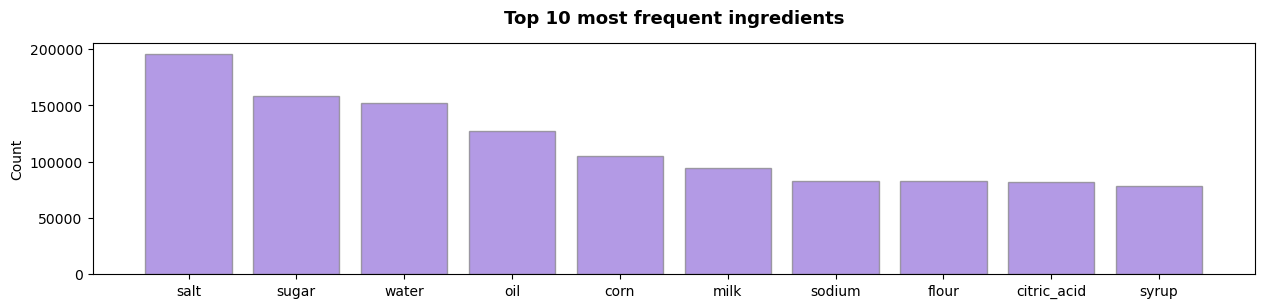

In [173]:
# Barplot and font specifications
barplot_specs = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs = {"fontsize": 13, "fontweight": "bold", "y": 1.05}


plt.figure(figsize=(15, 3))
plt.bar(*zip(*most_frequent_ingredients), **barplot_specs)
plt.title("Top 10 most frequent ingredients", **title_specs)
plt.ylabel("Count")

plt.show()

# E. Exploratory Data Analysis: Time-series data

## E.1 Items created at each month-hour pair

For the purpose of this task, I'll focus on the column *created_at*. It originally contains string type entries, no missing values are found (after the corrections made previously) and all entries end with "Z", indicating that all timestamps are referred to the same time zone ("Zulu" time, i.e. GMT).

Since no change is required to `df` in order to accomplish this task, I decide to work with a separately created Series corresponding to a copy of the *created_at* column, converted to the datetime data type.

In [174]:
df["created_at"]

0         2016-06-01T11:42:22.908Z
1         2016-06-01T11:42:25.111Z
2         2016-06-01T11:42:25.900Z
3         2016-06-01T11:42:26.184Z
4         2016-06-01T11:42:26.350Z
                    ...           
374878    2021-10-04T14:02:42.220Z
374879    2021-10-04T14:08:42.215Z
374881    2021-10-04T14:22:10.685Z
374882    2021-10-04T14:27:36.157Z
374883    2021-10-04T16:10:49.085Z
Name: created_at, Length: 344767, dtype: object

In [175]:
df["created_at"].isnull().sum()

0

In [176]:
sum(df["created_at"].apply(lambda x: x[-1]) != "Z")

0

In [177]:
data = pd.to_datetime(df["created_at"], format="%Y-%m-%dT%H:%M:%S.%fZ")
data

0        2016-06-01 11:42:22.908
1        2016-06-01 11:42:25.111
2        2016-06-01 11:42:25.900
3        2016-06-01 11:42:26.184
4        2016-06-01 11:42:26.350
                   ...          
374878   2021-10-04 14:02:42.220
374879   2021-10-04 14:08:42.215
374881   2021-10-04 14:22:10.685
374882   2021-10-04 14:27:36.157
374883   2021-10-04 16:10:49.085
Name: created_at, Length: 344767, dtype: datetime64[ns]

After that, I decide to work with a DataFrame, allowing the creation of multiple columns which contain specific information about each timestamp.

In [178]:
data = data.to_frame()

In [179]:
data["month"] = data["created_at"].dt.month
data["hour"] = data["created_at"].dt.hour
data["minute"] = data["created_at"].dt.minute
data

created_at  month  hour  minute
0      2016-06-01 11:42:22.908      6    11      42
1      2016-06-01 11:42:25.111      6    11      42
2      2016-06-01 11:42:25.900      6    11      42
3      2016-06-01 11:42:26.184      6    11      42
4      2016-06-01 11:42:26.350      6    11      42
...                        ...    ...   ...     ...
374878 2021-10-04 14:02:42.220     10    14       2
374879 2021-10-04 14:08:42.215     10    14       8
374881 2021-10-04 14:22:10.685     10    14      22
374882 2021-10-04 14:27:36.157     10    14      27
374883 2021-10-04 16:10:49.085     10    16      10

[344767 rows x 4 columns]

Grouping by "month" and "hour", I obtain a multi-level indexed Series, storing the amount of items created at each month-hour pair (calculated with the aggregation function `size()`, which in this case returns the same output of `count()` as there are no null values).

Lastly, `unstack(fill_values=0)` is then used to transpose hours into columns, using 0 as a filler for pairs which were non-existing.
In essence, I have already created the heatmap in the shape of a DataFrame.

In [180]:
heatmap_data = data.groupby(["month", "hour"]).size().unstack(fill_value=0)
heatmap_data

hour    0   1   2   3   4    5     6    7    8    9   ...   14   15    16  \
month                                                 ...                   
1        0   0   0   0   0    0     3   60  164  264  ...   88   57    16   
2        0   0   0   0   0    0     0    6  251  174  ...   73   45    11   
3        0   0   0   0   0    0     3   56  406  332  ...  540  549   119   
4        0   8   0   0  16  104   376  261  256  262  ...  173   39    22   
5        0   0   2   0   1    0    21  148  166   89  ...   98   58    19   
6        4   0  18   0   0    1   237  154  150  186  ...  349  160   195   
7      397  95   0   0   0    1  1161  204  114  115  ...  122  174  1049   
8       19  14  10   3   0   10    41  334  132  414  ...  153  139   249   
9        0   0   0   1   5   45   406  170  163  515  ...  309  258  1307   
10       0   0   0   0   0    3    75  139  282  239  ...   72  689    15   
11       0   0   0   8   2    0     0  290  395  350  ...  177  114   175   
12       0   2   0   0   0    0     4   49   86  125  ...  104   26    23   

hour     17    18    19    20   21   22   23  
month                                         
1        32    38    13    16    0    1    0  
2        12     3    51    16   99    0    0  
3        88    12    30   495   11    0    1  
4        28     5   211    23  170    0    0  
5       170    67    25     0    0    0    0  
6       605   210     9    21   49  741   44  
7       393   311   487  1556  508  425  518  
8       145   125   244   106   52   33    5  
9      1240  1835  1188    12  370    1    0  
10       18    49    16    86   22    0    0  
11       19    35    66    76    4    7    1  
12       34     8     6    22   25    0    0  

[12 rows x 24 columns]

To properly visualize it in the intended way, I am leveraging the heatmap plot of Seaborn, paying attention to format annotations as integers and setting `vmax` to 5000 in order to show all values above such treshold with the darkest color of the scale.

While there are a few pairs in which the number of created items rises above 1000, actually the only pair which stands out from the map is the one corresponding to "April - 10 AM", a time and month in which most of the entries seem to have been generated. I hence decide to further explore this case.

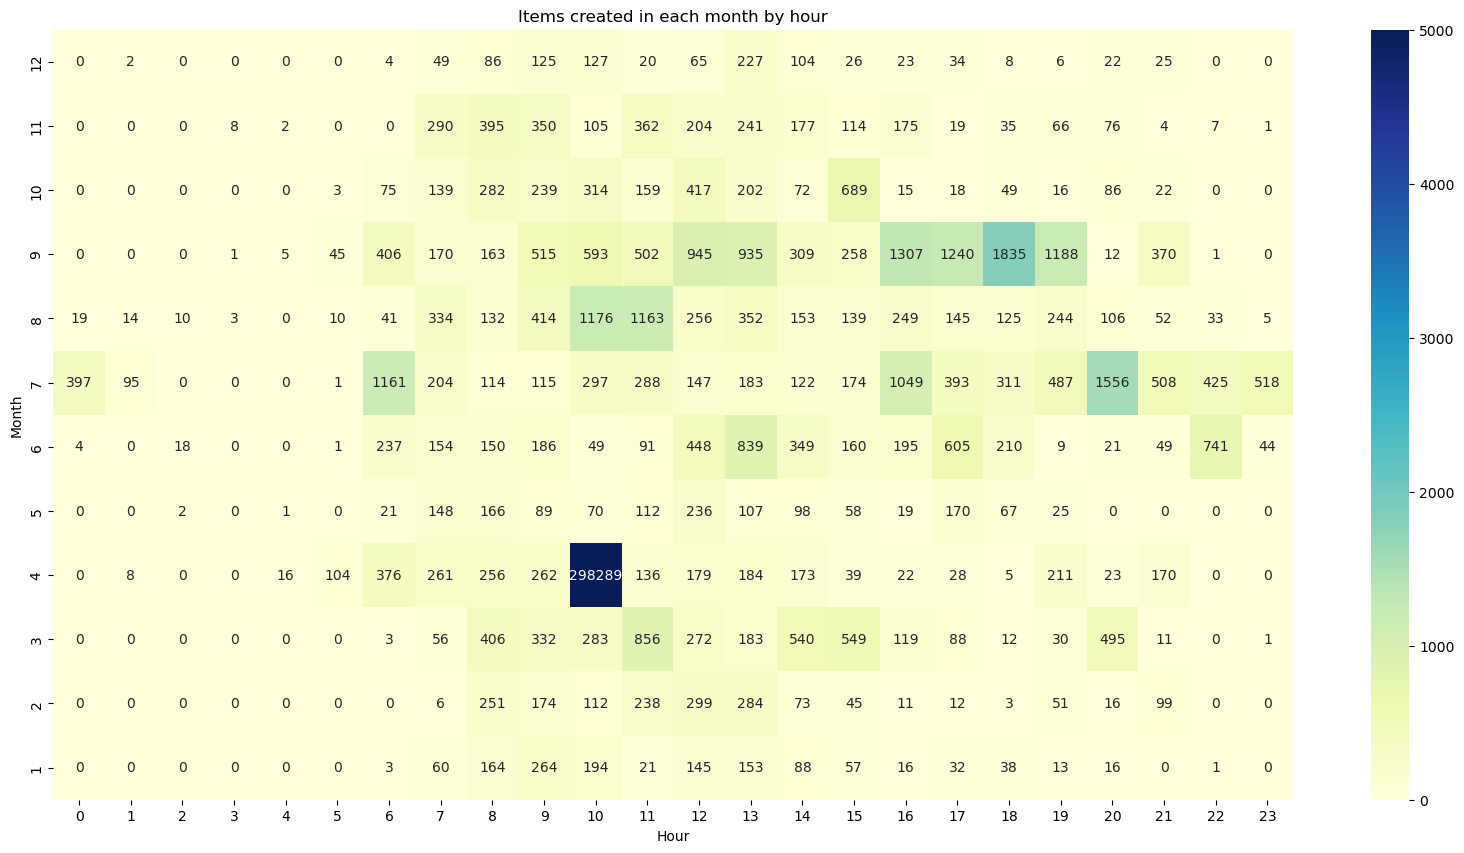

In [181]:
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", vmax=5000)
plt.title("Items created in each month by hour")
plt.xlabel("Hour")
plt.ylabel("Month")
plt.gca().invert_yaxis()
plt.show()

First and foremost, with `sum()` I am confirming that indeed the month of April is linked to the vast majority of the items created.

In [182]:
sum(data["created_at"].dt.month == 4)

300742

After that, investigating how items are distributed across years for the specific month-pair mentioned above, I notice that the bulk of items has been created in April 2021, at 10 AM. This must be linked either to an effective launch date of the database, or to a systemic update that involved the majority of products.

In [183]:
data[(data["month"] == 4) & (data["hour"] == 10)].groupby(
    data["created_at"].dt.year
).size()

created_at
2017         2
2018         2
2019         9
2020         4
2021    298272
dtype: int64

## E.2 Evolution of the total number of items over time

For the purpose of this second task, I am creating a similarly convenient DataFrame object including the dates (formatted as YYYY-MM) and the country of each product submission.

In [184]:
data = pd.to_datetime(df["created_at"].apply(lambda x: x[:10]))
data

0        2016-06-01
1        2016-06-01
2        2016-06-01
3        2016-06-01
4        2016-06-01
            ...    
374878   2021-10-04
374879   2021-10-04
374881   2021-10-04
374882   2021-10-04
374883   2021-10-04
Name: created_at, Length: 344767, dtype: datetime64[ns]

In [185]:
data = data.dt.strftime("%Y-%m")
data

0         2016-06
1         2016-06
2         2016-06
3         2016-06
4         2016-06
           ...   
374878    2021-10
374879    2021-10
374881    2021-10
374882    2021-10
374883    2021-10
Name: created_at, Length: 344767, dtype: object

In [186]:
data = pd.DataFrame({"date": data, "country": df["country"]})
data

date country
0       2016-06      CH
1       2016-06      CH
2       2016-06      CH
3       2016-06      CH
4       2016-06      CH
...         ...     ...
374878  2021-10      CH
374879  2021-10      CH
374881  2021-10      CH
374882  2021-10      CH
374883  2021-10      CH

[344767 rows x 2 columns]

I am then preparing the data to be used for the barplot, using a similar combination of `groupby()`, `size()` and `unstack()` as the one seen for *month* and *year* in the previous task. I am hence obtaining the count associated to each date-country pair.

In [187]:
barplot_data = data.groupby(["date", "country"]).size().unstack(fill_value=0)
barplot_data

country  AT    CH  DE  FR  IT  UK  US
date                                 
2016-05   0    20   0   0   0   0   0
2016-06   0  1064   0   0   0   0   0
2016-07   0  7365   0   0   0   0   0
2016-08   0   291   0   0   0   0   0
2016-09   0  5367   0   0   0   0   0
...      ..   ...  ..  ..  ..  ..  ..
2021-06   0   242   0   2   0   0  25
2021-07   0   261   0   0   0   0   0
2021-08   0   216   0   0   0   0   3
2021-09   0   364   0   8   0   0   0
2021-10   0    34   0   0   0   0   0

[62 rows x 7 columns]

Lastly, I can generate the stacked barplot with a `for` loop, paying attention to properly set the bottom to the value related to the last country being plotted.

After that, I am setting up a few plot parameters to best improve the plot readability, namely the y-axis scale (set to logarithmic) and the rotation of the x-ticks (set as vertical in order to avoid them overlapping with eachother).

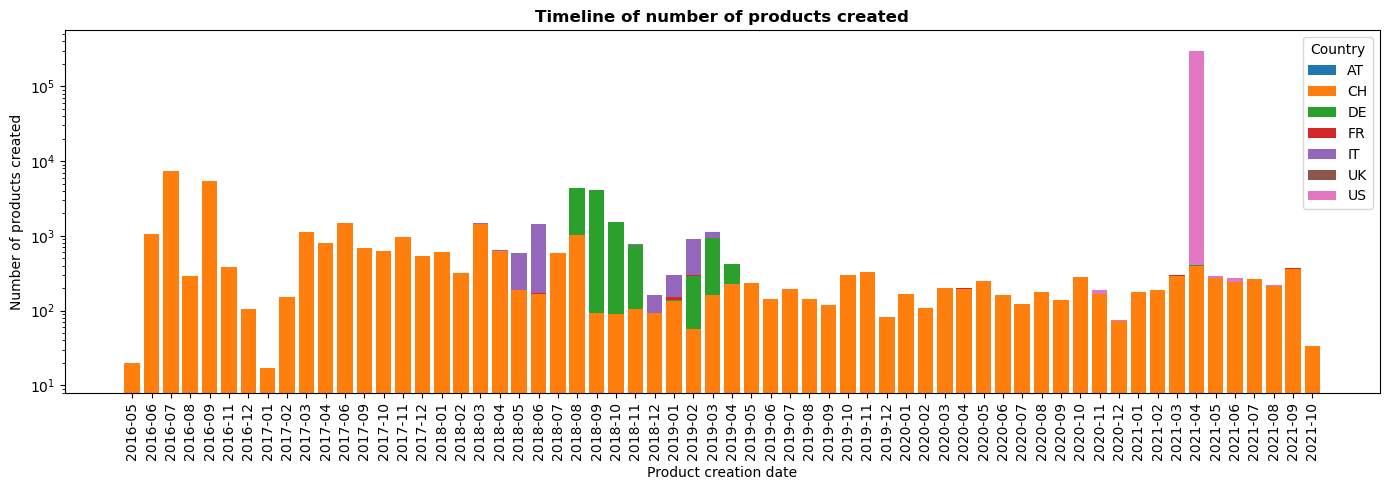

In [188]:
bottom = pd.Series(0, index=barplot_data.index)

plt.figure(figsize=(14, 5))

for country in barplot_data.columns:
    plt.bar(barplot_data.index, barplot_data[country], bottom=bottom, label=country)
    bottom += barplot_data[country]

plt.yscale("log")
plt.xticks(rotation=90)
plt.legend(title="Country", loc="upper right")
plt.xlabel("Product creation date")
plt.ylabel("Number of products created")
plt.title(
    "Timeline of number of products created",
    fontdict={"fontsize": 12, "fontweight": "bold"},
)

plt.ylim(bottom=8)
plt.tight_layout()
plt.show()

The logarithmic scale is intended to represent the contribution of each country in a more visually proportionate way, but it must not mislead into thinking that most entries are to be attributed to Switzerland. In fact, with an easy check it is possible to notice that the majority of the products are related to the US market, with a sizeable delta in comparison with any other country.

At the same time, it is true that Swiss products are the most scattered across each month, suggesting a more consistent upload to the Open Food database.

In [189]:
barplot_data["US"].sum()

298344

In [190]:
barplot_data["CH"].sum()

32951

# F. Exploratory Data Analysis: Correlation analysis

## F.1 Linear relationships

Your task is to quantify the linear relationships between the *energy_per_hundred* column and the other *per_hundred* columns by analysing their correlation with each other.

First and foremost, I am recalling the shape of `df`, reminding that interventions made in previous tasks have removed 22 columns from the original dataframe. Therefore, I am redefining the lists in which I had classified the columns per category, including in particular *per_hundred* columns, to ensure that I am working with their updated version.

In [191]:
df.shape

(344767, 77)

In [192]:
cols_per_hundred = []
cols_per_portion = []
cols_unit = []
other_cols = []

for col in df.columns:
    if "_per_hundred" in col:
        cols_per_hundred.append(col)
    elif "_per_portion" in col:
        cols_per_portion.append(col)
    elif "_unit" in col:
        cols_unit.append(col)
    else:
        other_cols.append(col)


print(f"There are {len(cols_per_hundred)} cols_per_hundred")
print(f"There are {len(cols_per_portion)} cols_per_portion")
print(f"There are {len(cols_unit)} cols_unit")
print(f"There are {len(other_cols)} other_cols")

There are 25 cols_per_hundred
There are 0 cols_per_portion
There are 39 cols_unit
There are 13 other_cols


I can now analyze the correlation between *energy_per_hundred* and the other *per_hundred* columns by generating a correlation matrix with `corr()` and taking into account only the column related to *energy_per_hundred*. For better clarity, I am sorting values in descending order.

In [193]:
corr_per_hundred = df[cols_per_hundred].corr()["energy_per_hundred"]
corr_per_hundred = corr_per_hundred.sort_values(ascending=False)
corr_per_hundred

energy_per_hundred                                 1.000000
energy_kcal_per_hundred                            0.999990
fat_per_hundred                                    0.757688
monounsaturated_fatty_acids_per_hundred            0.721076
saturated_fat_per_hundred                          0.641090
polyunsaturated_fatty_acids_per_hundred            0.602175
fatty_acids_total_saturated_per_hundred            0.579683
carbohydrates_per_hundred                          0.536021
sugars_added_per_hundred                           0.457104
sugars_per_hundred                                 0.383889
vitamin_b2_riboflavin_per_hundred                  0.294454
protein_per_hundred                                0.286315
iron_per_hundred                                   0.248888
fiber_per_hundred                                  0.242078
calcium_per_hundred                                0.057189
fatty_acids_total_trans_per_hundred                0.054743
potassium_k_per_hundred                 

Evidently the coefficient of linear correlation with *energy_per_hundred* itself is equal to 1, but I am glad to see that practically the same happens with *energy_kcal_per_hundred*: it means that the cleaning exercise performed earlier on has been successful in establishing the right relationship between kJs and kcals.

## F.2 Linear vs non-linear relationships

With the intent to further analyze the correlation with nutrients, I am excluding from the series of coefficients the two most obvious mentioned above, then selecting the remaining top 3 most correlated and the 3 least correlated (respectively with `head(3)` and `tail(3)`) to be stored in the `cols_subset` series.

In [194]:
corr_per_hundred.drop(["energy_per_hundred", "energy_kcal_per_hundred"], inplace=True)

In [195]:
cols_subset = pd.concat(
    [corr_per_hundred.head(3), corr_per_hundred[corr_per_hundred > 0].tail(3)]
)
cols_subset

fat_per_hundred                                    0.757688
monounsaturated_fatty_acids_per_hundred            0.721076
saturated_fat_per_hundred                          0.641090
vitamin_b1_thiamin_per_hundred                     0.009590
cholesterol_per_hundred                            0.009532
vitamin_d_d2_d3_international_units_per_hundred    0.009336
Name: energy_per_hundred, dtype: float64

After that, I am plotting scatterplots with linear regression fitting lines to highlight whether in fact a linear relationship sussists between each of these nutrients and *energy_per_hundred*.

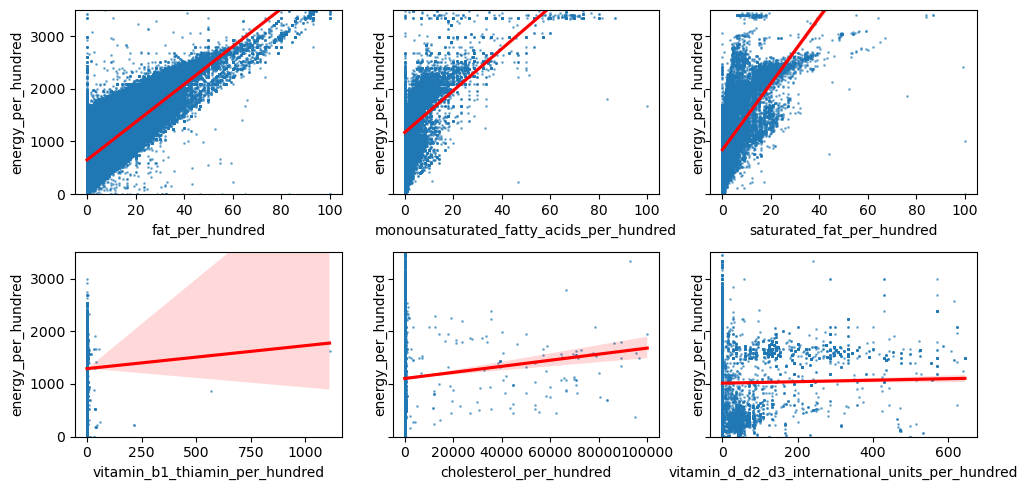

In [196]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5), sharey=True)

for col, ax in zip(cols_subset.index, axes.flatten()):
    ax.scatter(df[col], df["energy_per_hundred"], s=1, alpha=0.5)
    sns.regplot(
        x=df[col],
        y=df["energy_per_hundred"],
        scatter=False,
        ax=ax,
        line_kws={"color": "red"},
    )
    ax.set_xlabel(col)
    ax.set_ylim(0, 3500)

axes[0, 0].set_ylabel("energy_per_hundred")
axes[1, 0].set_ylabel("energy_per_hundred")

fig.tight_layout()
plt.show()

Unsurprisingly, the most correlated ones are nutrients related to fat, being the most calorie-rich macronutrient.
Nonetheless, I am interested in further exploring non-linearity even where linear regression seems to be the best fit, taking into considerations outliers. For the least correlated ones, outliers seem to be more obvious.

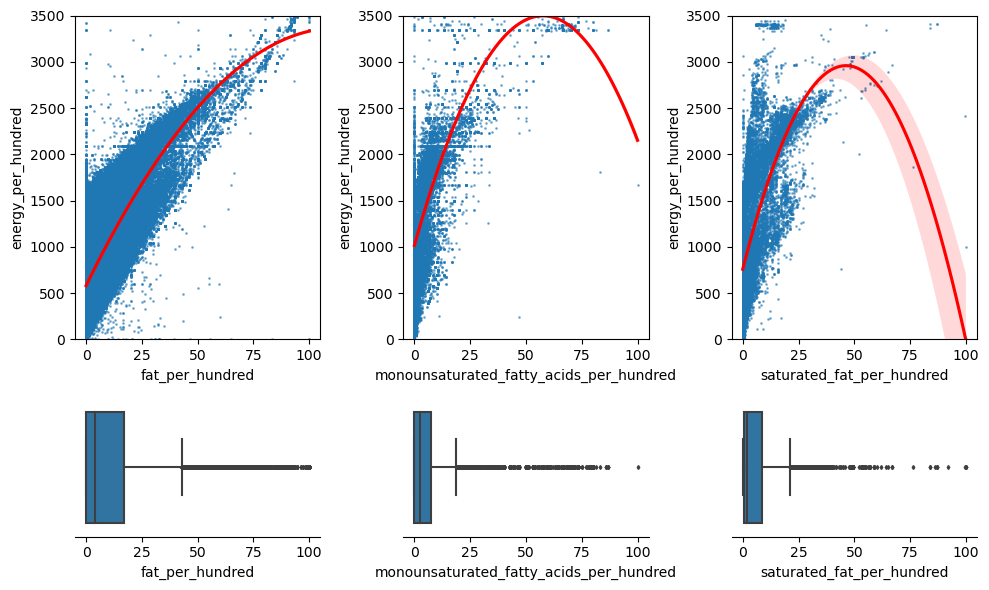

In [197]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(10, 6),
    gridspec_kw={"height_ratios": (0.7, 0.3)},
)

for col, plot_col in zip(
    [
        "fat_per_hundred",
        "monounsaturated_fatty_acids_per_hundred",
        "saturated_fat_per_hundred",
    ],
    [0, 1, 2],
):

    sns.regplot(
        x=df[col],
        y=df["energy_per_hundred"],
        scatter=True,
        ax=axes[0, plot_col],
        scatter_kws={"s": 1, "alpha": 0.5},
        line_kws={"color": "red"},
        order=2,
    )
    axes[0, plot_col].set_xlabel(col)
    axes[0, plot_col].set_ylim(0, 3500)

    sns.boxplot(
        x=df[col],
        ax=axes[1, plot_col],
        fliersize=2,
    )
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)


axes[0, 0].set_ylabel("energy_per_hundred")


fig.tight_layout()
plt.show()

It seems more appropriate to consider linear the relationship with *fat_per_hundred*. The same can be said also for *monounsaturated_fatty_acids_per_hundred* and *saturated_fat_per_hundred*, despite having more variability around the linear regression line, as the non-linear model seems quite unrealistic especially looking at the descending curve.

For further confirmations, I want to look at a polished view from all the outliers that can potentially affect the assessment of the relationship, while obviously being mindful of not excluding from consideration too many entries.

In [198]:
adjusted_cols_subset = [df["fat_per_hundred"]]
for col in cols_subset.index:
    if col == "fat_per_hundred":
        continue
    if col == "cholesterol_per_hundred":
        adjusted_col = df[col][df[col] < 200]
        adjusted_cols_subset.append(adjusted_col)
        print(
            f"In {col} {df[col][df[col] > 200].count()} items have been excluded out of {df[col].count()} items"
        )
    elif col in [
        "vitamin_b1_thiamin_per_hundred",
        "vitamin_d_d2_d3_international_units_per_hundred",
    ]:
        adjusted_col = df[col][df[col] < 5]
        adjusted_cols_subset.append(adjusted_col)
        print(
            f"In {col} {df[col][df[col] > 5].count()} items have been excluded out of {df[col].count()} items"
        )
    else:
        adjusted_col = df[col][df[col] < 50]
        adjusted_cols_subset.append(adjusted_col)
        print(
            f"In {col} {df[col][df[col] > 50].count()} items have been excluded out of {df[col].count()} items"
        )

In monounsaturated_fatty_acids_per_hundred 1663 items have been excluded out of 37941 items
In saturated_fat_per_hundred 40 items have been excluded out of 20743 items
In vitamin_b1_thiamin_per_hundred 69 items have been excluded out of 17797 items
In cholesterol_per_hundred 1726 items have been excluded out of 243319 items
In vitamin_d_d2_d3_international_units_per_hundred 8780 items have been excluded out of 59907 items


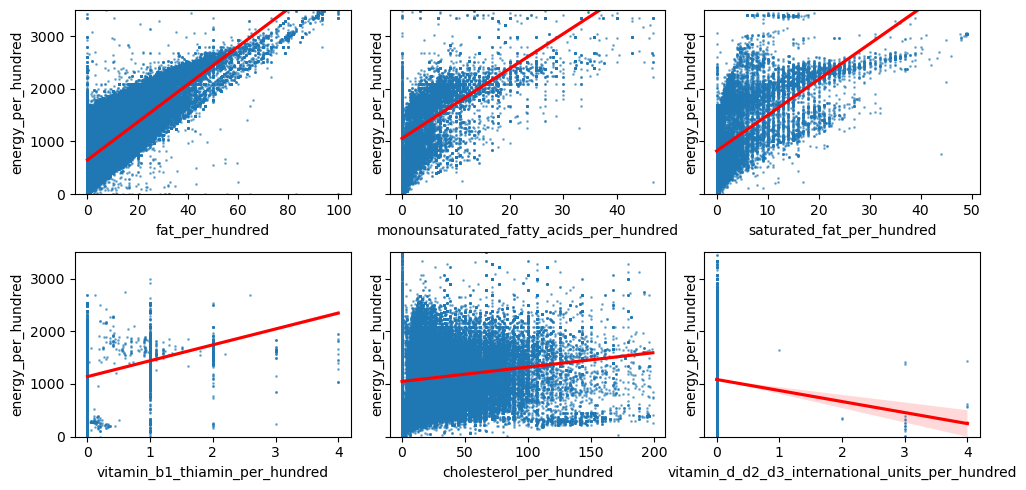

In [199]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5), sharey=True)

for col, ax in zip(adjusted_cols_subset, axes.flatten()):
    ax.scatter(col, df.loc[col.index, "energy_per_hundred"], s=1, alpha=0.5)
    sns.regplot(
        x=col,
        y=df.loc[col.index, "energy_per_hundred"],
        scatter=False,
        ax=ax,
        line_kws={"color": "red"},
    )
    ax.set_xlabel(col.name)
    ax.set_ylim(0, 3500)

axes[0, 0].set_ylabel("energy_per_hundred")
axes[1, 0].set_ylabel("energy_per_hundred")

fig.tight_layout()
plt.show()

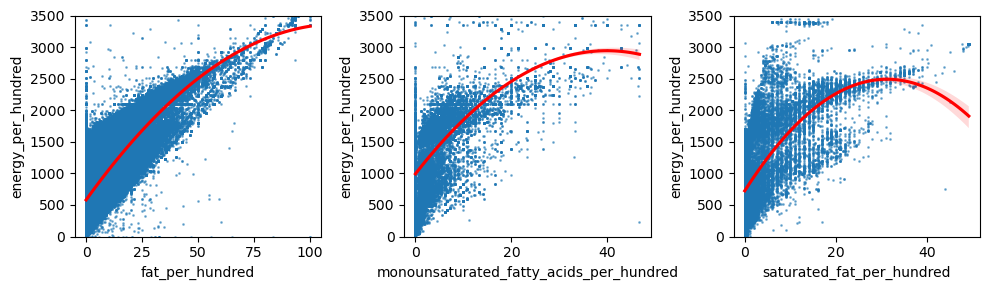

In [200]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(10, 3),
)

for col, ax in zip(adjusted_cols_subset[:3], axes.flatten()):

    sns.regplot(
        x=col,
        y=df.loc[col.index, "energy_per_hundred"],
        scatter=True,
        ax=ax,
        scatter_kws={"s": 1, "alpha": 0.5},
        line_kws={"color": "red"},
        order=2,
    )
    ax.set_xlabel(col.name)
    ax.set_ylim(0, 3500)


axes[0].set_ylabel("energy_per_hundred")


fig.tight_layout()
plt.show()

After looking at the polished scatterplots, I must observe the following:

1. When it comes to the least correlated ones, they are not just clearly not linearly correlated, they seem to not be correlated at all. A conclusion that goes hand in hand with the correlation coefficient nearing 0.

2. As for the most correlated ones, a linear relationship seems to be well-fitting for *fat_per_hundred*. For the remaining two, especially after polishing outliers, the higher variability around the regression line gives the impression of a linear and non-linear model being almost equally fitting. Nonetheless, considering that such nutrients are still related to fat, for which a linear relationship has been deemed appropriate, and taking into account that energy is supposed to continuously increase as fat content increases, I would personally choose the linear relationship to be the best approximation.

## F.3 Independence of categorical variables

For the purpose of this sub-task I am generating a new categorical feature, *energy_category*, intended to classify energy contents into three levels, each one containing an equally numerous amount of products.

Firstly, I am mindful of null values into the *energy_per_hundred* column, to which no category should correspond. I am then identifying breakpoints to distinguish categories using `np.linspace()`.

In [201]:
df["energy_per_hundred"][df["energy_per_hundred"].notna()]

0         1500.0
1         1010.0
2         1358.3
3         1679.0
4         2470.0
           ...  
374866     778.0
374867     443.0
374877    2548.0
374878     858.0
374881    2418.0
Name: energy_per_hundred, Length: 309360, dtype: float64

In [202]:
breakpoints = np.linspace(
    0, len(df["energy_per_hundred"][df["energy_per_hundred"].notna()]), 4, dtype=int
)
breakpoints = np.delete(breakpoints, 0)
breakpoints

array([103120, 206240, 309360])

After that, I am creating the `energy_category` series paying attention to preserve the same indexing of *energy_per_hundred*.

In [203]:
energy_category = pd.Series(index=df["energy_per_hundred"].index, dtype=object)
energy_category

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
374878    NaN
374879    NaN
374881    NaN
374882    NaN
374883    NaN
Length: 344767, dtype: object

I can then leverage a counter and a `for` loop to fill `energy_category` with the appropriate levels, ultimately paying attention that they all have the same numerosity of products.

In [204]:
counter = 1
for index, value in df["energy_per_hundred"].sort_values().items():
    if value == np.nan:
        counter += 1
        continue
    elif counter <= breakpoints[0]:
        energy_category[index] = "low energy"
    elif counter <= breakpoints[1]:
        energy_category[index] = "medium energy"
    elif counter <= breakpoints[2]:
        energy_category[index] = "high energy"

    counter += 1

In [205]:
energy_category.groupby(energy_category).count()

high energy      103120
low energy       103120
medium energy    103120
dtype: int64

In [206]:
len(energy_category[energy_category.notna()])

309360

`energy_category` is ready to be included as a column of `df`, and for coherence I am also appending it to the `other_cols` list.

In [207]:
df["energy_category"] = energy_category
other_cols.append("energy_category")

In order to verify if *country* and *energy_category* are independent, I have to first build a contingency table, i.e. a frequency table showing the amount of products represented by each combination of country and energy category.

Additionally, I am giving the columns a more logical order for better clarity, and checking again the numerosity of each category level as a further confirmation.

In [208]:
contingency_table = pd.crosstab(df["country"], df["energy_category"])
contingency_table = pd.DataFrame(
    data=contingency_table, columns=["low energy", "medium energy", "high energy"]
)
contingency_table

low energy  medium energy  high energy
country                                        
AT                1              0            0
CH             6281           7430         8352
DE              254            256          462
FR               16             20           15
IT               65             72          135
UK                1              0            0
US            96502          95342        94156

In [209]:
contingency_table.sum()

low energy       103120
medium energy    103120
high energy      103120
dtype: int64

Lastly, with the contingency table at hand, I can leverage the `chi2_contingency` function from the `scipy.stats` module to quantify all the required statistics, in particular the chi-square and p-value.

In [210]:
from scipy.stats import chi2_contingency

In [211]:
chi2, p, dof, matrix = chi2_contingency(contingency_table)

In [212]:
print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:")
print(matrix)

Chi-square: 447.41730684741447
p-value: 3.3386491134646825e-88
Degrees of freedom: 12
Expected values:
[[3.33333333e-01 3.33333333e-01 3.33333333e-01]
 [7.35433333e+03 7.35433333e+03 7.35433333e+03]
 [3.24000000e+02 3.24000000e+02 3.24000000e+02]
 [1.70000000e+01 1.70000000e+01 1.70000000e+01]
 [9.06666667e+01 9.06666667e+01 9.06666667e+01]
 [3.33333333e-01 3.33333333e-01 3.33333333e-01]
 [9.53333333e+04 9.53333333e+04 9.53333333e+04]]


Given that the p-value is largely smaller than 0.05, there is robust evidence to reject the null hypothesis, thus to affirm that the two variables are in fact dependent. 

This means that the country is indeed influencing the energy categories, beyond what could be expected from the relative incidence of products by country.

Lastly, as a further confirmation of the Chi-square test result, I calculated "manually" the expected values to be found in theory for each of the energy categories, which matches the output of `chi2_contingency()`. In particular, for Switzerland it is visible how the squared deviations from the expected values contribute significantly to a noticeably high chi-square value, hence to a noticeably low p-value.


In [213]:
test_df = df[df["energy_per_hundred"].notna()].groupby("country").size()
test_df = 103120 * test_df / test_df.sum()
test_df

country
AT        0.333333
CH     7354.333333
DE      324.000000
FR       17.000000
IT       90.666667
UK        0.333333
US    95333.333333
dtype: float64

# G. Advanced Exploratory Data Analysis

## G.1 Sample size by country

When looking at the overall 344767 samples, I can easily see how they are distributed across countries leveraging `value_counts()` applied to the *country* column.

In [214]:
df.shape

(344767, 78)

In [215]:
df.country.value_counts()

US    298344
CH     32951
DE     10636
IT      2717
FR       117
AT         1
UK         1
Name: country, dtype: int64

The large majority of the samples are related to the US market, with still a meaningful part related to the Swiss market. After that, it becomes a subjective decision when choosing which countries to drop in this analysis, taking into account that countries with a very small sample size run the risk of not generating statistically relevant results.

Here I chose a "soft" threshold of about 1% of the full sample size, in an attempt to keep a bit more countries other than US and CH. To be honest, though, I probably chose to retain Italy even out of a personal emotional bias.

In [216]:
countries = ["US", "CH", "DE", "IT"]
df_X = df[df.country.isin(countries)]
print(f"Shape of the new dataframe: {df_X.shape}")
df_X.country.value_counts()

Shape of the new dataframe: (344648, 78)


US    298344
CH     32951
DE     10636
IT      2717
Name: country, dtype: int64

## G.2 Organic vs non-organic products

When it comes to distinguishing organic from non-organic products, the criterion applied in this analysis consists in finding out if the product name contains either the word "bio" or "organic". I am considering the english name as, after the adjustments occurred prior in this project, it is the one with least amount of null values.

Still, obviously I cannot include in the analysis remaining samples with a null product name, as I am not able to classify them neither as organic nor as non-organic.

In [217]:
df_X.product_name_en.isna().sum()

18809

In [218]:
df_X = df_X[df_X.product_name_en.notna()]
df_X.shape

(325839, 78)

I can then generate a convenient boolean filter to identify organic products leveraging a regex pattern to find the words "bio" or "organic" in product names.

In [219]:
organic_filter = df_X.product_name_en.str.contains("bio|organic", case=False)
organic_filter

0          True
1         False
2          True
3         False
4         False
          ...  
374869    False
374877    False
374878    False
374879    False
374881    False
Name: product_name_en, Length: 325839, dtype: bool

In [220]:
df_X.product_name_en[2]

'Caffè Mauro - Roasted organic coffee blend'

---
After having dropped about 19000 entries due to a null product name, I realized that the sample size of Germany and Italy got drastically reduced, to a point that makes me question the utility of further analyses on these two.

---


Nonetheless, I chose to still keep them into account just to have a bit more variety and as a personal exercise, but I am obliged to highlight the fact that only evidences attributed to US and CH would, at this point, be sufficiently substantiated.

In [221]:
df_X[organic_filter].country.value_counts()

US    15211
CH     1623
DE      119
IT        6
Name: country, dtype: int64

In [222]:
df_X[~organic_filter].country.value_counts()

US    283130
CH     24649
DE       949
IT       152
Name: country, dtype: int64

Switzerland positions itself with a slighlty higher percentage of organic products in comparison with the US. 

Reminding the disclaimer above on sufficient sample size, Germany seems to be the first of the class scoring a percentage of organic products of about 11% of the full sample size (valid for this analysis).

In [223]:
(df_X[organic_filter].country.value_counts() * 100) / df_X.country.value_counts()

US     5.098528
CH     6.177680
DE    11.142322
IT     3.797468
Name: country, dtype: float64

## G.3 Distribution of macronutrients between organic and non-organic products per country

For the purpose of this analysis, totals and portions are irrelevant, because they offer no reliable means to compare different products on the basis of their nutritional profile. Instead, I will leverage the *per hundred* columns of the 4 macronutrients.

In [224]:
macronutrients = [
    "fat_per_hundred",
    "carbohydrates_per_hundred",
    "protein_per_hundred",
    "fiber_per_hundred",
]

Prior in this project, macronutrients had already been adjusted to ensure that no unrealistic values were being kept in the dataset. As a further confirmation, I am restating here how there are no values neither below 0 or above 100 for each of the macronutrient columns.

In [225]:
for col in macronutrients:
    print(
        f"{col} contains {df_X[col][df_X[col].lt(0)].sum().astype(int)} negative values"
    )

fat_per_hundred contains 0 negative values
carbohydrates_per_hundred contains 0 negative values
protein_per_hundred contains 0 negative values
fiber_per_hundred contains 0 negative values


In [226]:
for col in macronutrients:
    print(
        f"{col} contains {df_X[col][df_X[col].gt(100)].sum().astype(int)} values above 100%"
    )

fat_per_hundred contains 0 values above 100%
carbohydrates_per_hundred contains 0 values above 100%
protein_per_hundred contains 0 values above 100%
fiber_per_hundred contains 0 values above 100%


With the intent of analyzing the distribution of organic and non-organic products in each country, I must start from a critical observation: non-organic products represent the vast majority of the products, regardless of the country. Therefore, in order for any visualization to be meaningful, I have to avoid any kind of normalization which would obviously drastically scale down plots of organic products.

With that being said, I chose two kinds of plot to be the most informative in this case: violin plots and kernel density plots.
In particular, I will deploy the first ones to facilitate country by country comparison, while the latter will be used, for each country, to spot any differences, in terms of a given macronutrient content, between organic and non-organic products.

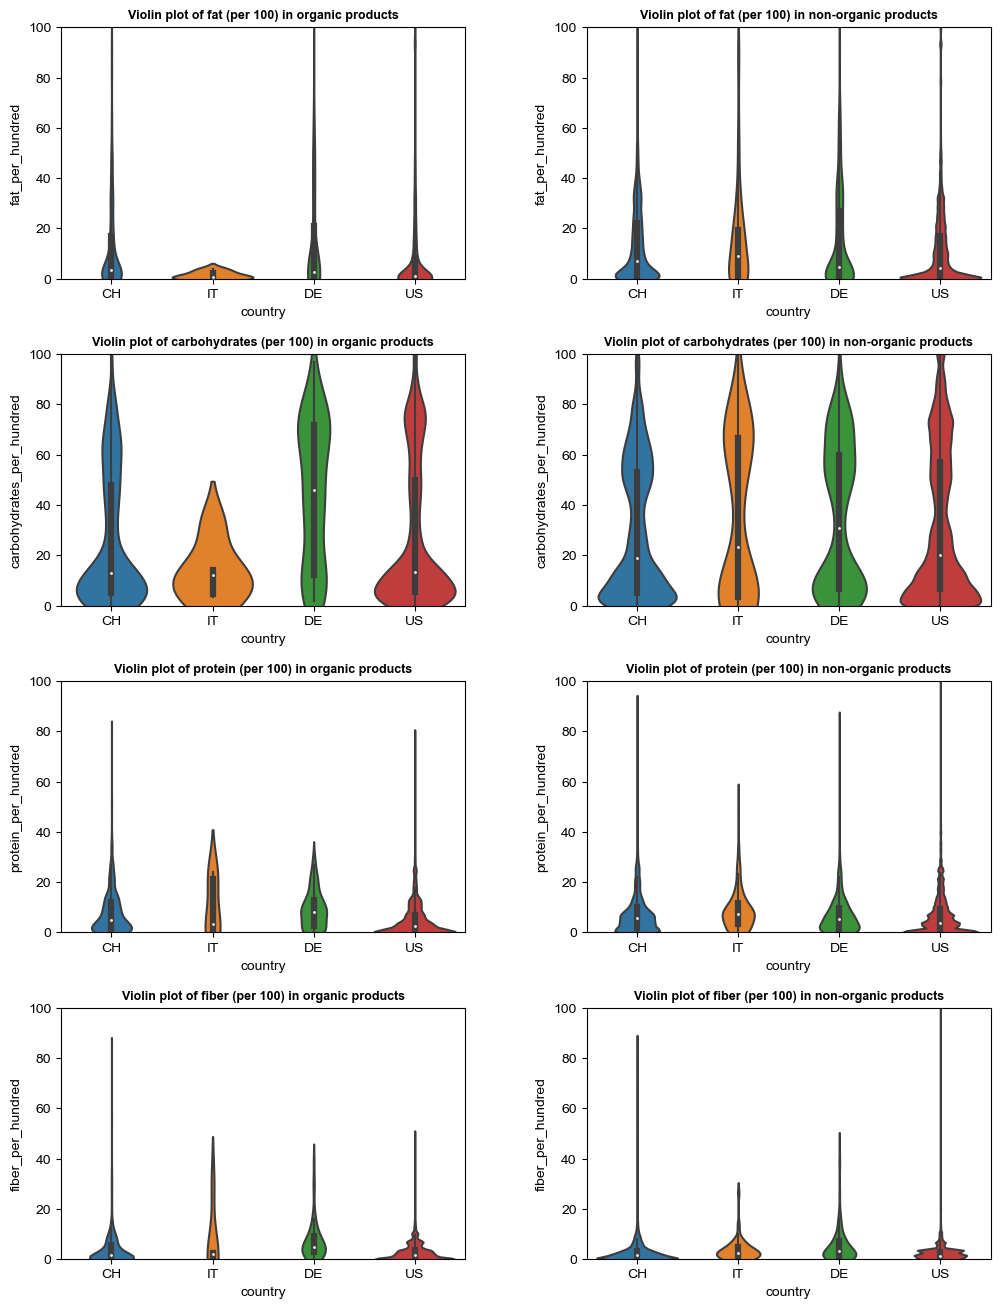

In [227]:
fig, axes = plt.subplots(
    nrows=4,
    ncols=2,
    figsize=(12, 16),
    gridspec_kw={"wspace": 0.3, "hspace": 0.3},
)

for i in range(0, 4):

    # Subplots for organic products
    sns.violinplot(
        data=df_X[organic_filter],
        x="country",
        y=macronutrients[i],
        ax=axes[i, 0],
    )
    axes[i, 0].set_title(
        f"Violin plot of {macronutrients[i].replace('_per_hundred',' (per 100)')} in organic products",
        fontdict={"fontsize": 9, "fontweight": "bold"},
    )
    axes[i, 0].set_ylim(0, 100)

    # Subplots for non-organic products
    sns.violinplot(
        data=df_X[~organic_filter],
        x="country",
        y=macronutrients[i],
        ax=axes[i, 1],
    )
    axes[i, 1].set_title(
        f"Violin plot of {macronutrients[i].replace('_per_hundred',' (per 100)')} in non-organic products",
        fontdict={"fontsize": 9, "fontweight": "bold"},
    )
    axes[i, 1].set_ylim(0, 100)

sns.set_style("whitegrid")
# fig.tight_layout()
plt.show()

There are a few observations to be made on these violin plots. First and foremost, for some countries (especially DE,IT) and for organic products, often the tail does not extend up until 100: this indicates that the sample size is not rich enough to cover all possible macronutrient contents (from 0% to 100%).

Moving onto a few observations on CH and US, they seem to have a rather similar nutrient content for any macronutrient and for both organic and non-organic products, with slight differences for fat and proteins, where in both cases Swiss products seem to have an higher content.

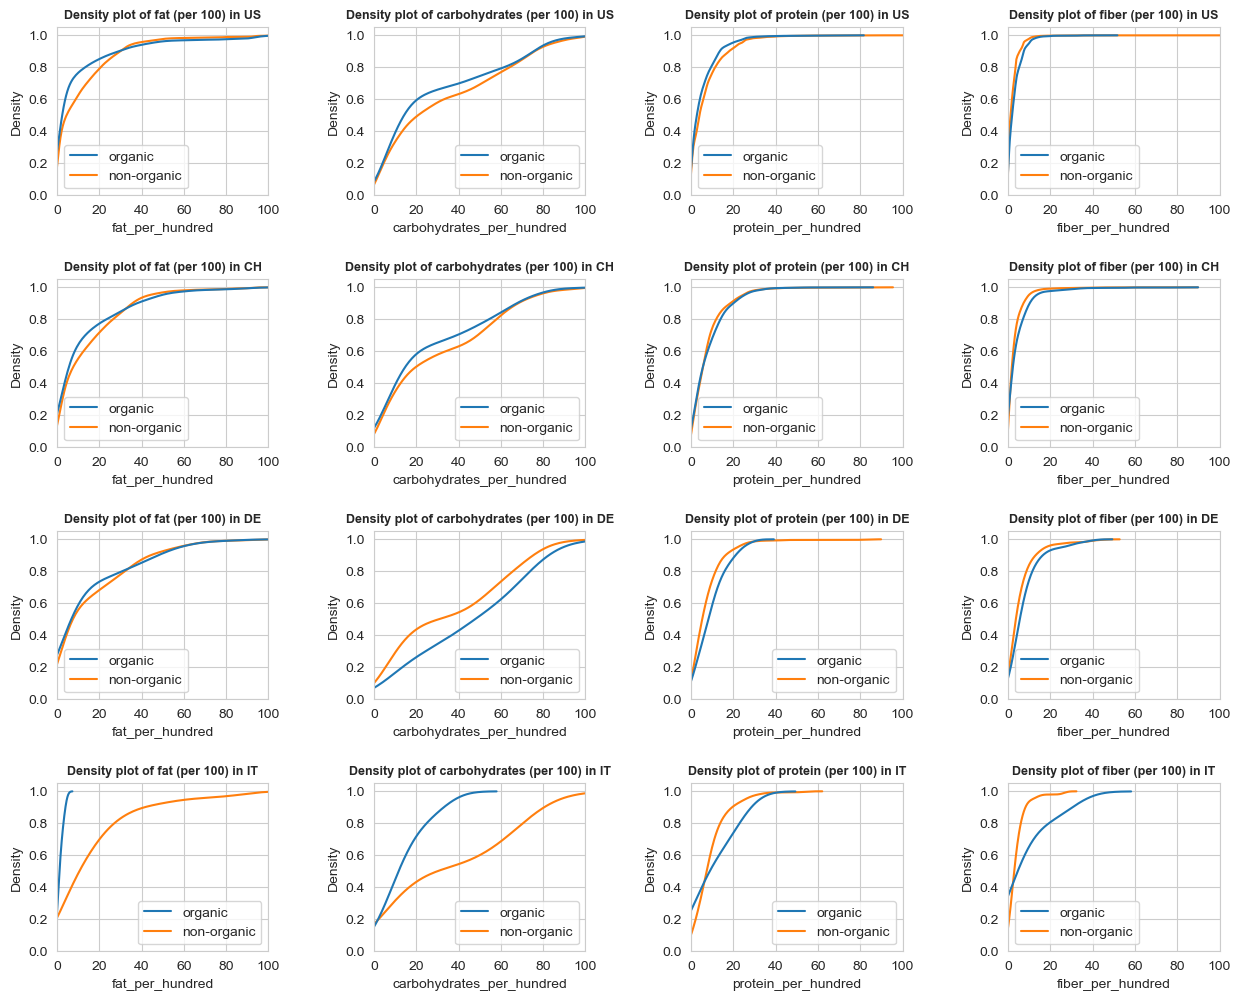

In [228]:
fig, axes = plt.subplots(
    nrows=4,
    ncols=4,
    figsize=(15, 12),
    gridspec_kw={"wspace": 0.5, "hspace": 0.5},
)

for row in range(4):
    for col in range(4):
        country = countries[row]
        macronutrient = macronutrients[col]

        sns.kdeplot(
            data=df_X[df_X["country"] == country],
            x=macronutrient,
            ax=axes[row, col],
            hue=organic_filter.map({True: "organic", False: "non-organic"}).rename(""),
            cumulative=True,
            common_norm=False,
        )
        axes[row, col].set_title(
            f"Density plot of {macronutrient.replace('_per_hundred',' (per 100)')} in {country}",
            fontdict={"fontsize": 9, "fontweight": "bold"},
        )
        axes[row, col].set_xlim(0, 100)


sns.set_style("whitegrid")
plt.show()

Cumulative density plots provide additional country-specific details, and I am looking primarily at US and CH.

First and foremost, in both countries organic products tend to have a slightly less fat and carbohydrates content in comparison with non-organic products. In fact, for those two macronutrients, there's a delta between the percentage of sample size of organic products vs non-organic products that has a nutrient content equal or below 20% that seems to average at about 10%. For instance, in CH, 60% of organic products have a carbohydrates content equal or less than 20%, while only about 50% of non-organic products correspond to such carbohydrates content.

On the other hand, fiber and protein content of organic and non-organic products, both in US and CH, follows almost an identical curve, suggesting no particular differences between the two categories.

Matter of fact, I would say that the most surprising outcome of this analysis is that there is not the huge difference I would have hoped between organic and non-organic products in terms of what is considered being healthy, at least from the nutritional perspective, apart from being slightly less caloric (due to a more modest fat and carbohydrates content).

For example, if you would have hoped to see a significantly lower fat content and higher fiber content in organic products when compared to non-organic ones, your hopes, like mine, are broken by data, and we should start wondering if we have been on the receiving end of a sound marketing strategy.

This might seem as a sour finding, but that's also the beauty of data analysis: testing our hypotheses and coming to more grounded conclusions, regardless if they are more positive or negative than our prior outlook.